In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
#sys.path.insert(0, '/Users/ammar.tareen/Desktop/Research_projects/mavenn2/')
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
#!pip3 install ipywidgets

In [3]:
data_df_full_lib_1 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib1.csv')
y_cols = list(data_df_full_lib_1.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_1 = data_df_full_lib_1[cols].copy()

data_df_full_lib_2 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib2.csv')
y_cols = list(data_df_full_lib_2.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_2 = data_df_full_lib_2[cols].copy()

In [4]:
data_df = pd.concat([data_df_lib_1,data_df_lib_2]).reset_index(drop=True).copy()
data_df.head()

,x,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NITNLCPFGEVFSATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,1,...,0,0,21,0,0,0,17,0,0,0
2,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,6,35,162,4,24,85,80,30,10,...,37,0,151,4,0,0,154,19,0,0
3,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,1,3,439,1,0,14,307,17,...,82,0,180,12,0,12,306,20,0,0
4,NITNLKPFGEVFNAWRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,3,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# y_cols_1 = list(data_df_full.columns[8:12])
# y_cols_2 = list(data_df_full.columns[68:72])

In [6]:
#y = data_df[y_cols_1+y_cols_2]

In [7]:
X = data_df['x']
y = data_df[y_cols]

In [8]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [9]:
# set positional argumnets for gpmap function
L = len(data_df['x'][0])
alphabet=['A', 'C', 'D', 'E', 'F',
          'G', 'H', 'I', 'K', 'L',
          'M', 'N', 'P', 'Q', 'R',
          'S', 'T', 'V', 'W', 'Y',]


Y = len(y_cols)
#Y = 8
print(f'L={L}, Y={Y}')

L=201, Y=64


In [10]:
# instantiate gpmap object
# gpmap = mavenn.gpmap.Multi_AdditiveGPMapLayer(L=L, 
#                                               alphabet=alphabet,
#                                               number_latent_nodes=2)

gpmap = mavenn.gpmap.AdditiveGPMapLayer(L, alphabet)



2022-09-01 10:39:07.070907: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# read in parameters

# number of reads in each bin summed
N_y = np.sum(y,axis=0)

In [12]:
print(N_y)

TiteSeq_01_bin1     5282064
TiteSeq_01_bin2     2420062
TiteSeq_01_bin3     3563327
TiteSeq_01_bin4    13256660
TiteSeq_02_bin1     5094914
                     ...   
TiteSeq_15_bin4      621457
TiteSeq_16_bin1    23064475
TiteSeq_16_bin2     1582135
TiteSeq_16_bin3     3128968
TiteSeq_16_bin4      725998
Length: 64, dtype: int64


#### I approximated these values from Fig 2B

In [13]:
bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,250000]]))
#bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,200000]]))

bounds_df = pd.DataFrame(bounds,columns=['lower_bound','upper_bound'])
f_y_lower_bounds = bounds_df['lower_bound'].values
f_y_upper_bounds = bounds_df['upper_bound'].values
bounds_df

,lower_bound,upper_bound
0,0.000000,5.192957
1,5.192957,7.244228
2,7.244228,9.259131
3,9.259131,12.429216


I don't know how to obtain these values. I based them roughly on Figure 2 from Star et al

In [14]:
# mu_neg = np.log10(50)
# mu_pos = np.log10(70000)

# sigma_neg = 2.0
# sigma_pos = 2.0

# a = np.log10(10**(mu_pos) - 10**mu_neg)

# mu_neg = np.log10(50)
# mu_pos = np.log10(70000)

# mu_pos = 15.0 kd_WT = 1.0208168951388276e-05, trains well, scale kindof off.
# mu_pos = 12.5 kd_WT = 1.2361944572128138e-08
#mu_pos = 11.5 # Kd_WT = 1.6880063531355497e-10
#mu_pos = 11.0 # Kd_WT = 2.1441348615444062e-11
# mu_pos = 10 # kd_WT = 3.6290623182157056e-14, trains well but scale of
# mu_pos = 7.5 # trains well-ish but scale is really off
#mu_pos = 5.0 # doesn't work


# mu_pos = 11.5 # kd_WT = 4.09167643846012e-11
# mu_neg = 3 # kd_WT = 4.09167643846012e-11

mu_neg = 1
mu_pos = 10

sigma_neg = 2
sigma_pos = 2

# sigma 1
# 1.5 and 6 flat to rise
# 1.5 and 8 flat to rise (flattens at 10**-3)
# 1.5 and 10 flat to rise
# 1.5 and 20 doesn't work

# sigma 1.5
# 1.5 and 8 flat high
# 2 and 7 flat high
# 3.5 and 8 flat high
# 4 and 11 flat to rise (flattens at 10**-3)

# 3.5 and 5 doesn't work
# 3.5 and 8 flat to rise 
# 3.5 and 10 flat to rise 


a = np.log10(10**(mu_pos) - 10**mu_neg)

# a = 20, inference works, but scale of kd is off.

In [15]:
a

9.999999999565706

In [16]:
mu_pos, mu_neg

(10, 1)

In [17]:
f_y_upper_bounds

array([ 5.19295685,  7.24422752,  9.25913054, 12.4292162 ])

In [18]:
#np.arange(10**(-13),10**(-6),10**(-12))
cs = [0,10**(-13),10**(-12.5),
     10**(-12),10**(-11.5),
     10**(-11),10**(-10.5),
     10**(-10),10**(-9.5),
     10**(-9),10**(-8.5),
     10**(-8),10**(-7.5),
     10**(-7),10**(-6.5),
     10**(-6)]

In [19]:
mp_list = [mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y[4*mp_idx:4*mp_idx+4],
                                                         c=cs[mp_idx],
                                                         a=a,
                                                         Y=4,
                                                         mu_pos=mu_pos,
                                                         sigma_pos=sigma_pos,
                                                         mu_neg=mu_neg,
                                                         sigma_neg=sigma_neg,
                                                         f_y_lower_bounds=f_y_lower_bounds,
                                                         f_y_upper_bounds=f_y_upper_bounds,
                                                         info_for_layers_dict={'H_y_norm':0},
                                                         eta=1e-5,)
           for mp_idx in range(len(y_cols)//4)
          ]

In [20]:
# model = mavenn.Model2(gpmap=gpmap,
#                       mp_list=mp_list)

model = mavenn.Model2(gpmap=gpmap,
                      mp_list=mp_list)

In [21]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Sequence_labels_input (InputLa  [(None, 4084)]      0           []                               
 yer)                                                                                             
                                                                                                  
 Sequence_only (Lambda)         (None, 4020)         0           ['Sequence_labels_input[0][0]']  
                                                                                                  
 additive_gp_map_layer (Additiv  (None, 1)           4021        ['Sequence_only[0][0]']          
 eGPMapLayer)                                                                                     
                                                                                              

In [22]:
#y_train[y_cols_2]

In [23]:
# Set training data
model.set_data(x=x_train,
               
               y_list=[
                       y_train[y_cols[0:4]].values,
                       y_train[y_cols[4:8]].values,
                       y_train[y_cols[8:12]].values,
                       y_train[y_cols[12:16]].values,
                       y_train[y_cols[16:20]].values,
                       y_train[y_cols[20:24]].values,
                       y_train[y_cols[24:28]].values,
                       y_train[y_cols[28:32]].values,
                       y_train[y_cols[32:36]].values,
                       y_train[y_cols[36:40]].values,
                       y_train[y_cols[40:44]].values,
                       y_train[y_cols[44:48]].values,
                       y_train[y_cols[48:52]].values,
                       y_train[y_cols[52:56]].values,                   
                       y_train[y_cols[56:60]].values,                                      
                       y_train[y_cols[60:64]].values,                                                         
                      ],

               shuffle=True)

N = 165,825 observations set as training data.
Using 20.1% for validation.
Data shuffled.
Time to set data: 33.6 sec.


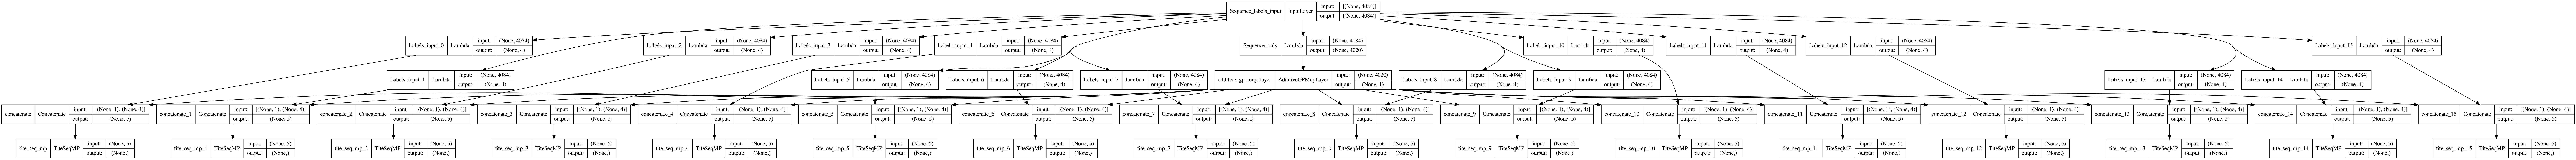

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=True,show_dtype=False,dpi=200,to_file='titeseq_mp_16_heads.png')

In [25]:

# Fit model to data
model.fit(learning_rate=.0001,
          epochs=1600,
          batch_size=300,
          try_tqdm = False,
          early_stopping=False,
          early_stopping_patience=30,
          linear_initialization=False)

Epoch 1/1600
442/442 [==============================] - 27s 29ms/step - loss: 10199268.0000 - tite_seq_mp_loss: 1420348.0000 - tite_seq_mp_1_loss: 1250709.5000 - tite_seq_mp_2_loss: 1252239.5000 - tite_seq_mp_3_loss: 1505988.5000 - tite_seq_mp_4_loss: 1046901.6875 - tite_seq_mp_5_loss: 921199.5000 - tite_seq_mp_6_loss: 905586.3125 - tite_seq_mp_7_loss: 543123.8750 - tite_seq_mp_8_loss: 355652.9375 - tite_seq_mp_9_loss: 173042.3750 - tite_seq_mp_10_loss: 115903.0312 - tite_seq_mp_11_loss: 163018.3594 - tite_seq_mp_12_loss: 113480.2891 - tite_seq_mp_13_loss: 102658.9219 - tite_seq_mp_14_loss: 136325.6250 - tite_seq_mp_15_loss: 193089.0312 - I_var: -4.9425 - val_loss: 6660917.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 1085090.1250 - val_tite_seq_mp_2_loss: 1024387.1250 - val_tite_seq_mp_3_loss: 628951.6250 - val_tite_seq_mp_4_loss: 341683.7188 - val_tite_seq_mp_5_loss: 264998.1875 - val_tite_seq_mp_6_loss: 235009.6875 - val_tite_seq_mp_7_loss: 127082.1250 - val_ti

442/442 [==============================] - 5s 11ms/step - loss: 5182487.5000 - tite_seq_mp_loss: 1420158.7500 - tite_seq_mp_1_loss: 364965.1562 - tite_seq_mp_2_loss: 275902.0938 - tite_seq_mp_3_loss: 244865.9062 - tite_seq_mp_4_loss: 170690.0469 - tite_seq_mp_5_loss: 132936.7969 - tite_seq_mp_6_loss: 114591.7266 - tite_seq_mp_7_loss: 93796.4531 - tite_seq_mp_8_loss: 109742.1250 - tite_seq_mp_9_loss: 151866.0469 - tite_seq_mp_10_loss: 201530.7969 - tite_seq_mp_11_loss: 364710.7812 - tite_seq_mp_12_loss: 377335.6875 - tite_seq_mp_13_loss: 337638.0000 - tite_seq_mp_14_loss: 387456.5312 - tite_seq_mp_15_loss: 434299.8125 - I_var: -12.4427 - val_loss: 5294473.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 528032.1875 - val_tite_seq_mp_2_loss: 326406.6875 - val_tite_seq_mp_3_loss: 294695.5312 - val_tite_seq_mp_4_loss: 204585.8594 - val_tite_seq_mp_5_loss: 154750.2344 - val_tite_seq_mp_6_loss: 131531.8438 - val_tite_seq_mp_7_loss: 90325.5547 - val_tite_seq_mp_8_loss: 9321

442/442 [==============================] - 5s 12ms/step - loss: 5118299.5000 - tite_seq_mp_loss: 1420051.8750 - tite_seq_mp_1_loss: 385352.8438 - tite_seq_mp_2_loss: 282971.0312 - tite_seq_mp_3_loss: 250797.2344 - tite_seq_mp_4_loss: 172639.9062 - tite_seq_mp_5_loss: 131879.5781 - tite_seq_mp_6_loss: 110499.5781 - tite_seq_mp_7_loss: 86313.2969 - tite_seq_mp_8_loss: 99236.6328 - tite_seq_mp_9_loss: 139091.3906 - tite_seq_mp_10_loss: 187707.6562 - tite_seq_mp_11_loss: 345333.9688 - tite_seq_mp_12_loss: 363031.3125 - tite_seq_mp_13_loss: 329887.6875 - tite_seq_mp_14_loss: 381908.3438 - tite_seq_mp_15_loss: 431594.2188 - I_var: -12.3620 - val_loss: 5100237.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 381885.5312 - val_tite_seq_mp_2_loss: 280222.0312 - val_tite_seq_mp_3_loss: 251252.3750 - val_tite_seq_mp_4_loss: 172098.5312 - val_tite_seq_mp_5_loss: 128639.3047 - val_tite_seq_mp_6_loss: 109543.2422 - val_tite_seq_mp_7_loss: 84416.2266 - val_tite_seq_mp_8_loss: 98184

442/442 [==============================] - 5s 12ms/step - loss: 5040875.0000 - tite_seq_mp_loss: 1420108.5000 - tite_seq_mp_1_loss: 375971.4375 - tite_seq_mp_2_loss: 280090.9062 - tite_seq_mp_3_loss: 247521.9375 - tite_seq_mp_4_loss: 167984.9219 - tite_seq_mp_5_loss: 126348.7344 - tite_seq_mp_6_loss: 104160.5469 - tite_seq_mp_7_loss: 80532.0469 - tite_seq_mp_8_loss: 93215.1250 - tite_seq_mp_9_loss: 133219.9688 - tite_seq_mp_10_loss: 183069.5469 - tite_seq_mp_11_loss: 338871.7812 - tite_seq_mp_12_loss: 357384.4062 - tite_seq_mp_13_loss: 325535.4688 - tite_seq_mp_14_loss: 377875.0000 - tite_seq_mp_15_loss: 428981.7500 - I_var: -12.2823 - val_loss: 5045521.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 399121.7188 - val_tite_seq_mp_2_loss: 294836.4375 - val_tite_seq_mp_3_loss: 264224.8438 - val_tite_seq_mp_4_loss: 178616.6250 - val_tite_seq_mp_5_loss: 131459.4062 - val_tite_seq_mp_6_loss: 109080.2266 - val_tite_seq_mp_7_loss: 78804.7656 - val_tite_seq_mp_8_loss: 88091

442/442 [==============================] - 5s 11ms/step - loss: 4985911.0000 - tite_seq_mp_loss: 1420276.5000 - tite_seq_mp_1_loss: 383897.5625 - tite_seq_mp_2_loss: 286939.2812 - tite_seq_mp_3_loss: 251357.0000 - tite_seq_mp_4_loss: 168643.7812 - tite_seq_mp_5_loss: 124874.2266 - tite_seq_mp_6_loss: 100918.3516 - tite_seq_mp_7_loss: 75727.0000 - tite_seq_mp_8_loss: 86373.8594 - tite_seq_mp_9_loss: 125010.4062 - tite_seq_mp_10_loss: 174848.5312 - tite_seq_mp_11_loss: 326492.1250 - tite_seq_mp_12_loss: 346870.1875 - tite_seq_mp_13_loss: 318124.3125 - tite_seq_mp_14_loss: 371088.5938 - tite_seq_mp_15_loss: 424464.7188 - I_var: -12.1366 - val_loss: 4964918.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 366783.9062 - val_tite_seq_mp_2_loss: 278651.5938 - val_tite_seq_mp_3_loss: 247837.2344 - val_tite_seq_mp_4_loss: 165466.5156 - val_tite_seq_mp_5_loss: 120248.7266 - val_tite_seq_mp_6_loss: 99085.4297 - val_tite_seq_mp_7_loss: 74607.1484 - val_tite_seq_mp_8_loss: 87458.

442/442 [==============================] - 5s 11ms/step - loss: 4933474.5000 - tite_seq_mp_loss: 1420365.0000 - tite_seq_mp_1_loss: 387059.6250 - tite_seq_mp_2_loss: 286189.5312 - tite_seq_mp_3_loss: 251516.6250 - tite_seq_mp_4_loss: 166609.3594 - tite_seq_mp_5_loss: 121646.0391 - tite_seq_mp_6_loss: 96891.0234 - tite_seq_mp_7_loss: 71843.9141 - tite_seq_mp_8_loss: 81828.5312 - tite_seq_mp_9_loss: 120268.8203 - tite_seq_mp_10_loss: 171012.8125 - tite_seq_mp_11_loss: 320280.1875 - tite_seq_mp_12_loss: 340490.6875 - tite_seq_mp_13_loss: 312418.7812 - tite_seq_mp_14_loss: 365199.5625 - tite_seq_mp_15_loss: 419853.2812 - I_var: -11.9834 - val_loss: 4907109.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 351456.7812 - val_tite_seq_mp_2_loss: 267009.5000 - val_tite_seq_mp_3_loss: 234838.7031 - val_tite_seq_mp_4_loss: 155186.4062 - val_tite_seq_mp_5_loss: 111576.8828 - val_tite_seq_mp_6_loss: 91315.8828 - val_tite_seq_mp_7_loss: 71258.7578 - val_tite_seq_mp_8_loss: 86805.2

442/442 [==============================] - 5s 11ms/step - loss: 4868114.0000 - tite_seq_mp_loss: 1420204.1250 - tite_seq_mp_1_loss: 364281.0625 - tite_seq_mp_2_loss: 273337.6562 - tite_seq_mp_3_loss: 239602.2188 - tite_seq_mp_4_loss: 156985.9688 - tite_seq_mp_5_loss: 113345.3984 - tite_seq_mp_6_loss: 89782.4141 - tite_seq_mp_7_loss: 68763.0781 - tite_seq_mp_8_loss: 81249.9219 - tite_seq_mp_9_loss: 122312.6094 - tite_seq_mp_10_loss: 175994.4062 - tite_seq_mp_11_loss: 326777.0000 - tite_seq_mp_12_loss: 343457.4688 - tite_seq_mp_13_loss: 311851.8438 - tite_seq_mp_14_loss: 362991.1875 - tite_seq_mp_15_loss: 417177.4062 - I_var: -11.9024 - val_loss: 4860954.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 350801.8438 - val_tite_seq_mp_2_loss: 264378.7188 - val_tite_seq_mp_3_loss: 233192.3281 - val_tite_seq_mp_4_loss: 152394.7188 - val_tite_seq_mp_5_loss: 108351.8203 - val_tite_seq_mp_6_loss: 87684.9141 - val_tite_seq_mp_7_loss: 68265.6250 - val_tite_seq_mp_8_loss: 83722.2

442/442 [==============================] - 5s 12ms/step - loss: 4822944.5000 - tite_seq_mp_loss: 1420298.6250 - tite_seq_mp_1_loss: 359898.0938 - tite_seq_mp_2_loss: 270714.3750 - tite_seq_mp_3_loss: 235801.1406 - tite_seq_mp_4_loss: 153529.7188 - tite_seq_mp_5_loss: 109723.9062 - tite_seq_mp_6_loss: 86302.5938 - tite_seq_mp_7_loss: 66275.0391 - tite_seq_mp_8_loss: 79035.4531 - tite_seq_mp_9_loss: 120647.5703 - tite_seq_mp_10_loss: 175582.4219 - tite_seq_mp_11_loss: 325227.5625 - tite_seq_mp_12_loss: 340455.0312 - tite_seq_mp_13_loss: 308026.7500 - tite_seq_mp_14_loss: 358447.7500 - tite_seq_mp_15_loss: 412976.9062 - I_var: -11.7878 - val_loss: 4829575.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 364588.3438 - val_tite_seq_mp_2_loss: 276629.0000 - val_tite_seq_mp_3_loss: 244304.4531 - val_tite_seq_mp_4_loss: 158679.0156 - val_tite_seq_mp_5_loss: 111667.0000 - val_tite_seq_mp_6_loss: 88815.0234 - val_tite_seq_mp_7_loss: 65689.8516 - val_tite_seq_mp_8_loss: 77757.7

442/442 [==============================] - 5s 11ms/step - loss: 4779290.5000 - tite_seq_mp_loss: 1420228.2500 - tite_seq_mp_1_loss: 354793.6250 - tite_seq_mp_2_loss: 267100.4062 - tite_seq_mp_3_loss: 234644.3281 - tite_seq_mp_4_loss: 151123.6719 - tite_seq_mp_5_loss: 107113.3594 - tite_seq_mp_6_loss: 83769.1719 - tite_seq_mp_7_loss: 64407.0234 - tite_seq_mp_8_loss: 77079.7500 - tite_seq_mp_9_loss: 118929.8516 - tite_seq_mp_10_loss: 175187.7188 - tite_seq_mp_11_loss: 322927.7812 - tite_seq_mp_12_loss: 336539.4375 - tite_seq_mp_13_loss: 303743.7812 - tite_seq_mp_14_loss: 353423.0000 - tite_seq_mp_15_loss: 408276.7188 - I_var: -11.6418 - val_loss: 4777551.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 340502.5312 - val_tite_seq_mp_2_loss: 257959.7344 - val_tite_seq_mp_3_loss: 228013.5469 - val_tite_seq_mp_4_loss: 146647.3594 - val_tite_seq_mp_5_loss: 102446.6016 - val_tite_seq_mp_6_loss: 81646.8594 - val_tite_seq_mp_7_loss: 64132.3008 - val_tite_seq_mp_8_loss: 79949.0

442/442 [==============================] - 5s 11ms/step - loss: 4741568.5000 - tite_seq_mp_loss: 1420149.3750 - tite_seq_mp_1_loss: 348592.2812 - tite_seq_mp_2_loss: 262264.2500 - tite_seq_mp_3_loss: 230845.9844 - tite_seq_mp_4_loss: 147333.1250 - tite_seq_mp_5_loss: 103831.3750 - tite_seq_mp_6_loss: 81141.7422 - tite_seq_mp_7_loss: 62917.3555 - tite_seq_mp_8_loss: 76157.5547 - tite_seq_mp_9_loss: 118761.9688 - tite_seq_mp_10_loss: 176383.2812 - tite_seq_mp_11_loss: 323271.4062 - tite_seq_mp_12_loss: 334896.4375 - tite_seq_mp_13_loss: 300856.3125 - tite_seq_mp_14_loss: 349664.9062 - tite_seq_mp_15_loss: 404499.0312 - I_var: -11.5285 - val_loss: 4753475.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 345042.7812 - val_tite_seq_mp_2_loss: 258483.7188 - val_tite_seq_mp_3_loss: 226688.0000 - val_tite_seq_mp_4_loss: 145194.9219 - val_tite_seq_mp_5_loss: 100379.7891 - val_tite_seq_mp_6_loss: 79516.9219 - val_tite_seq_mp_7_loss: 62717.2578 - val_tite_seq_mp_8_loss: 78407.1

442/442 [==============================] - 5s 11ms/step - loss: 4706336.0000 - tite_seq_mp_loss: 1420343.5000 - tite_seq_mp_1_loss: 337773.5000 - tite_seq_mp_2_loss: 254855.0781 - tite_seq_mp_3_loss: 224863.0938 - tite_seq_mp_4_loss: 143558.8438 - tite_seq_mp_5_loss: 99664.1953 - tite_seq_mp_6_loss: 77993.3828 - tite_seq_mp_7_loss: 61764.9062 - tite_seq_mp_8_loss: 76175.8984 - tite_seq_mp_9_loss: 120056.4844 - tite_seq_mp_10_loss: 179378.2344 - tite_seq_mp_11_loss: 326033.7812 - tite_seq_mp_12_loss: 335281.9688 - tite_seq_mp_13_loss: 299504.4062 - tite_seq_mp_14_loss: 347324.5000 - tite_seq_mp_15_loss: 401765.5938 - I_var: -11.4354 - val_loss: 4713938.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 334015.0625 - val_tite_seq_mp_2_loss: 252412.2969 - val_tite_seq_mp_3_loss: 224035.6406 - val_tite_seq_mp_4_loss: 142096.8281 - val_tite_seq_mp_5_loss: 98104.8594 - val_tite_seq_mp_6_loss: 77589.4375 - val_tite_seq_mp_7_loss: 61667.2695 - val_tite_seq_mp_8_loss: 77678.007

442/442 [==============================] - 5s 11ms/step - loss: 4677228.5000 - tite_seq_mp_loss: 1420350.6250 - tite_seq_mp_1_loss: 334907.9375 - tite_seq_mp_2_loss: 252002.8281 - tite_seq_mp_3_loss: 223441.7344 - tite_seq_mp_4_loss: 140667.3438 - tite_seq_mp_5_loss: 98002.4062 - tite_seq_mp_6_loss: 76645.6953 - tite_seq_mp_7_loss: 60937.9375 - tite_seq_mp_8_loss: 75432.4062 - tite_seq_mp_9_loss: 119511.5156 - tite_seq_mp_10_loss: 179369.2031 - tite_seq_mp_11_loss: 324742.7500 - tite_seq_mp_12_loss: 332980.7500 - tite_seq_mp_13_loss: 296418.0938 - tite_seq_mp_14_loss: 343687.1562 - tite_seq_mp_15_loss: 398125.7188 - I_var: -11.3266 - val_loss: 4693763.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 335903.4688 - val_tite_seq_mp_2_loss: 255075.5000 - val_tite_seq_mp_3_loss: 225168.5312 - val_tite_seq_mp_4_loss: 142889.3281 - val_tite_seq_mp_5_loss: 98228.0078 - val_tite_seq_mp_6_loss: 77083.4531 - val_tite_seq_mp_7_loss: 60760.3086 - val_tite_seq_mp_8_loss: 76095.515

Epoch 138/1600
442/442 [==============================] - 5s 11ms/step - loss: 4664542.0000 - tite_seq_mp_loss: 1420070.2500 - tite_seq_mp_1_loss: 331968.6875 - tite_seq_mp_2_loss: 250045.2031 - tite_seq_mp_3_loss: 221612.1094 - tite_seq_mp_4_loss: 140358.5156 - tite_seq_mp_5_loss: 96712.3594 - tite_seq_mp_6_loss: 75804.6328 - tite_seq_mp_7_loss: 60612.0820 - tite_seq_mp_8_loss: 75425.7344 - tite_seq_mp_9_loss: 119792.9766 - tite_seq_mp_10_loss: 180166.8594 - tite_seq_mp_11_loss: 325171.7812 - tite_seq_mp_12_loss: 332301.6250 - tite_seq_mp_13_loss: 295487.0312 - tite_seq_mp_14_loss: 342406.4375 - tite_seq_mp_15_loss: 396603.2500 - I_var: -11.2967 - val_loss: 4702887.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 352463.1250 - val_tite_seq_mp_2_loss: 261342.5000 - val_tite_seq_mp_3_loss: 229831.8125 - val_tite_seq_mp_4_loss: 144803.5000 - val_tite_seq_mp_5_loss: 99579.0469 - val_tite_seq_mp_6_loss: 78148.0859 - val_tite_seq_mp_7_loss: 60364.8125 - val_tite_seq_mp_8_

442/442 [==============================] - 5s 12ms/step - loss: 4638168.0000 - tite_seq_mp_loss: 1420174.6250 - tite_seq_mp_1_loss: 325819.5625 - tite_seq_mp_2_loss: 246787.0625 - tite_seq_mp_3_loss: 219732.0469 - tite_seq_mp_4_loss: 138528.0312 - tite_seq_mp_5_loss: 94958.9688 - tite_seq_mp_6_loss: 74471.7500 - tite_seq_mp_7_loss: 60076.0156 - tite_seq_mp_8_loss: 75067.8438 - tite_seq_mp_9_loss: 119795.8516 - tite_seq_mp_10_loss: 181105.5000 - tite_seq_mp_11_loss: 324855.1875 - tite_seq_mp_12_loss: 330806.3438 - tite_seq_mp_13_loss: 293123.9688 - tite_seq_mp_14_loss: 339426.1562 - tite_seq_mp_15_loss: 393434.6875 - I_var: -11.1894 - val_loss: 4658459.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 332020.2500 - val_tite_seq_mp_2_loss: 249072.8750 - val_tite_seq_mp_3_loss: 223066.5938 - val_tite_seq_mp_4_loss: 139653.5938 - val_tite_seq_mp_5_loss: 95973.0391 - val_tite_seq_mp_6_loss: 75124.0000 - val_tite_seq_mp_7_loss: 59943.9570 - val_tite_seq_mp_8_loss: 75524.453

442/442 [==============================] - 5s 11ms/step - loss: 4613730.5000 - tite_seq_mp_loss: 1420264.6250 - tite_seq_mp_1_loss: 319161.8125 - tite_seq_mp_2_loss: 241441.9375 - tite_seq_mp_3_loss: 216491.4062 - tite_seq_mp_4_loss: 135154.7500 - tite_seq_mp_5_loss: 93271.6875 - tite_seq_mp_6_loss: 73045.4922 - tite_seq_mp_7_loss: 59817.5156 - tite_seq_mp_8_loss: 75485.1328 - tite_seq_mp_9_loss: 120761.6016 - tite_seq_mp_10_loss: 182898.0781 - tite_seq_mp_11_loss: 326077.7188 - tite_seq_mp_12_loss: 330146.0000 - tite_seq_mp_13_loss: 291583.6875 - tite_seq_mp_14_loss: 337174.8750 - tite_seq_mp_15_loss: 390952.0625 - I_var: -11.1122 - val_loss: 4648226.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 340614.5625 - val_tite_seq_mp_2_loss: 255630.0312 - val_tite_seq_mp_3_loss: 229360.1406 - val_tite_seq_mp_4_loss: 143478.9688 - val_tite_seq_mp_5_loss: 98198.5391 - val_tite_seq_mp_6_loss: 76354.1953 - val_tite_seq_mp_7_loss: 59360.2930 - val_tite_seq_mp_8_loss: 73154.710

442/442 [==============================] - 5s 11ms/step - loss: 4593592.5000 - tite_seq_mp_loss: 1420065.0000 - tite_seq_mp_1_loss: 317585.4375 - tite_seq_mp_2_loss: 241639.0781 - tite_seq_mp_3_loss: 216335.6094 - tite_seq_mp_4_loss: 134698.3750 - tite_seq_mp_5_loss: 91915.6797 - tite_seq_mp_6_loss: 72460.9297 - tite_seq_mp_7_loss: 59276.5195 - tite_seq_mp_8_loss: 74759.5547 - tite_seq_mp_9_loss: 119845.9375 - tite_seq_mp_10_loss: 182192.8438 - tite_seq_mp_11_loss: 324174.8750 - tite_seq_mp_12_loss: 327727.1875 - tite_seq_mp_13_loss: 288953.5000 - tite_seq_mp_14_loss: 334198.3125 - tite_seq_mp_15_loss: 387761.4688 - I_var: -11.0200 - val_loss: 4616149.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 319467.2188 - val_tite_seq_mp_2_loss: 239956.8125 - val_tite_seq_mp_3_loss: 216834.7031 - val_tite_seq_mp_4_loss: 133879.0000 - val_tite_seq_mp_5_loss: 91691.8203 - val_tite_seq_mp_6_loss: 72886.3203 - val_tite_seq_mp_7_loss: 59483.9727 - val_tite_seq_mp_8_loss: 76409.968

442/442 [==============================] - 6s 13ms/step - loss: 4575349.5000 - tite_seq_mp_loss: 1420407.7500 - tite_seq_mp_1_loss: 315286.5000 - tite_seq_mp_2_loss: 239943.8438 - tite_seq_mp_3_loss: 216264.7812 - tite_seq_mp_4_loss: 133900.0781 - tite_seq_mp_5_loss: 91247.1328 - tite_seq_mp_6_loss: 72146.9688 - tite_seq_mp_7_loss: 59105.0938 - tite_seq_mp_8_loss: 74390.8047 - tite_seq_mp_9_loss: 119325.4531 - tite_seq_mp_10_loss: 181844.7969 - tite_seq_mp_11_loss: 323090.9062 - tite_seq_mp_12_loss: 325577.3125 - tite_seq_mp_13_loss: 286738.0938 - tite_seq_mp_14_loss: 331272.8125 - tite_seq_mp_15_loss: 384802.0625 - I_var: -10.9312 - val_loss: 4601389.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 320105.9062 - val_tite_seq_mp_2_loss: 241233.3750 - val_tite_seq_mp_3_loss: 217914.7656 - val_tite_seq_mp_4_loss: 134192.3594 - val_tite_seq_mp_5_loss: 91596.0469 - val_tite_seq_mp_6_loss: 73035.4141 - val_tite_seq_mp_7_loss: 59439.3984 - val_tite_seq_mp_8_loss: 75583.351

442/442 [==============================] - 5s 12ms/step - loss: 4558230.0000 - tite_seq_mp_loss: 1420254.6250 - tite_seq_mp_1_loss: 310465.8438 - tite_seq_mp_2_loss: 236841.2500 - tite_seq_mp_3_loss: 214226.6406 - tite_seq_mp_4_loss: 132078.7188 - tite_seq_mp_5_loss: 90604.5234 - tite_seq_mp_6_loss: 72089.1953 - tite_seq_mp_7_loss: 59046.0625 - tite_seq_mp_8_loss: 74604.1641 - tite_seq_mp_9_loss: 119752.4297 - tite_seq_mp_10_loss: 182698.1875 - tite_seq_mp_11_loss: 323503.0625 - tite_seq_mp_12_loss: 324653.5938 - tite_seq_mp_13_loss: 285165.6875 - tite_seq_mp_14_loss: 329526.3750 - tite_seq_mp_15_loss: 382715.7188 - I_var: -10.8570 - val_loss: 4581045.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 309347.5312 - val_tite_seq_mp_2_loss: 232604.0938 - val_tite_seq_mp_3_loss: 210920.8125 - val_tite_seq_mp_4_loss: 128928.0547 - val_tite_seq_mp_5_loss: 88149.5625 - val_tite_seq_mp_6_loss: 71079.5156 - val_tite_seq_mp_7_loss: 59389.9844 - val_tite_seq_mp_8_loss: 77416.195

442/442 [==============================] - 5s 11ms/step - loss: 4540854.5000 - tite_seq_mp_loss: 1420309.6250 - tite_seq_mp_1_loss: 306906.0625 - tite_seq_mp_2_loss: 233414.4844 - tite_seq_mp_3_loss: 212562.0469 - tite_seq_mp_4_loss: 130927.9609 - tite_seq_mp_5_loss: 89447.5469 - tite_seq_mp_6_loss: 70901.7109 - tite_seq_mp_7_loss: 58940.8555 - tite_seq_mp_8_loss: 74754.5078 - tite_seq_mp_9_loss: 119992.1172 - tite_seq_mp_10_loss: 183215.2656 - tite_seq_mp_11_loss: 323565.5000 - tite_seq_mp_12_loss: 323921.5625 - tite_seq_mp_13_loss: 283843.1875 - tite_seq_mp_14_loss: 327602.7188 - tite_seq_mp_15_loss: 380543.9688 - I_var: -10.8103 - val_loss: 4566523.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 301012.3125 - val_tite_seq_mp_2_loss: 228431.6562 - val_tite_seq_mp_3_loss: 204541.9688 - val_tite_seq_mp_4_loss: 124214.0234 - val_tite_seq_mp_5_loss: 85179.2500 - val_tite_seq_mp_6_loss: 69368.2188 - val_tite_seq_mp_7_loss: 59746.3125 - val_tite_seq_mp_8_loss: 79211.070

442/442 [==============================] - 5s 12ms/step - loss: 4530155.0000 - tite_seq_mp_loss: 1420228.7500 - tite_seq_mp_1_loss: 306828.3125 - tite_seq_mp_2_loss: 234323.8438 - tite_seq_mp_3_loss: 213822.3750 - tite_seq_mp_4_loss: 131096.8281 - tite_seq_mp_5_loss: 89561.4219 - tite_seq_mp_6_loss: 71154.3359 - tite_seq_mp_7_loss: 59051.0547 - tite_seq_mp_8_loss: 74501.7344 - tite_seq_mp_9_loss: 119328.7656 - tite_seq_mp_10_loss: 182629.9062 - tite_seq_mp_11_loss: 321613.2812 - tite_seq_mp_12_loss: 321718.6562 - tite_seq_mp_13_loss: 281555.0938 - tite_seq_mp_14_loss: 324958.5938 - tite_seq_mp_15_loss: 377776.0625 - I_var: -10.7199 - val_loss: 4563954.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 316498.6875 - val_tite_seq_mp_2_loss: 237413.1875 - val_tite_seq_mp_3_loss: 219187.4062 - val_tite_seq_mp_4_loss: 133575.6562 - val_tite_seq_mp_5_loss: 90428.7656 - val_tite_seq_mp_6_loss: 72391.4922 - val_tite_seq_mp_7_loss: 59244.8750 - val_tite_seq_mp_8_loss: 75105.156

442/442 [==============================] - 6s 12ms/step - loss: 4511670.5000 - tite_seq_mp_loss: 1420224.3750 - tite_seq_mp_1_loss: 298978.6875 - tite_seq_mp_2_loss: 227920.6406 - tite_seq_mp_3_loss: 208881.8594 - tite_seq_mp_4_loss: 127878.2734 - tite_seq_mp_5_loss: 87208.6016 - tite_seq_mp_6_loss: 70034.8203 - tite_seq_mp_7_loss: 59106.8750 - tite_seq_mp_8_loss: 75548.9609 - tite_seq_mp_9_loss: 121077.8203 - tite_seq_mp_10_loss: 184850.9375 - tite_seq_mp_11_loss: 324139.3438 - tite_seq_mp_12_loss: 322766.1562 - tite_seq_mp_13_loss: 281653.2500 - tite_seq_mp_14_loss: 324513.7188 - tite_seq_mp_15_loss: 376879.9062 - I_var: -10.6929 - val_loss: 4549022.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 307951.2500 - val_tite_seq_mp_2_loss: 232292.0000 - val_tite_seq_mp_3_loss: 213683.5625 - val_tite_seq_mp_4_loss: 129547.5781 - val_tite_seq_mp_5_loss: 88210.6875 - val_tite_seq_mp_6_loss: 71018.5938 - val_tite_seq_mp_7_loss: 59466.6055 - val_tite_seq_mp_8_loss: 76549.687

442/442 [==============================] - 7s 15ms/step - loss: 4496377.0000 - tite_seq_mp_loss: 1419976.1250 - tite_seq_mp_1_loss: 292307.8438 - tite_seq_mp_2_loss: 224101.2812 - tite_seq_mp_3_loss: 205298.2656 - tite_seq_mp_4_loss: 125273.7188 - tite_seq_mp_5_loss: 85797.8359 - tite_seq_mp_6_loss: 69254.1406 - tite_seq_mp_7_loss: 59457.2383 - tite_seq_mp_8_loss: 76514.5625 - tite_seq_mp_9_loss: 122429.3516 - tite_seq_mp_10_loss: 186776.7344 - tite_seq_mp_11_loss: 325689.8125 - tite_seq_mp_12_loss: 323002.4375 - tite_seq_mp_13_loss: 281135.2500 - tite_seq_mp_14_loss: 323638.0312 - tite_seq_mp_15_loss: 375717.0938 - I_var: -10.6603 - val_loss: 4570991.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 335044.0938 - val_tite_seq_mp_2_loss: 258287.6875 - val_tite_seq_mp_3_loss: 235553.0938 - val_tite_seq_mp_4_loss: 144006.8594 - val_tite_seq_mp_5_loss: 97027.1719 - val_tite_seq_mp_6_loss: 76208.5859 - val_tite_seq_mp_7_loss: 59083.6055 - val_tite_seq_mp_8_loss: 70816.671

442/442 [==============================] - 6s 13ms/step - loss: 4493692.5000 - tite_seq_mp_loss: 1420277.0000 - tite_seq_mp_1_loss: 298760.6562 - tite_seq_mp_2_loss: 228060.8750 - tite_seq_mp_3_loss: 210416.5469 - tite_seq_mp_4_loss: 128535.7891 - tite_seq_mp_5_loss: 87665.4219 - tite_seq_mp_6_loss: 71051.9141 - tite_seq_mp_7_loss: 59329.8789 - tite_seq_mp_8_loss: 75036.6719 - tite_seq_mp_9_loss: 119814.9766 - tite_seq_mp_10_loss: 183261.2344 - tite_seq_mp_11_loss: 321126.8750 - tite_seq_mp_12_loss: 319330.4375 - tite_seq_mp_13_loss: 278026.1875 - tite_seq_mp_14_loss: 320384.4688 - tite_seq_mp_15_loss: 372607.1875 - I_var: -10.5709 - val_loss: 4540234.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 313563.0625 - val_tite_seq_mp_2_loss: 238694.9375 - val_tite_seq_mp_3_loss: 219872.6250 - val_tite_seq_mp_4_loss: 133505.0469 - val_tite_seq_mp_5_loss: 90385.6875 - val_tite_seq_mp_6_loss: 72550.1094 - val_tite_seq_mp_7_loss: 59378.1250 - val_tite_seq_mp_8_loss: 74782.796

442/442 [==============================] - 5s 12ms/step - loss: 4478547.0000 - tite_seq_mp_loss: 1420270.0000 - tite_seq_mp_1_loss: 290973.9062 - tite_seq_mp_2_loss: 223193.2344 - tite_seq_mp_3_loss: 206441.3438 - tite_seq_mp_4_loss: 125507.7812 - tite_seq_mp_5_loss: 85789.8125 - tite_seq_mp_6_loss: 70320.2891 - tite_seq_mp_7_loss: 59547.0352 - tite_seq_mp_8_loss: 76090.5391 - tite_seq_mp_9_loss: 121445.9297 - tite_seq_mp_10_loss: 185621.3281 - tite_seq_mp_11_loss: 323385.0625 - tite_seq_mp_12_loss: 319991.9062 - tite_seq_mp_13_loss: 277918.3125 - tite_seq_mp_14_loss: 320001.5625 - tite_seq_mp_15_loss: 372041.9062 - I_var: -10.5590 - val_loss: 4521164.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 301510.8438 - val_tite_seq_mp_2_loss: 229188.4219 - val_tite_seq_mp_3_loss: 212454.3594 - val_tite_seq_mp_4_loss: 128819.1172 - val_tite_seq_mp_5_loss: 87174.4297 - val_tite_seq_mp_6_loss: 70632.4062 - val_tite_seq_mp_7_loss: 59719.3164 - val_tite_seq_mp_8_loss: 76819.437

442/442 [==============================] - 6s 13ms/step - loss: 4468418.5000 - tite_seq_mp_loss: 1420267.1250 - tite_seq_mp_1_loss: 286892.5000 - tite_seq_mp_2_loss: 220363.8281 - tite_seq_mp_3_loss: 203809.0781 - tite_seq_mp_4_loss: 123670.3047 - tite_seq_mp_5_loss: 84698.5547 - tite_seq_mp_6_loss: 69973.8359 - tite_seq_mp_7_loss: 59809.0391 - tite_seq_mp_8_loss: 76847.6562 - tite_seq_mp_9_loss: 122340.9297 - tite_seq_mp_10_loss: 186987.5625 - tite_seq_mp_11_loss: 324633.3125 - tite_seq_mp_12_loss: 320206.5938 - tite_seq_mp_13_loss: 277629.4688 - tite_seq_mp_14_loss: 319243.0000 - tite_seq_mp_15_loss: 371037.5000 - I_var: -10.5290 - val_loss: 4522747.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 305560.2500 - val_tite_seq_mp_2_loss: 237816.9062 - val_tite_seq_mp_3_loss: 216562.9844 - val_tite_seq_mp_4_loss: 130509.2109 - val_tite_seq_mp_5_loss: 88446.1562 - val_tite_seq_mp_6_loss: 71357.4609 - val_tite_seq_mp_7_loss: 59703.7461 - val_tite_seq_mp_8_loss: 75834.562

Epoch 288/1600
442/442 [==============================] - 5s 12ms/step - loss: 4466918.0000 - tite_seq_mp_loss: 1419766.7500 - tite_seq_mp_1_loss: 290099.2188 - tite_seq_mp_2_loss: 222011.0312 - tite_seq_mp_3_loss: 206686.5625 - tite_seq_mp_4_loss: 125098.3750 - tite_seq_mp_5_loss: 85387.4844 - tite_seq_mp_6_loss: 70424.4297 - tite_seq_mp_7_loss: 59898.6680 - tite_seq_mp_8_loss: 76267.9688 - tite_seq_mp_9_loss: 121267.9297 - tite_seq_mp_10_loss: 185581.3594 - tite_seq_mp_11_loss: 322770.4062 - tite_seq_mp_12_loss: 318409.8750 - tite_seq_mp_13_loss: 276159.3125 - tite_seq_mp_14_loss: 317614.4062 - tite_seq_mp_15_loss: 369466.6250 - I_var: -10.4825 - val_loss: 4511593.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 297334.7500 - val_tite_seq_mp_2_loss: 227345.8438 - val_tite_seq_mp_3_loss: 210728.8906 - val_tite_seq_mp_4_loss: 126254.5781 - val_tite_seq_mp_5_loss: 85727.1172 - val_tite_seq_mp_6_loss: 70112.0078 - val_tite_seq_mp_7_loss: 60124.5664 - val_tite_seq_mp_8_

442/442 [==============================] - 8s 18ms/step - loss: 4460167.5000 - tite_seq_mp_loss: 1420374.5000 - tite_seq_mp_1_loss: 288491.5938 - tite_seq_mp_2_loss: 222103.8750 - tite_seq_mp_3_loss: 207236.1875 - tite_seq_mp_4_loss: 125458.9766 - tite_seq_mp_5_loss: 85410.2969 - tite_seq_mp_6_loss: 70559.1797 - tite_seq_mp_7_loss: 59775.2891 - tite_seq_mp_8_loss: 76106.2656 - tite_seq_mp_9_loss: 120857.5156 - tite_seq_mp_10_loss: 185017.5000 - tite_seq_mp_11_loss: 321611.9688 - tite_seq_mp_12_loss: 317371.5000 - tite_seq_mp_13_loss: 275037.3438 - tite_seq_mp_14_loss: 316498.9062 - tite_seq_mp_15_loss: 368246.6562 - I_var: -10.4438 - val_loss: 4514962.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 305498.0938 - val_tite_seq_mp_2_loss: 230322.1875 - val_tite_seq_mp_3_loss: 212954.2031 - val_tite_seq_mp_4_loss: 127928.4141 - val_tite_seq_mp_5_loss: 86766.0703 - val_tite_seq_mp_6_loss: 70913.0234 - val_tite_seq_mp_7_loss: 60049.6719 - val_tite_seq_mp_8_loss: 77017.367

442/442 [==============================] - 6s 13ms/step - loss: 4449968.0000 - tite_seq_mp_loss: 1420358.7500 - tite_seq_mp_1_loss: 284725.2500 - tite_seq_mp_2_loss: 219638.7656 - tite_seq_mp_3_loss: 205082.9844 - tite_seq_mp_4_loss: 124462.5469 - tite_seq_mp_5_loss: 84748.6719 - tite_seq_mp_6_loss: 70436.4375 - tite_seq_mp_7_loss: 60168.2930 - tite_seq_mp_8_loss: 76604.1797 - tite_seq_mp_9_loss: 121437.9844 - tite_seq_mp_10_loss: 185722.9844 - tite_seq_mp_11_loss: 322030.8125 - tite_seq_mp_12_loss: 317266.5312 - tite_seq_mp_13_loss: 274615.3438 - tite_seq_mp_14_loss: 315552.0625 - tite_seq_mp_15_loss: 367106.1250 - I_var: -10.4016 - val_loss: 4502425.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 296308.8750 - val_tite_seq_mp_2_loss: 230414.5312 - val_tite_seq_mp_3_loss: 211079.3750 - val_tite_seq_mp_4_loss: 127066.1953 - val_tite_seq_mp_5_loss: 86092.3281 - val_tite_seq_mp_6_loss: 70606.1797 - val_tite_seq_mp_7_loss: 60206.5977 - val_tite_seq_mp_8_loss: 77423.117

442/442 [==============================] - 5s 11ms/step - loss: 4439300.0000 - tite_seq_mp_loss: 1420094.2500 - tite_seq_mp_1_loss: 281992.6875 - tite_seq_mp_2_loss: 217430.5469 - tite_seq_mp_3_loss: 203333.2344 - tite_seq_mp_4_loss: 123132.8203 - tite_seq_mp_5_loss: 84029.6484 - tite_seq_mp_6_loss: 70204.7422 - tite_seq_mp_7_loss: 60129.6758 - tite_seq_mp_8_loss: 76892.1016 - tite_seq_mp_9_loss: 121786.6797 - tite_seq_mp_10_loss: 186100.4219 - tite_seq_mp_11_loss: 322566.9062 - tite_seq_mp_12_loss: 316914.1250 - tite_seq_mp_13_loss: 273933.4688 - tite_seq_mp_14_loss: 314676.8750 - tite_seq_mp_15_loss: 366072.1875 - I_var: -10.3874 - val_loss: 4490777.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 290870.3750 - val_tite_seq_mp_2_loss: 224514.1094 - val_tite_seq_mp_3_loss: 207861.9844 - val_tite_seq_mp_4_loss: 124972.1094 - val_tite_seq_mp_5_loss: 84771.8984 - val_tite_seq_mp_6_loss: 70152.6719 - val_tite_seq_mp_7_loss: 60605.9492 - val_tite_seq_mp_8_loss: 78464.812

442/442 [==============================] - 5s 12ms/step - loss: 4432215.0000 - tite_seq_mp_loss: 1420268.6250 - tite_seq_mp_1_loss: 277502.6875 - tite_seq_mp_2_loss: 214713.6250 - tite_seq_mp_3_loss: 201038.9531 - tite_seq_mp_4_loss: 121843.5547 - tite_seq_mp_5_loss: 83149.1250 - tite_seq_mp_6_loss: 69814.6016 - tite_seq_mp_7_loss: 60980.5195 - tite_seq_mp_8_loss: 77716.4922 - tite_seq_mp_9_loss: 122807.8125 - tite_seq_mp_10_loss: 187535.7344 - tite_seq_mp_11_loss: 323561.0938 - tite_seq_mp_12_loss: 317603.9688 - tite_seq_mp_13_loss: 273711.7500 - tite_seq_mp_14_loss: 314426.5625 - tite_seq_mp_15_loss: 365528.0938 - I_var: -10.3661 - val_loss: 4503436.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 306018.1875 - val_tite_seq_mp_2_loss: 239091.8438 - val_tite_seq_mp_3_loss: 221374.8281 - val_tite_seq_mp_4_loss: 132207.2812 - val_tite_seq_mp_5_loss: 89483.2891 - val_tite_seq_mp_6_loss: 72833.1016 - val_tite_seq_mp_7_loss: 60163.1289 - val_tite_seq_mp_8_loss: 75109.398

442/442 [==============================] - 5s 11ms/step - loss: 4427363.5000 - tite_seq_mp_loss: 1420454.3750 - tite_seq_mp_1_loss: 278928.7500 - tite_seq_mp_2_loss: 216024.5000 - tite_seq_mp_3_loss: 202961.5781 - tite_seq_mp_4_loss: 122658.1953 - tite_seq_mp_5_loss: 83548.3047 - tite_seq_mp_6_loss: 70182.2734 - tite_seq_mp_7_loss: 60946.6328 - tite_seq_mp_8_loss: 77140.1875 - tite_seq_mp_9_loss: 121766.0469 - tite_seq_mp_10_loss: 186017.1562 - tite_seq_mp_11_loss: 321807.9375 - tite_seq_mp_12_loss: 315704.3125 - tite_seq_mp_13_loss: 272343.7500 - tite_seq_mp_14_loss: 312831.8125 - tite_seq_mp_15_loss: 364035.9375 - I_var: -10.3258 - val_loss: 4492632.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 300806.9688 - val_tite_seq_mp_2_loss: 229132.8906 - val_tite_seq_mp_3_loss: 212898.9531 - val_tite_seq_mp_4_loss: 127708.6016 - val_tite_seq_mp_5_loss: 86366.6406 - val_tite_seq_mp_6_loss: 71311.8750 - val_tite_seq_mp_7_loss: 60582.8906 - val_tite_seq_mp_8_loss: 77218.687

442/442 [==============================] - 5s 11ms/step - loss: 4417509.5000 - tite_seq_mp_loss: 1418963.7500 - tite_seq_mp_1_loss: 276012.6250 - tite_seq_mp_2_loss: 213878.1719 - tite_seq_mp_3_loss: 201233.0781 - tite_seq_mp_4_loss: 121499.0938 - tite_seq_mp_5_loss: 82988.0391 - tite_seq_mp_6_loss: 69978.5469 - tite_seq_mp_7_loss: 61155.5430 - tite_seq_mp_8_loss: 77686.8828 - tite_seq_mp_9_loss: 122208.4219 - tite_seq_mp_10_loss: 186916.2031 - tite_seq_mp_11_loss: 322107.5312 - tite_seq_mp_12_loss: 315676.7500 - tite_seq_mp_13_loss: 271892.8125 - tite_seq_mp_14_loss: 312053.4688 - tite_seq_mp_15_loss: 363248.4375 - I_var: -10.3108 - val_loss: 4466930.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 276449.3750 - val_tite_seq_mp_2_loss: 214663.8281 - val_tite_seq_mp_3_loss: 200032.0312 - val_tite_seq_mp_4_loss: 119148.8438 - val_tite_seq_mp_5_loss: 81343.4766 - val_tite_seq_mp_6_loss: 69026.1328 - val_tite_seq_mp_7_loss: 61734.1758 - val_tite_seq_mp_8_loss: 81265.820

442/442 [==============================] - 6s 12ms/step - loss: 4414682.0000 - tite_seq_mp_loss: 1420215.0000 - tite_seq_mp_1_loss: 273213.1562 - tite_seq_mp_2_loss: 211911.9844 - tite_seq_mp_3_loss: 199909.0000 - tite_seq_mp_4_loss: 121025.5000 - tite_seq_mp_5_loss: 82437.1328 - tite_seq_mp_6_loss: 69950.9219 - tite_seq_mp_7_loss: 61479.6758 - tite_seq_mp_8_loss: 78215.0703 - tite_seq_mp_9_loss: 122971.9219 - tite_seq_mp_10_loss: 187723.3438 - tite_seq_mp_11_loss: 323056.0000 - tite_seq_mp_12_loss: 316004.5625 - tite_seq_mp_13_loss: 271943.1250 - tite_seq_mp_14_loss: 311837.0938 - tite_seq_mp_15_loss: 362778.2812 - I_var: -10.2845 - val_loss: 4470483.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 280307.0000 - val_tite_seq_mp_2_loss: 217492.7344 - val_tite_seq_mp_3_loss: 204776.0156 - val_tite_seq_mp_4_loss: 120117.5312 - val_tite_seq_mp_5_loss: 82136.0625 - val_tite_seq_mp_6_loss: 69432.0859 - val_tite_seq_mp_7_loss: 61663.6523 - val_tite_seq_mp_8_loss: 80703.664

442/442 [==============================] - 5s 11ms/step - loss: 4411046.0000 - tite_seq_mp_loss: 1420400.7500 - tite_seq_mp_1_loss: 273792.3438 - tite_seq_mp_2_loss: 211289.4688 - tite_seq_mp_3_loss: 200548.7656 - tite_seq_mp_4_loss: 120734.9688 - tite_seq_mp_5_loss: 82450.1172 - tite_seq_mp_6_loss: 70109.9141 - tite_seq_mp_7_loss: 61678.0117 - tite_seq_mp_8_loss: 78174.9062 - tite_seq_mp_9_loss: 122757.6172 - tite_seq_mp_10_loss: 187425.5312 - tite_seq_mp_11_loss: 322618.8438 - tite_seq_mp_12_loss: 315164.6562 - tite_seq_mp_13_loss: 271082.2500 - tite_seq_mp_14_loss: 310930.0938 - tite_seq_mp_15_loss: 361878.0000 - I_var: -10.2557 - val_loss: 4467877.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 285920.5938 - val_tite_seq_mp_2_loss: 220949.0625 - val_tite_seq_mp_3_loss: 206390.0312 - val_tite_seq_mp_4_loss: 123072.5859 - val_tite_seq_mp_5_loss: 83706.3516 - val_tite_seq_mp_6_loss: 70380.3516 - val_tite_seq_mp_7_loss: 61572.5430 - val_tite_seq_mp_8_loss: 79521.210

442/442 [==============================] - 5s 12ms/step - loss: 4405037.0000 - tite_seq_mp_loss: 1420156.6250 - tite_seq_mp_1_loss: 271832.2812 - tite_seq_mp_2_loss: 210787.3438 - tite_seq_mp_3_loss: 199619.1562 - tite_seq_mp_4_loss: 120611.0234 - tite_seq_mp_5_loss: 82233.5859 - tite_seq_mp_6_loss: 70020.6719 - tite_seq_mp_7_loss: 61731.5781 - tite_seq_mp_8_loss: 78261.3672 - tite_seq_mp_9_loss: 122783.5469 - tite_seq_mp_10_loss: 187335.4219 - tite_seq_mp_11_loss: 322755.7188 - tite_seq_mp_12_loss: 314743.9688 - tite_seq_mp_13_loss: 270596.4688 - tite_seq_mp_14_loss: 310248.5000 - tite_seq_mp_15_loss: 361309.7500 - I_var: -10.2350 - val_loss: 4461867.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 282765.0625 - val_tite_seq_mp_2_loss: 220144.8750 - val_tite_seq_mp_3_loss: 206348.0938 - val_tite_seq_mp_4_loss: 123188.1094 - val_tite_seq_mp_5_loss: 84218.3750 - val_tite_seq_mp_6_loss: 70855.9609 - val_tite_seq_mp_7_loss: 61768.0547 - val_tite_seq_mp_8_loss: 79515.968

442/442 [==============================] - 5s 11ms/step - loss: 4400618.5000 - tite_seq_mp_loss: 1420304.0000 - tite_seq_mp_1_loss: 271270.5625 - tite_seq_mp_2_loss: 209994.0469 - tite_seq_mp_3_loss: 199428.1875 - tite_seq_mp_4_loss: 120237.9141 - tite_seq_mp_5_loss: 82030.5781 - tite_seq_mp_6_loss: 70085.2578 - tite_seq_mp_7_loss: 61906.9805 - tite_seq_mp_8_loss: 78436.1328 - tite_seq_mp_9_loss: 122833.9297 - tite_seq_mp_10_loss: 187394.8906 - tite_seq_mp_11_loss: 322468.4688 - tite_seq_mp_12_loss: 314193.4062 - tite_seq_mp_13_loss: 269944.8438 - tite_seq_mp_14_loss: 309496.5938 - tite_seq_mp_15_loss: 360580.8750 - I_var: -10.2173 - val_loss: 4456528.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 277878.7812 - val_tite_seq_mp_2_loss: 219193.7812 - val_tite_seq_mp_3_loss: 205243.5625 - val_tite_seq_mp_4_loss: 122090.7344 - val_tite_seq_mp_5_loss: 83117.2812 - val_tite_seq_mp_6_loss: 70166.3828 - val_tite_seq_mp_7_loss: 62069.6914 - val_tite_seq_mp_8_loss: 80402.515

442/442 [==============================] - 6s 12ms/step - loss: 4397274.0000 - tite_seq_mp_loss: 1420246.8750 - tite_seq_mp_1_loss: 271480.0000 - tite_seq_mp_2_loss: 209873.5000 - tite_seq_mp_3_loss: 199593.9375 - tite_seq_mp_4_loss: 120511.3906 - tite_seq_mp_5_loss: 82179.6641 - tite_seq_mp_6_loss: 70360.3359 - tite_seq_mp_7_loss: 62100.0195 - tite_seq_mp_8_loss: 78402.4609 - tite_seq_mp_9_loss: 122641.3359 - tite_seq_mp_10_loss: 187271.0781 - tite_seq_mp_11_loss: 321736.1250 - tite_seq_mp_12_loss: 313479.0312 - tite_seq_mp_13_loss: 269358.0625 - tite_seq_mp_14_loss: 308562.5938 - tite_seq_mp_15_loss: 359467.6250 - I_var: -10.1882 - val_loss: 4450728.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 269964.5625 - val_tite_seq_mp_2_loss: 212776.1094 - val_tite_seq_mp_3_loss: 203082.2500 - val_tite_seq_mp_4_loss: 118381.0078 - val_tite_seq_mp_5_loss: 81055.3594 - val_tite_seq_mp_6_loss: 69586.1328 - val_tite_seq_mp_7_loss: 62612.0469 - val_tite_seq_mp_8_loss: 82054.773

442/442 [==============================] - 5s 12ms/step - loss: 4393810.0000 - tite_seq_mp_loss: 1420169.2500 - tite_seq_mp_1_loss: 271477.2500 - tite_seq_mp_2_loss: 209997.0156 - tite_seq_mp_3_loss: 199722.0781 - tite_seq_mp_4_loss: 120972.7734 - tite_seq_mp_5_loss: 82277.3516 - tite_seq_mp_6_loss: 70589.6484 - tite_seq_mp_7_loss: 62241.3047 - tite_seq_mp_8_loss: 78554.1250 - tite_seq_mp_9_loss: 122442.7031 - tite_seq_mp_10_loss: 186743.0469 - tite_seq_mp_11_loss: 321342.3438 - tite_seq_mp_12_loss: 312792.9375 - tite_seq_mp_13_loss: 268565.3750 - tite_seq_mp_14_loss: 307602.4688 - tite_seq_mp_15_loss: 358306.7812 - I_var: -10.1683 - val_loss: 4456251.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 282862.8125 - val_tite_seq_mp_2_loss: 222419.1094 - val_tite_seq_mp_3_loss: 209165.2812 - val_tite_seq_mp_4_loss: 123679.8984 - val_tite_seq_mp_5_loss: 83975.6406 - val_tite_seq_mp_6_loss: 71092.8438 - val_tite_seq_mp_7_loss: 62295.2227 - val_tite_seq_mp_8_loss: 79632.890

442/442 [==============================] - 5s 12ms/step - loss: 4386812.0000 - tite_seq_mp_loss: 1420325.6250 - tite_seq_mp_1_loss: 266098.9688 - tite_seq_mp_2_loss: 206669.6562 - tite_seq_mp_3_loss: 197125.9062 - tite_seq_mp_4_loss: 118958.5625 - tite_seq_mp_5_loss: 81365.4844 - tite_seq_mp_6_loss: 70294.6406 - tite_seq_mp_7_loss: 62507.1680 - tite_seq_mp_8_loss: 79338.1328 - tite_seq_mp_9_loss: 123554.0938 - tite_seq_mp_10_loss: 188391.6562 - tite_seq_mp_11_loss: 323129.7188 - tite_seq_mp_12_loss: 313461.9688 - tite_seq_mp_13_loss: 268851.6562 - tite_seq_mp_14_loss: 307910.3750 - tite_seq_mp_15_loss: 358814.9375 - I_var: -10.1707 - val_loss: 4466530.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 291795.6875 - val_tite_seq_mp_2_loss: 228125.8125 - val_tite_seq_mp_3_loss: 218811.2812 - val_tite_seq_mp_4_loss: 127602.0469 - val_tite_seq_mp_5_loss: 86521.4453 - val_tite_seq_mp_6_loss: 72586.0625 - val_tite_seq_mp_7_loss: 62266.9531 - val_tite_seq_mp_8_loss: 78084.906

Epoch 448/1600
442/442 [==============================] - 5s 12ms/step - loss: 4386162.5000 - tite_seq_mp_loss: 1420264.3750 - tite_seq_mp_1_loss: 266543.0312 - tite_seq_mp_2_loss: 207162.6875 - tite_seq_mp_3_loss: 197788.1719 - tite_seq_mp_4_loss: 119908.8203 - tite_seq_mp_5_loss: 81492.0391 - tite_seq_mp_6_loss: 70294.8906 - tite_seq_mp_7_loss: 62548.1289 - tite_seq_mp_8_loss: 79121.4219 - tite_seq_mp_9_loss: 123270.7969 - tite_seq_mp_10_loss: 187865.8594 - tite_seq_mp_11_loss: 322583.5938 - tite_seq_mp_12_loss: 312955.0625 - tite_seq_mp_13_loss: 268721.0312 - tite_seq_mp_14_loss: 307345.5312 - tite_seq_mp_15_loss: 358283.5000 - I_var: -10.1485 - val_loss: 4445362.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 273923.0625 - val_tite_seq_mp_2_loss: 215700.4531 - val_tite_seq_mp_3_loss: 202396.3750 - val_tite_seq_mp_4_loss: 119911.8906 - val_tite_seq_mp_5_loss: 81936.1875 - val_tite_seq_mp_6_loss: 70360.5625 - val_tite_seq_mp_7_loss: 63054.6953 - val_tite_seq_mp_8_

442/442 [==============================] - 6s 14ms/step - loss: 4382041.0000 - tite_seq_mp_loss: 1420422.8750 - tite_seq_mp_1_loss: 265557.5000 - tite_seq_mp_2_loss: 206449.3906 - tite_seq_mp_3_loss: 197359.5469 - tite_seq_mp_4_loss: 118786.0156 - tite_seq_mp_5_loss: 81412.9922 - tite_seq_mp_6_loss: 70366.9766 - tite_seq_mp_7_loss: 62749.9805 - tite_seq_mp_8_loss: 79426.5156 - tite_seq_mp_9_loss: 123389.6641 - tite_seq_mp_10_loss: 188161.2188 - tite_seq_mp_11_loss: 322547.7188 - tite_seq_mp_12_loss: 312823.6562 - tite_seq_mp_13_loss: 268084.6562 - tite_seq_mp_14_loss: 306880.1875 - tite_seq_mp_15_loss: 357610.4375 - I_var: -10.1311 - val_loss: 4446776.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 276491.7812 - val_tite_seq_mp_2_loss: 218336.3750 - val_tite_seq_mp_3_loss: 205558.6875 - val_tite_seq_mp_4_loss: 121726.1797 - val_tite_seq_mp_5_loss: 83179.2422 - val_tite_seq_mp_6_loss: 71080.9531 - val_tite_seq_mp_7_loss: 62986.3711 - val_tite_seq_mp_8_loss: 80893.812

442/442 [==============================] - 5s 12ms/step - loss: 4378330.0000 - tite_seq_mp_loss: 1419600.6250 - tite_seq_mp_1_loss: 265557.7188 - tite_seq_mp_2_loss: 207172.7031 - tite_seq_mp_3_loss: 197514.4531 - tite_seq_mp_4_loss: 119257.3203 - tite_seq_mp_5_loss: 81465.5156 - tite_seq_mp_6_loss: 70517.4453 - tite_seq_mp_7_loss: 62832.6797 - tite_seq_mp_8_loss: 79501.4766 - tite_seq_mp_9_loss: 123224.6641 - tite_seq_mp_10_loss: 187721.8750 - tite_seq_mp_11_loss: 321869.2500 - tite_seq_mp_12_loss: 312079.6875 - tite_seq_mp_13_loss: 267278.9375 - tite_seq_mp_14_loss: 305959.4062 - tite_seq_mp_15_loss: 356762.4062 - I_var: -10.1049 - val_loss: 4443610.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 276441.3750 - val_tite_seq_mp_2_loss: 216865.0156 - val_tite_seq_mp_3_loss: 204682.1250 - val_tite_seq_mp_4_loss: 121737.9297 - val_tite_seq_mp_5_loss: 83127.6016 - val_tite_seq_mp_6_loss: 71005.2812 - val_tite_seq_mp_7_loss: 63164.4570 - val_tite_seq_mp_8_loss: 81153.929

Epoch 478/1600
442/442 [==============================] - 6s 13ms/step - loss: 4375926.5000 - tite_seq_mp_loss: 1420335.0000 - tite_seq_mp_1_loss: 263685.1250 - tite_seq_mp_2_loss: 205501.0938 - tite_seq_mp_3_loss: 197262.7031 - tite_seq_mp_4_loss: 119613.3984 - tite_seq_mp_5_loss: 81910.7656 - tite_seq_mp_6_loss: 70564.2812 - tite_seq_mp_7_loss: 62865.9023 - tite_seq_mp_8_loss: 79489.0859 - tite_seq_mp_9_loss: 123215.9297 - tite_seq_mp_10_loss: 187842.0625 - tite_seq_mp_11_loss: 322234.3750 - tite_seq_mp_12_loss: 311853.7500 - tite_seq_mp_13_loss: 267224.2188 - tite_seq_mp_14_loss: 305775.6875 - tite_seq_mp_15_loss: 356538.8125 - I_var: -10.1123 - val_loss: 4428107.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 261288.7656 - val_tite_seq_mp_2_loss: 204507.6094 - val_tite_seq_mp_3_loss: 193809.0781 - val_tite_seq_mp_4_loss: 114800.4141 - val_tite_seq_mp_5_loss: 79057.6172 - val_tite_seq_mp_6_loss: 69615.1484 - val_tite_seq_mp_7_loss: 64241.2344 - val_tite_seq_mp_8_

442/442 [==============================] - 5s 11ms/step - loss: 4371080.5000 - tite_seq_mp_loss: 1420006.6250 - tite_seq_mp_1_loss: 262389.9375 - tite_seq_mp_2_loss: 204480.9531 - tite_seq_mp_3_loss: 196553.9688 - tite_seq_mp_4_loss: 118562.2734 - tite_seq_mp_5_loss: 81247.8047 - tite_seq_mp_6_loss: 70519.6641 - tite_seq_mp_7_loss: 63113.8516 - tite_seq_mp_8_loss: 79891.8984 - tite_seq_mp_9_loss: 123496.7344 - tite_seq_mp_10_loss: 188208.3125 - tite_seq_mp_11_loss: 322280.3750 - tite_seq_mp_12_loss: 311860.2812 - tite_seq_mp_13_loss: 267062.4688 - tite_seq_mp_14_loss: 305365.9375 - tite_seq_mp_15_loss: 356025.0625 - I_var: -10.0894 - val_loss: 4441058.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 271917.8438 - val_tite_seq_mp_2_loss: 214202.8594 - val_tite_seq_mp_3_loss: 206814.3125 - val_tite_seq_mp_4_loss: 120379.6016 - val_tite_seq_mp_5_loss: 82215.5000 - val_tite_seq_mp_6_loss: 71123.2734 - val_tite_seq_mp_7_loss: 63601.1016 - val_tite_seq_mp_8_loss: 82006.546

442/442 [==============================] - 5s 12ms/step - loss: 4369427.0000 - tite_seq_mp_loss: 1420260.5000 - tite_seq_mp_1_loss: 262435.2812 - tite_seq_mp_2_loss: 204405.9219 - tite_seq_mp_3_loss: 196659.8125 - tite_seq_mp_4_loss: 118894.7812 - tite_seq_mp_5_loss: 81186.6719 - tite_seq_mp_6_loss: 70701.2969 - tite_seq_mp_7_loss: 63164.6602 - tite_seq_mp_8_loss: 79918.8516 - tite_seq_mp_9_loss: 123392.2812 - tite_seq_mp_10_loss: 188057.8438 - tite_seq_mp_11_loss: 322011.2812 - tite_seq_mp_12_loss: 311380.7812 - tite_seq_mp_13_loss: 266614.5000 - tite_seq_mp_14_loss: 304804.8438 - tite_seq_mp_15_loss: 355520.8125 - I_var: -10.0735 - val_loss: 4431191.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 267463.9688 - val_tite_seq_mp_2_loss: 210250.7344 - val_tite_seq_mp_3_loss: 199148.4844 - val_tite_seq_mp_4_loss: 118099.7734 - val_tite_seq_mp_5_loss: 81070.5000 - val_tite_seq_mp_6_loss: 70465.2969 - val_tite_seq_mp_7_loss: 64157.8359 - val_tite_seq_mp_8_loss: 83312.453

442/442 [==============================] - 5s 11ms/step - loss: 4368937.5000 - tite_seq_mp_loss: 1420268.2500 - tite_seq_mp_1_loss: 263112.0938 - tite_seq_mp_2_loss: 204277.4062 - tite_seq_mp_3_loss: 196443.5000 - tite_seq_mp_4_loss: 119398.2188 - tite_seq_mp_5_loss: 81336.5078 - tite_seq_mp_6_loss: 70776.9609 - tite_seq_mp_7_loss: 63359.9570 - tite_seq_mp_8_loss: 80013.9297 - tite_seq_mp_9_loss: 123407.9531 - tite_seq_mp_10_loss: 188173.3906 - tite_seq_mp_11_loss: 321741.4688 - tite_seq_mp_12_loss: 311005.7812 - tite_seq_mp_13_loss: 266170.3438 - tite_seq_mp_14_loss: 304412.6562 - tite_seq_mp_15_loss: 355025.9688 - I_var: -10.0519 - val_loss: 4435214.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 272300.7500 - val_tite_seq_mp_2_loss: 215437.2188 - val_tite_seq_mp_3_loss: 203414.7969 - val_tite_seq_mp_4_loss: 121318.6797 - val_tite_seq_mp_5_loss: 82552.6641 - val_tite_seq_mp_6_loss: 71383.2109 - val_tite_seq_mp_7_loss: 63830.1875 - val_tite_seq_mp_8_loss: 82191.328

442/442 [==============================] - 6s 13ms/step - loss: 4366354.0000 - tite_seq_mp_loss: 1420499.8750 - tite_seq_mp_1_loss: 261277.3281 - tite_seq_mp_2_loss: 204616.6406 - tite_seq_mp_3_loss: 196195.9531 - tite_seq_mp_4_loss: 119161.2656 - tite_seq_mp_5_loss: 81850.8047 - tite_seq_mp_6_loss: 70907.3047 - tite_seq_mp_7_loss: 63542.3242 - tite_seq_mp_8_loss: 80211.9297 - tite_seq_mp_9_loss: 123522.5156 - tite_seq_mp_10_loss: 188060.2344 - tite_seq_mp_11_loss: 321753.1875 - tite_seq_mp_12_loss: 310615.7500 - tite_seq_mp_13_loss: 265752.4688 - tite_seq_mp_14_loss: 303941.5000 - tite_seq_mp_15_loss: 354430.0312 - I_var: -10.0370 - val_loss: 4445194.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 277554.1250 - val_tite_seq_mp_2_loss: 219127.0781 - val_tite_seq_mp_3_loss: 212867.9688 - val_tite_seq_mp_4_loss: 124345.4375 - val_tite_seq_mp_5_loss: 84279.0078 - val_tite_seq_mp_6_loss: 72339.5156 - val_tite_seq_mp_7_loss: 63900.1875 - val_tite_seq_mp_8_loss: 80958.640

442/442 [==============================] - 6s 13ms/step - loss: 4364057.5000 - tite_seq_mp_loss: 1420409.1250 - tite_seq_mp_1_loss: 260879.3750 - tite_seq_mp_2_loss: 204421.4531 - tite_seq_mp_3_loss: 196212.8906 - tite_seq_mp_4_loss: 119425.8438 - tite_seq_mp_5_loss: 81257.7422 - tite_seq_mp_6_loss: 71018.9219 - tite_seq_mp_7_loss: 63618.7227 - tite_seq_mp_8_loss: 80304.8359 - tite_seq_mp_9_loss: 123437.0156 - tite_seq_mp_10_loss: 188109.0938 - tite_seq_mp_11_loss: 321506.9062 - tite_seq_mp_12_loss: 310432.8125 - tite_seq_mp_13_loss: 265311.6875 - tite_seq_mp_14_loss: 303356.9688 - tite_seq_mp_15_loss: 354337.5938 - I_var: -10.0222 - val_loss: 4417057.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 257084.0312 - val_tite_seq_mp_2_loss: 201962.3594 - val_tite_seq_mp_3_loss: 192145.7500 - val_tite_seq_mp_4_loss: 114604.3125 - val_tite_seq_mp_5_loss: 78836.0312 - val_tite_seq_mp_6_loss: 70176.8359 - val_tite_seq_mp_7_loss: 65177.7188 - val_tite_seq_mp_8_loss: 85761.421

442/442 [==============================] - 5s 12ms/step - loss: 4359168.5000 - tite_seq_mp_loss: 1420090.8750 - tite_seq_mp_1_loss: 260049.0781 - tite_seq_mp_2_loss: 202063.4688 - tite_seq_mp_3_loss: 195563.0938 - tite_seq_mp_4_loss: 118738.7734 - tite_seq_mp_5_loss: 80942.1562 - tite_seq_mp_6_loss: 71100.5859 - tite_seq_mp_7_loss: 63902.5547 - tite_seq_mp_8_loss: 80675.9922 - tite_seq_mp_9_loss: 123843.7656 - tite_seq_mp_10_loss: 188579.3438 - tite_seq_mp_11_loss: 321639.4375 - tite_seq_mp_12_loss: 310163.6875 - tite_seq_mp_13_loss: 265125.2500 - tite_seq_mp_14_loss: 303169.8438 - tite_seq_mp_15_loss: 353504.1250 - I_var: -10.0178 - val_loss: 4416484.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 257120.5625 - val_tite_seq_mp_2_loss: 201597.2031 - val_tite_seq_mp_3_loss: 192118.4375 - val_tite_seq_mp_4_loss: 114338.1172 - val_tite_seq_mp_5_loss: 78897.5938 - val_tite_seq_mp_6_loss: 70427.3438 - val_tite_seq_mp_7_loss: 65486.3633 - val_tite_seq_mp_8_loss: 85869.078

442/442 [==============================] - 5s 12ms/step - loss: 4354750.5000 - tite_seq_mp_loss: 1420245.8750 - tite_seq_mp_1_loss: 257330.9219 - tite_seq_mp_2_loss: 200941.7656 - tite_seq_mp_3_loss: 194092.9219 - tite_seq_mp_4_loss: 118142.5078 - tite_seq_mp_5_loss: 80582.0312 - tite_seq_mp_6_loss: 71005.6406 - tite_seq_mp_7_loss: 63988.4531 - tite_seq_mp_8_loss: 80944.1562 - tite_seq_mp_9_loss: 124133.5938 - tite_seq_mp_10_loss: 188902.6562 - tite_seq_mp_11_loss: 322306.1250 - tite_seq_mp_12_loss: 310376.9062 - tite_seq_mp_13_loss: 265062.6875 - tite_seq_mp_14_loss: 302993.5625 - tite_seq_mp_15_loss: 353685.5625 - I_var: -10.0056 - val_loss: 4421547.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 263609.0000 - val_tite_seq_mp_2_loss: 206120.1406 - val_tite_seq_mp_3_loss: 197057.2969 - val_tite_seq_mp_4_loss: 117082.5938 - val_tite_seq_mp_5_loss: 80500.2891 - val_tite_seq_mp_6_loss: 71187.8359 - val_tite_seq_mp_7_loss: 65202.7383 - val_tite_seq_mp_8_loss: 84555.757

442/442 [==============================] - 5s 12ms/step - loss: 4352626.0000 - tite_seq_mp_loss: 1420231.5000 - tite_seq_mp_1_loss: 255761.5781 - tite_seq_mp_2_loss: 201259.0469 - tite_seq_mp_3_loss: 193748.9219 - tite_seq_mp_4_loss: 118131.7500 - tite_seq_mp_5_loss: 80607.2031 - tite_seq_mp_6_loss: 71144.7734 - tite_seq_mp_7_loss: 64230.7031 - tite_seq_mp_8_loss: 81192.0391 - tite_seq_mp_9_loss: 124357.6641 - tite_seq_mp_10_loss: 189071.3438 - tite_seq_mp_11_loss: 322243.2812 - tite_seq_mp_12_loss: 309941.8750 - tite_seq_mp_13_loss: 264718.7188 - tite_seq_mp_14_loss: 302562.2188 - tite_seq_mp_15_loss: 353407.7812 - I_var: -10.0155 - val_loss: 4415241.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 257963.2656 - val_tite_seq_mp_2_loss: 201973.8906 - val_tite_seq_mp_3_loss: 193322.7344 - val_tite_seq_mp_4_loss: 115440.9531 - val_tite_seq_mp_5_loss: 79465.4844 - val_tite_seq_mp_6_loss: 70773.4609 - val_tite_seq_mp_7_loss: 65631.0000 - val_tite_seq_mp_8_loss: 85885.289

442/442 [==============================] - 5s 12ms/step - loss: 4349711.0000 - tite_seq_mp_loss: 1420273.0000 - tite_seq_mp_1_loss: 254842.6094 - tite_seq_mp_2_loss: 199530.4219 - tite_seq_mp_3_loss: 193235.6094 - tite_seq_mp_4_loss: 117643.3359 - tite_seq_mp_5_loss: 80454.9453 - tite_seq_mp_6_loss: 71360.0703 - tite_seq_mp_7_loss: 64342.0977 - tite_seq_mp_8_loss: 81428.5938 - tite_seq_mp_9_loss: 124518.1641 - tite_seq_mp_10_loss: 189183.0312 - tite_seq_mp_11_loss: 322646.0000 - tite_seq_mp_12_loss: 309863.0938 - tite_seq_mp_13_loss: 264655.4688 - tite_seq_mp_14_loss: 302437.2812 - tite_seq_mp_15_loss: 353280.2500 - I_var: -10.0049 - val_loss: 4430487.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 271078.8750 - val_tite_seq_mp_2_loss: 214375.1719 - val_tite_seq_mp_3_loss: 209215.1094 - val_tite_seq_mp_4_loss: 121671.3594 - val_tite_seq_mp_5_loss: 82928.4531 - val_tite_seq_mp_6_loss: 72512.4141 - val_tite_seq_mp_7_loss: 64911.1445 - val_tite_seq_mp_8_loss: 82687.445

442/442 [==============================] - 5s 12ms/step - loss: 4348815.0000 - tite_seq_mp_loss: 1420389.8750 - tite_seq_mp_1_loss: 255225.5000 - tite_seq_mp_2_loss: 199408.2812 - tite_seq_mp_3_loss: 193365.4688 - tite_seq_mp_4_loss: 117914.9531 - tite_seq_mp_5_loss: 81114.2891 - tite_seq_mp_6_loss: 71435.4922 - tite_seq_mp_7_loss: 64579.3789 - tite_seq_mp_8_loss: 81482.5625 - tite_seq_mp_9_loss: 124436.9453 - tite_seq_mp_10_loss: 189143.9844 - tite_seq_mp_11_loss: 322103.0000 - tite_seq_mp_12_loss: 309494.0625 - tite_seq_mp_13_loss: 264114.4375 - tite_seq_mp_14_loss: 301954.1875 - tite_seq_mp_15_loss: 352633.8438 - I_var: -9.9830 - val_loss: 4418118.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 262481.6562 - val_tite_seq_mp_2_loss: 207789.4531 - val_tite_seq_mp_3_loss: 199342.2500 - val_tite_seq_mp_4_loss: 117839.9531 - val_tite_seq_mp_5_loss: 81300.8672 - val_tite_seq_mp_6_loss: 71784.6719 - val_tite_seq_mp_7_loss: 65433.3672 - val_tite_seq_mp_8_loss: 84574.7266

Epoch 604/1600
442/442 [==============================] - 5s 12ms/step - loss: 4347004.0000 - tite_seq_mp_loss: 1420340.8750 - tite_seq_mp_1_loss: 254198.3438 - tite_seq_mp_2_loss: 198861.1562 - tite_seq_mp_3_loss: 192625.3125 - tite_seq_mp_4_loss: 117615.7266 - tite_seq_mp_5_loss: 80539.2344 - tite_seq_mp_6_loss: 71361.4141 - tite_seq_mp_7_loss: 64682.7969 - tite_seq_mp_8_loss: 81722.0312 - tite_seq_mp_9_loss: 124713.3438 - tite_seq_mp_10_loss: 189431.9844 - tite_seq_mp_11_loss: 322425.1562 - tite_seq_mp_12_loss: 309615.4375 - tite_seq_mp_13_loss: 264121.3125 - tite_seq_mp_14_loss: 302025.0000 - tite_seq_mp_15_loss: 352706.3438 - I_var: -9.9918 - val_loss: 4418599.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 264526.4062 - val_tite_seq_mp_2_loss: 206717.0156 - val_tite_seq_mp_3_loss: 198879.8125 - val_tite_seq_mp_4_loss: 117637.9531 - val_tite_seq_mp_5_loss: 80984.9688 - val_tite_seq_mp_6_loss: 71802.5078 - val_tite_seq_mp_7_loss: 65635.0469 - val_tite_seq_mp_8_l

442/442 [==============================] - 6s 13ms/step - loss: 4347523.5000 - tite_seq_mp_loss: 1420383.1250 - tite_seq_mp_1_loss: 254606.7344 - tite_seq_mp_2_loss: 200130.1406 - tite_seq_mp_3_loss: 193391.5781 - tite_seq_mp_4_loss: 117902.0078 - tite_seq_mp_5_loss: 80727.7812 - tite_seq_mp_6_loss: 71685.2812 - tite_seq_mp_7_loss: 64729.6641 - tite_seq_mp_8_loss: 81678.5000 - tite_seq_mp_9_loss: 124449.3125 - tite_seq_mp_10_loss: 188986.0156 - tite_seq_mp_11_loss: 321965.2812 - tite_seq_mp_12_loss: 308993.8750 - tite_seq_mp_13_loss: 263782.1250 - tite_seq_mp_14_loss: 301512.1250 - tite_seq_mp_15_loss: 352579.5625 - I_var: -9.9756 - val_loss: 4418541.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 260782.7188 - val_tite_seq_mp_2_loss: 204479.1094 - val_tite_seq_mp_3_loss: 196685.6406 - val_tite_seq_mp_4_loss: 116756.7969 - val_tite_seq_mp_5_loss: 80392.9531 - val_tite_seq_mp_6_loss: 71717.1797 - val_tite_seq_mp_7_loss: 65970.9062 - val_tite_seq_mp_8_loss: 85493.1875

442/442 [==============================] - 5s 11ms/step - loss: 4343510.0000 - tite_seq_mp_loss: 1420259.1250 - tite_seq_mp_1_loss: 252908.1562 - tite_seq_mp_2_loss: 199053.2656 - tite_seq_mp_3_loss: 192883.4531 - tite_seq_mp_4_loss: 117580.2266 - tite_seq_mp_5_loss: 80503.7891 - tite_seq_mp_6_loss: 71552.5000 - tite_seq_mp_7_loss: 64963.5859 - tite_seq_mp_8_loss: 81919.7656 - tite_seq_mp_9_loss: 124711.4844 - tite_seq_mp_10_loss: 189367.8906 - tite_seq_mp_11_loss: 322220.4688 - tite_seq_mp_12_loss: 309009.8750 - tite_seq_mp_13_loss: 263554.3125 - tite_seq_mp_14_loss: 301077.2500 - tite_seq_mp_15_loss: 351926.6875 - I_var: -9.9585 - val_loss: 4439453.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 276226.9375 - val_tite_seq_mp_2_loss: 217856.2344 - val_tite_seq_mp_3_loss: 214083.0625 - val_tite_seq_mp_4_loss: 124988.0547 - val_tite_seq_mp_5_loss: 84949.7031 - val_tite_seq_mp_6_loss: 73719.2578 - val_tite_seq_mp_7_loss: 65075.6680 - val_tite_seq_mp_8_loss: 82101.2812

442/442 [==============================] - 5s 11ms/step - loss: 4345726.0000 - tite_seq_mp_loss: 1420416.3750 - tite_seq_mp_1_loss: 254365.4844 - tite_seq_mp_2_loss: 200914.6406 - tite_seq_mp_3_loss: 193641.5781 - tite_seq_mp_4_loss: 118359.1484 - tite_seq_mp_5_loss: 80922.3750 - tite_seq_mp_6_loss: 72008.6953 - tite_seq_mp_7_loss: 65014.6992 - tite_seq_mp_8_loss: 81768.1406 - tite_seq_mp_9_loss: 124345.0391 - tite_seq_mp_10_loss: 188822.1094 - tite_seq_mp_11_loss: 321723.9375 - tite_seq_mp_12_loss: 308444.7812 - tite_seq_mp_13_loss: 262780.7500 - tite_seq_mp_14_loss: 300623.9375 - tite_seq_mp_15_loss: 351555.2500 - I_var: -9.9565 - val_loss: 4410315.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 256296.0625 - val_tite_seq_mp_2_loss: 201643.6250 - val_tite_seq_mp_3_loss: 193941.7344 - val_tite_seq_mp_4_loss: 115152.0703 - val_tite_seq_mp_5_loss: 79531.3516 - val_tite_seq_mp_6_loss: 71603.0312 - val_tite_seq_mp_7_loss: 66496.5703 - val_tite_seq_mp_8_loss: 86742.7266

442/442 [==============================] - 5s 11ms/step - loss: 4341339.0000 - tite_seq_mp_loss: 1420309.3750 - tite_seq_mp_1_loss: 252560.4375 - tite_seq_mp_2_loss: 199357.2500 - tite_seq_mp_3_loss: 192494.9531 - tite_seq_mp_4_loss: 118011.5703 - tite_seq_mp_5_loss: 80686.4062 - tite_seq_mp_6_loss: 71904.8594 - tite_seq_mp_7_loss: 65298.1875 - tite_seq_mp_8_loss: 82076.5859 - tite_seq_mp_9_loss: 124608.0391 - tite_seq_mp_10_loss: 189196.2188 - tite_seq_mp_11_loss: 322228.9688 - tite_seq_mp_12_loss: 308401.0938 - tite_seq_mp_13_loss: 262565.1250 - tite_seq_mp_14_loss: 300280.2812 - tite_seq_mp_15_loss: 351341.4375 - I_var: -9.9539 - val_loss: 4407129.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 253664.4531 - val_tite_seq_mp_2_loss: 200094.4062 - val_tite_seq_mp_3_loss: 193139.7500 - val_tite_seq_mp_4_loss: 114357.6719 - val_tite_seq_mp_5_loss: 79518.0625 - val_tite_seq_mp_6_loss: 71653.2500 - val_tite_seq_mp_7_loss: 66665.3750 - val_tite_seq_mp_8_loss: 87127.9141

442/442 [==============================] - 5s 10ms/step - loss: 4340416.0000 - tite_seq_mp_loss: 1420317.5000 - tite_seq_mp_1_loss: 252247.1875 - tite_seq_mp_2_loss: 199419.1094 - tite_seq_mp_3_loss: 192684.5781 - tite_seq_mp_4_loss: 118021.7734 - tite_seq_mp_5_loss: 80939.8516 - tite_seq_mp_6_loss: 72202.4844 - tite_seq_mp_7_loss: 65357.1094 - tite_seq_mp_8_loss: 82160.4688 - tite_seq_mp_9_loss: 124569.1094 - tite_seq_mp_10_loss: 189024.5312 - tite_seq_mp_11_loss: 322199.0312 - tite_seq_mp_12_loss: 307994.0000 - tite_seq_mp_13_loss: 262290.6250 - tite_seq_mp_14_loss: 300043.4062 - tite_seq_mp_15_loss: 350926.9688 - I_var: -9.9398 - val_loss: 4407568.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 252427.5625 - val_tite_seq_mp_2_loss: 199977.9062 - val_tite_seq_mp_3_loss: 193097.0000 - val_tite_seq_mp_4_loss: 115161.7031 - val_tite_seq_mp_5_loss: 79496.5781 - val_tite_seq_mp_6_loss: 71735.9766 - val_tite_seq_mp_7_loss: 66884.0234 - val_tite_seq_mp_8_loss: 87157.4141

442/442 [==============================] - 5s 11ms/step - loss: 4338696.0000 - tite_seq_mp_loss: 1420272.7500 - tite_seq_mp_1_loss: 251154.3750 - tite_seq_mp_2_loss: 198810.6719 - tite_seq_mp_3_loss: 192584.2031 - tite_seq_mp_4_loss: 117662.0547 - tite_seq_mp_5_loss: 80721.3906 - tite_seq_mp_6_loss: 72222.1484 - tite_seq_mp_7_loss: 65539.6016 - tite_seq_mp_8_loss: 82435.5938 - tite_seq_mp_9_loss: 124809.0000 - tite_seq_mp_10_loss: 189290.2344 - tite_seq_mp_11_loss: 322221.0000 - tite_seq_mp_12_loss: 308370.6250 - tite_seq_mp_13_loss: 262162.1562 - tite_seq_mp_14_loss: 299738.1250 - tite_seq_mp_15_loss: 350684.4688 - I_var: -9.9251 - val_loss: 4412847.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 252870.7188 - val_tite_seq_mp_2_loss: 200554.0938 - val_tite_seq_mp_3_loss: 197487.4531 - val_tite_seq_mp_4_loss: 114806.5234 - val_tite_seq_mp_5_loss: 80083.0625 - val_tite_seq_mp_6_loss: 72139.6484 - val_tite_seq_mp_7_loss: 66907.9375 - val_tite_seq_mp_8_loss: 87190.7422

442/442 [==============================] - 5s 10ms/step - loss: 4336994.0000 - tite_seq_mp_loss: 1420421.6250 - tite_seq_mp_1_loss: 251060.7344 - tite_seq_mp_2_loss: 198337.1719 - tite_seq_mp_3_loss: 192502.4219 - tite_seq_mp_4_loss: 118001.8594 - tite_seq_mp_5_loss: 81022.6250 - tite_seq_mp_6_loss: 72252.5312 - tite_seq_mp_7_loss: 65705.8359 - tite_seq_mp_8_loss: 82382.3359 - tite_seq_mp_9_loss: 124742.4688 - tite_seq_mp_10_loss: 189142.2031 - tite_seq_mp_11_loss: 322219.4375 - tite_seq_mp_12_loss: 307629.9688 - tite_seq_mp_13_loss: 261775.7344 - tite_seq_mp_14_loss: 299640.7500 - tite_seq_mp_15_loss: 350138.9062 - I_var: -9.9123 - val_loss: 4412446.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 254626.1094 - val_tite_seq_mp_2_loss: 201177.0156 - val_tite_seq_mp_3_loss: 193708.7656 - val_tite_seq_mp_4_loss: 115710.3672 - val_tite_seq_mp_5_loss: 80015.5469 - val_tite_seq_mp_6_loss: 72273.7812 - val_tite_seq_mp_7_loss: 67027.5859 - val_tite_seq_mp_8_loss: 87331.3750

442/442 [==============================] - 5s 11ms/step - loss: 4335157.0000 - tite_seq_mp_loss: 1420350.0000 - tite_seq_mp_1_loss: 249647.9219 - tite_seq_mp_2_loss: 197421.8906 - tite_seq_mp_3_loss: 191799.1094 - tite_seq_mp_4_loss: 117297.6562 - tite_seq_mp_5_loss: 80661.8672 - tite_seq_mp_6_loss: 72341.0078 - tite_seq_mp_7_loss: 65983.7812 - tite_seq_mp_8_loss: 82773.3281 - tite_seq_mp_9_loss: 125152.1953 - tite_seq_mp_10_loss: 189515.2344 - tite_seq_mp_11_loss: 322688.4062 - tite_seq_mp_12_loss: 308101.5625 - tite_seq_mp_13_loss: 261815.5312 - tite_seq_mp_14_loss: 299391.3125 - tite_seq_mp_15_loss: 350195.8438 - I_var: -9.9100 - val_loss: 4408651.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 248509.7500 - val_tite_seq_mp_2_loss: 196108.2500 - val_tite_seq_mp_3_loss: 194100.3750 - val_tite_seq_mp_4_loss: 113420.2031 - val_tite_seq_mp_5_loss: 79195.5234 - val_tite_seq_mp_6_loss: 72045.8281 - val_tite_seq_mp_7_loss: 67592.9297 - val_tite_seq_mp_8_loss: 88432.5234

442/442 [==============================] - 5s 11ms/step - loss: 4333713.0000 - tite_seq_mp_loss: 1420289.1250 - tite_seq_mp_1_loss: 249502.5156 - tite_seq_mp_2_loss: 196823.3906 - tite_seq_mp_3_loss: 191593.2500 - tite_seq_mp_4_loss: 117204.2656 - tite_seq_mp_5_loss: 80479.1875 - tite_seq_mp_6_loss: 72456.1328 - tite_seq_mp_7_loss: 65990.5703 - tite_seq_mp_8_loss: 82991.5469 - tite_seq_mp_9_loss: 125275.0859 - tite_seq_mp_10_loss: 189634.2031 - tite_seq_mp_11_loss: 322633.8750 - tite_seq_mp_12_loss: 308074.6250 - tite_seq_mp_13_loss: 261518.3125 - tite_seq_mp_14_loss: 299189.1875 - tite_seq_mp_15_loss: 350037.7500 - I_var: -9.9151 - val_loss: 4416969.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 260241.5625 - val_tite_seq_mp_2_loss: 206607.5625 - val_tite_seq_mp_3_loss: 200295.0156 - val_tite_seq_mp_4_loss: 119142.7109 - val_tite_seq_mp_5_loss: 82158.3203 - val_tite_seq_mp_6_loss: 73270.7266 - val_tite_seq_mp_7_loss: 66729.3828 - val_tite_seq_mp_8_loss: 85959.5859

442/442 [==============================] - 5s 11ms/step - loss: 4332678.5000 - tite_seq_mp_loss: 1420394.8750 - tite_seq_mp_1_loss: 249184.3281 - tite_seq_mp_2_loss: 196680.5312 - tite_seq_mp_3_loss: 191159.2031 - tite_seq_mp_4_loss: 117272.3828 - tite_seq_mp_5_loss: 80505.4453 - tite_seq_mp_6_loss: 72597.9453 - tite_seq_mp_7_loss: 66223.8906 - tite_seq_mp_8_loss: 83160.8125 - tite_seq_mp_9_loss: 125365.8750 - tite_seq_mp_10_loss: 189804.1094 - tite_seq_mp_11_loss: 322664.7500 - tite_seq_mp_12_loss: 307527.7188 - tite_seq_mp_13_loss: 261404.8750 - tite_seq_mp_14_loss: 298971.6562 - tite_seq_mp_15_loss: 349736.8438 - I_var: -9.9005 - val_loss: 4404038.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 247997.2812 - val_tite_seq_mp_2_loss: 196899.3281 - val_tite_seq_mp_3_loss: 189571.1719 - val_tite_seq_mp_4_loss: 113489.9141 - val_tite_seq_mp_5_loss: 78959.8984 - val_tite_seq_mp_6_loss: 72086.6641 - val_tite_seq_mp_7_loss: 67869.4766 - val_tite_seq_mp_8_loss: 88679.2031

442/442 [==============================] - 5s 11ms/step - loss: 4329559.5000 - tite_seq_mp_loss: 1420264.7500 - tite_seq_mp_1_loss: 248216.4531 - tite_seq_mp_2_loss: 196005.0781 - tite_seq_mp_3_loss: 190779.1719 - tite_seq_mp_4_loss: 117262.7891 - tite_seq_mp_5_loss: 80631.7266 - tite_seq_mp_6_loss: 72706.0078 - tite_seq_mp_7_loss: 66376.0625 - tite_seq_mp_8_loss: 83183.6016 - tite_seq_mp_9_loss: 125307.5625 - tite_seq_mp_10_loss: 189529.3438 - tite_seq_mp_11_loss: 322510.2188 - tite_seq_mp_12_loss: 307421.7500 - tite_seq_mp_13_loss: 261110.8281 - tite_seq_mp_14_loss: 298721.7812 - tite_seq_mp_15_loss: 349508.6875 - I_var: -9.8951 - val_loss: 4398712.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 243300.1875 - val_tite_seq_mp_2_loss: 192947.6875 - val_tite_seq_mp_3_loss: 186408.3750 - val_tite_seq_mp_4_loss: 111524.7578 - val_tite_seq_mp_5_loss: 78137.0156 - val_tite_seq_mp_6_loss: 71961.6953 - val_tite_seq_mp_7_loss: 68427.5312 - val_tite_seq_mp_8_loss: 89945.2969

442/442 [==============================] - 5s 11ms/step - loss: 4330831.0000 - tite_seq_mp_loss: 1420273.7500 - tite_seq_mp_1_loss: 247812.5156 - tite_seq_mp_2_loss: 196244.8438 - tite_seq_mp_3_loss: 190879.5938 - tite_seq_mp_4_loss: 117128.2266 - tite_seq_mp_5_loss: 81021.5703 - tite_seq_mp_6_loss: 72767.6406 - tite_seq_mp_7_loss: 66419.8906 - tite_seq_mp_8_loss: 83416.2656 - tite_seq_mp_9_loss: 125472.3516 - tite_seq_mp_10_loss: 189738.2344 - tite_seq_mp_11_loss: 322722.5000 - tite_seq_mp_12_loss: 307877.1875 - tite_seq_mp_13_loss: 260860.4219 - tite_seq_mp_14_loss: 298555.0938 - tite_seq_mp_15_loss: 349617.3125 - I_var: -9.8946 - val_loss: 4411465.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 256874.8125 - val_tite_seq_mp_2_loss: 203228.8438 - val_tite_seq_mp_3_loss: 197135.5156 - val_tite_seq_mp_4_loss: 117445.8906 - val_tite_seq_mp_5_loss: 81240.0312 - val_tite_seq_mp_6_loss: 73486.3359 - val_tite_seq_mp_7_loss: 67547.2031 - val_tite_seq_mp_8_loss: 86871.6094

442/442 [==============================] - 5s 11ms/step - loss: 4330989.0000 - tite_seq_mp_loss: 1420389.0000 - tite_seq_mp_1_loss: 248378.4844 - tite_seq_mp_2_loss: 196462.0156 - tite_seq_mp_3_loss: 190731.1719 - tite_seq_mp_4_loss: 117555.7188 - tite_seq_mp_5_loss: 81271.8125 - tite_seq_mp_6_loss: 73267.9375 - tite_seq_mp_7_loss: 66595.0391 - tite_seq_mp_8_loss: 83296.3750 - tite_seq_mp_9_loss: 125257.0781 - tite_seq_mp_10_loss: 190116.6094 - tite_seq_mp_11_loss: 322307.2500 - tite_seq_mp_12_loss: 307444.8125 - tite_seq_mp_13_loss: 260505.8906 - tite_seq_mp_14_loss: 298215.0625 - tite_seq_mp_15_loss: 349171.4375 - I_var: -9.8842 - val_loss: 4400116.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 244693.9219 - val_tite_seq_mp_2_loss: 193743.7812 - val_tite_seq_mp_3_loss: 187654.8906 - val_tite_seq_mp_4_loss: 111958.0703 - val_tite_seq_mp_5_loss: 78265.7891 - val_tite_seq_mp_6_loss: 72529.4922 - val_tite_seq_mp_7_loss: 68557.4297 - val_tite_seq_mp_8_loss: 89855.1953

442/442 [==============================] - 5s 12ms/step - loss: 4328454.0000 - tite_seq_mp_loss: 1420229.6250 - tite_seq_mp_1_loss: 247024.2812 - tite_seq_mp_2_loss: 195921.9062 - tite_seq_mp_3_loss: 190554.2500 - tite_seq_mp_4_loss: 117979.5156 - tite_seq_mp_5_loss: 81204.0469 - tite_seq_mp_6_loss: 73082.7188 - tite_seq_mp_7_loss: 66758.4219 - tite_seq_mp_8_loss: 83570.7266 - tite_seq_mp_9_loss: 125595.5938 - tite_seq_mp_10_loss: 189701.3438 - tite_seq_mp_11_loss: 322362.4375 - tite_seq_mp_12_loss: 307302.7812 - tite_seq_mp_13_loss: 260536.5938 - tite_seq_mp_14_loss: 297824.3438 - tite_seq_mp_15_loss: 348782.1875 - I_var: -9.8646 - val_loss: 4399403.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 242082.1562 - val_tite_seq_mp_2_loss: 191029.6875 - val_tite_seq_mp_3_loss: 189334.4375 - val_tite_seq_mp_4_loss: 111244.9688 - val_tite_seq_mp_5_loss: 77879.9141 - val_tite_seq_mp_6_loss: 72513.4297 - val_tite_seq_mp_7_loss: 68900.0391 - val_tite_seq_mp_8_loss: 90599.9297

442/442 [==============================] - 4s 10ms/step - loss: 4327832.5000 - tite_seq_mp_loss: 1420343.5000 - tite_seq_mp_1_loss: 246909.0469 - tite_seq_mp_2_loss: 196524.3750 - tite_seq_mp_3_loss: 190725.6406 - tite_seq_mp_4_loss: 117399.7969 - tite_seq_mp_5_loss: 80950.3359 - tite_seq_mp_6_loss: 73129.2656 - tite_seq_mp_7_loss: 66930.8984 - tite_seq_mp_8_loss: 83553.3906 - tite_seq_mp_9_loss: 125412.7266 - tite_seq_mp_10_loss: 190151.9219 - tite_seq_mp_11_loss: 322216.5000 - tite_seq_mp_12_loss: 307150.1250 - tite_seq_mp_13_loss: 260171.0938 - tite_seq_mp_14_loss: 297697.5938 - tite_seq_mp_15_loss: 348541.2812 - I_var: -9.8674 - val_loss: 4398016.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 240371.7031 - val_tite_seq_mp_2_loss: 190637.9688 - val_tite_seq_mp_3_loss: 184947.5781 - val_tite_seq_mp_4_loss: 110907.5547 - val_tite_seq_mp_5_loss: 78048.3281 - val_tite_seq_mp_6_loss: 72574.4609 - val_tite_seq_mp_7_loss: 69180.8281 - val_tite_seq_mp_8_loss: 90834.1641

442/442 [==============================] - 5s 10ms/step - loss: 4326688.5000 - tite_seq_mp_loss: 1420448.6250 - tite_seq_mp_1_loss: 246272.2812 - tite_seq_mp_2_loss: 195781.2344 - tite_seq_mp_3_loss: 190414.3125 - tite_seq_mp_4_loss: 117417.7266 - tite_seq_mp_5_loss: 80835.2344 - tite_seq_mp_6_loss: 73339.3281 - tite_seq_mp_7_loss: 67024.6953 - tite_seq_mp_8_loss: 83766.4531 - tite_seq_mp_9_loss: 125552.0000 - tite_seq_mp_10_loss: 189813.1250 - tite_seq_mp_11_loss: 322584.8750 - tite_seq_mp_12_loss: 307327.1250 - tite_seq_mp_13_loss: 260144.4844 - tite_seq_mp_14_loss: 297579.8125 - tite_seq_mp_15_loss: 348365.7188 - I_var: -9.8522 - val_loss: 4401895.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 246031.6875 - val_tite_seq_mp_2_loss: 194170.8906 - val_tite_seq_mp_3_loss: 188816.5938 - val_tite_seq_mp_4_loss: 112638.9219 - val_tite_seq_mp_5_loss: 79152.3047 - val_tite_seq_mp_6_loss: 73184.8984 - val_tite_seq_mp_7_loss: 69001.3750 - val_tite_seq_mp_8_loss: 89893.6406

442/442 [==============================] - 5s 10ms/step - loss: 4325182.5000 - tite_seq_mp_loss: 1420216.1250 - tite_seq_mp_1_loss: 246363.5938 - tite_seq_mp_2_loss: 195381.3750 - tite_seq_mp_3_loss: 190196.1719 - tite_seq_mp_4_loss: 117050.9766 - tite_seq_mp_5_loss: 81177.2578 - tite_seq_mp_6_loss: 73326.6094 - tite_seq_mp_7_loss: 67285.1250 - tite_seq_mp_8_loss: 83909.3203 - tite_seq_mp_9_loss: 125709.9297 - tite_seq_mp_10_loss: 190071.1562 - tite_seq_mp_11_loss: 322547.0000 - tite_seq_mp_12_loss: 307144.4062 - tite_seq_mp_13_loss: 259727.4531 - tite_seq_mp_14_loss: 297264.5000 - tite_seq_mp_15_loss: 347788.6562 - I_var: -9.8431 - val_loss: 4405097.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 250108.9062 - val_tite_seq_mp_2_loss: 198578.5156 - val_tite_seq_mp_3_loss: 192828.8750 - val_tite_seq_mp_4_loss: 115191.0781 - val_tite_seq_mp_5_loss: 80215.2109 - val_tite_seq_mp_6_loss: 73716.7578 - val_tite_seq_mp_7_loss: 68604.8203 - val_tite_seq_mp_8_loss: 88749.7734

442/442 [==============================] - 5s 10ms/step - loss: 4324237.5000 - tite_seq_mp_loss: 1420168.8750 - tite_seq_mp_1_loss: 245437.9688 - tite_seq_mp_2_loss: 194803.3750 - tite_seq_mp_3_loss: 189682.2812 - tite_seq_mp_4_loss: 117131.2266 - tite_seq_mp_5_loss: 80621.8125 - tite_seq_mp_6_loss: 73328.7812 - tite_seq_mp_7_loss: 67366.7188 - tite_seq_mp_8_loss: 84177.7734 - tite_seq_mp_9_loss: 126015.8359 - tite_seq_mp_10_loss: 190640.4844 - tite_seq_mp_11_loss: 322574.3750 - tite_seq_mp_12_loss: 307270.7812 - tite_seq_mp_13_loss: 259773.4375 - tite_seq_mp_14_loss: 297199.8438 - tite_seq_mp_15_loss: 348021.3125 - I_var: -9.8475 - val_loss: 4410944.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 250076.5469 - val_tite_seq_mp_2_loss: 198483.3125 - val_tite_seq_mp_3_loss: 197254.0156 - val_tite_seq_mp_4_loss: 115721.0938 - val_tite_seq_mp_5_loss: 80244.0625 - val_tite_seq_mp_6_loss: 73780.3125 - val_tite_seq_mp_7_loss: 68766.8516 - val_tite_seq_mp_8_loss: 88926.7031

442/442 [==============================] - 5s 12ms/step - loss: 4322334.5000 - tite_seq_mp_loss: 1420402.1250 - tite_seq_mp_1_loss: 243838.6094 - tite_seq_mp_2_loss: 194261.4688 - tite_seq_mp_3_loss: 189020.2188 - tite_seq_mp_4_loss: 116698.5469 - tite_seq_mp_5_loss: 80670.4375 - tite_seq_mp_6_loss: 73481.0156 - tite_seq_mp_7_loss: 67596.5547 - tite_seq_mp_8_loss: 84430.8281 - tite_seq_mp_9_loss: 126197.0156 - tite_seq_mp_10_loss: 190765.2812 - tite_seq_mp_11_loss: 322800.5312 - tite_seq_mp_12_loss: 307223.3750 - tite_seq_mp_13_loss: 259720.0312 - tite_seq_mp_14_loss: 297135.0000 - tite_seq_mp_15_loss: 348069.7500 - I_var: -9.8624 - val_loss: 4412970.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 255139.5781 - val_tite_seq_mp_2_loss: 203148.3594 - val_tite_seq_mp_3_loss: 198247.0469 - val_tite_seq_mp_4_loss: 117937.1016 - val_tite_seq_mp_5_loss: 81809.8516 - val_tite_seq_mp_6_loss: 74380.8984 - val_tite_seq_mp_7_loss: 68533.4609 - val_tite_seq_mp_8_loss: 87773.5625

442/442 [==============================] - 6s 14ms/step - loss: 4321955.5000 - tite_seq_mp_loss: 1420449.8750 - tite_seq_mp_1_loss: 243743.5000 - tite_seq_mp_2_loss: 194133.2656 - tite_seq_mp_3_loss: 188588.2188 - tite_seq_mp_4_loss: 116462.7500 - tite_seq_mp_5_loss: 80586.2578 - tite_seq_mp_6_loss: 73661.0156 - tite_seq_mp_7_loss: 67754.4219 - tite_seq_mp_8_loss: 84628.9688 - tite_seq_mp_9_loss: 126303.2734 - tite_seq_mp_10_loss: 190942.3438 - tite_seq_mp_11_loss: 323048.4688 - tite_seq_mp_12_loss: 307216.4688 - tite_seq_mp_13_loss: 259680.2344 - tite_seq_mp_14_loss: 296968.5312 - tite_seq_mp_15_loss: 347765.5938 - I_var: -9.8459 - val_loss: 4408504.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 252169.0625 - val_tite_seq_mp_2_loss: 199737.4219 - val_tite_seq_mp_3_loss: 195146.3750 - val_tite_seq_mp_4_loss: 116342.9844 - val_tite_seq_mp_5_loss: 81204.8672 - val_tite_seq_mp_6_loss: 74126.9844 - val_tite_seq_mp_7_loss: 68865.5469 - val_tite_seq_mp_8_loss: 88739.8438

442/442 [==============================] - 6s 13ms/step - loss: 4323472.5000 - tite_seq_mp_loss: 1420437.7500 - tite_seq_mp_1_loss: 244068.2969 - tite_seq_mp_2_loss: 194337.3438 - tite_seq_mp_3_loss: 189887.8438 - tite_seq_mp_4_loss: 116930.3672 - tite_seq_mp_5_loss: 80829.9922 - tite_seq_mp_6_loss: 73968.6172 - tite_seq_mp_7_loss: 67819.9375 - tite_seq_mp_8_loss: 84555.9531 - tite_seq_mp_9_loss: 126106.9375 - tite_seq_mp_10_loss: 190805.9688 - tite_seq_mp_11_loss: 322863.6250 - tite_seq_mp_12_loss: 306898.9688 - tite_seq_mp_13_loss: 259344.0938 - tite_seq_mp_14_loss: 296715.6875 - tite_seq_mp_15_loss: 347874.1250 - I_var: -9.8522 - val_loss: 4406736.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 248157.8594 - val_tite_seq_mp_2_loss: 197456.4062 - val_tite_seq_mp_3_loss: 191803.0938 - val_tite_seq_mp_4_loss: 114846.3906 - val_tite_seq_mp_5_loss: 80307.8750 - val_tite_seq_mp_6_loss: 73954.1094 - val_tite_seq_mp_7_loss: 69258.1250 - val_tite_seq_mp_8_loss: 89540.3438

442/442 [==============================] - 10s 22ms/step - loss: 4319749.0000 - tite_seq_mp_loss: 1420306.3750 - tite_seq_mp_1_loss: 243092.5938 - tite_seq_mp_2_loss: 193333.1406 - tite_seq_mp_3_loss: 188502.8750 - tite_seq_mp_4_loss: 116359.8438 - tite_seq_mp_5_loss: 80697.3594 - tite_seq_mp_6_loss: 73704.2500 - tite_seq_mp_7_loss: 67954.1250 - tite_seq_mp_8_loss: 84830.5547 - tite_seq_mp_9_loss: 126424.3594 - tite_seq_mp_10_loss: 190929.2500 - tite_seq_mp_11_loss: 322907.8125 - tite_seq_mp_12_loss: 307004.1875 - tite_seq_mp_13_loss: 259308.0781 - tite_seq_mp_14_loss: 296625.2812 - tite_seq_mp_15_loss: 347743.2500 - I_var: -9.8385 - val_loss: 4410462.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 251440.5938 - val_tite_seq_mp_2_loss: 199231.9688 - val_tite_seq_mp_3_loss: 194633.7656 - val_tite_seq_mp_4_loss: 116797.0078 - val_tite_seq_mp_5_loss: 80768.3516 - val_tite_seq_mp_6_loss: 74345.2344 - val_tite_seq_mp_7_loss: 69188.0156 - val_tite_seq_mp_8_loss: 89022.718

442/442 [==============================] - 8s 18ms/step - loss: 4320734.5000 - tite_seq_mp_loss: 1420430.0000 - tite_seq_mp_1_loss: 243011.0625 - tite_seq_mp_2_loss: 193791.5000 - tite_seq_mp_3_loss: 188941.6406 - tite_seq_mp_4_loss: 116915.0859 - tite_seq_mp_5_loss: 81317.8750 - tite_seq_mp_6_loss: 74260.6484 - tite_seq_mp_7_loss: 68066.4844 - tite_seq_mp_8_loss: 84732.7734 - tite_seq_mp_9_loss: 126164.5625 - tite_seq_mp_10_loss: 190715.1250 - tite_seq_mp_11_loss: 322790.5312 - tite_seq_mp_12_loss: 306670.8438 - tite_seq_mp_13_loss: 259038.7812 - tite_seq_mp_14_loss: 296410.7812 - tite_seq_mp_15_loss: 347451.0938 - I_var: -9.8486 - val_loss: 4399818.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 243692.8438 - val_tite_seq_mp_2_loss: 192783.8281 - val_tite_seq_mp_3_loss: 188765.5625 - val_tite_seq_mp_4_loss: 112809.3750 - val_tite_seq_mp_5_loss: 79147.7344 - val_tite_seq_mp_6_loss: 73883.1562 - val_tite_seq_mp_7_loss: 70089.6484 - val_tite_seq_mp_8_loss: 90947.2734

442/442 [==============================] - 6s 14ms/step - loss: 4316180.5000 - tite_seq_mp_loss: 1420193.8750 - tite_seq_mp_1_loss: 240987.7188 - tite_seq_mp_2_loss: 192280.7188 - tite_seq_mp_3_loss: 187606.0469 - tite_seq_mp_4_loss: 116027.2031 - tite_seq_mp_5_loss: 80525.4531 - tite_seq_mp_6_loss: 74133.1953 - tite_seq_mp_7_loss: 68291.7266 - tite_seq_mp_8_loss: 85221.7031 - tite_seq_mp_9_loss: 126756.1172 - tite_seq_mp_10_loss: 191459.2969 - tite_seq_mp_11_loss: 323248.7188 - tite_seq_mp_12_loss: 307007.9688 - tite_seq_mp_13_loss: 259112.7031 - tite_seq_mp_14_loss: 296346.3750 - tite_seq_mp_15_loss: 346955.1875 - I_var: -9.8314 - val_loss: 4415937.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 256634.9531 - val_tite_seq_mp_2_loss: 203632.2656 - val_tite_seq_mp_3_loss: 199509.7969 - val_tite_seq_mp_4_loss: 119435.7188 - val_tite_seq_mp_5_loss: 82633.3828 - val_tite_seq_mp_6_loss: 75228.2344 - val_tite_seq_mp_7_loss: 69093.0703 - val_tite_seq_mp_8_loss: 88087.5312

442/442 [==============================] - 6s 13ms/step - loss: 4318332.0000 - tite_seq_mp_loss: 1420310.1250 - tite_seq_mp_1_loss: 242565.1250 - tite_seq_mp_2_loss: 193262.8438 - tite_seq_mp_3_loss: 188591.3438 - tite_seq_mp_4_loss: 116790.9922 - tite_seq_mp_5_loss: 81036.0078 - tite_seq_mp_6_loss: 74424.1094 - tite_seq_mp_7_loss: 68390.7109 - tite_seq_mp_8_loss: 85142.7344 - tite_seq_mp_9_loss: 126453.3047 - tite_seq_mp_10_loss: 190728.2500 - tite_seq_mp_11_loss: 322721.1562 - tite_seq_mp_12_loss: 306563.4062 - tite_seq_mp_13_loss: 258756.3125 - tite_seq_mp_14_loss: 296001.9375 - tite_seq_mp_15_loss: 346566.6875 - I_var: -9.8236 - val_loss: 4398497.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 241490.5156 - val_tite_seq_mp_2_loss: 190656.2812 - val_tite_seq_mp_3_loss: 187422.0938 - val_tite_seq_mp_4_loss: 111725.1797 - val_tite_seq_mp_5_loss: 78892.7969 - val_tite_seq_mp_6_loss: 74006.9609 - val_tite_seq_mp_7_loss: 70442.0000 - val_tite_seq_mp_8_loss: 91794.4141

442/442 [==============================] - 5s 10ms/step - loss: 4316171.5000 - tite_seq_mp_loss: 1420249.6250 - tite_seq_mp_1_loss: 240943.9375 - tite_seq_mp_2_loss: 192588.9844 - tite_seq_mp_3_loss: 188226.9062 - tite_seq_mp_4_loss: 116761.6953 - tite_seq_mp_5_loss: 80948.8125 - tite_seq_mp_6_loss: 74465.9141 - tite_seq_mp_7_loss: 68555.0703 - tite_seq_mp_8_loss: 85346.5312 - tite_seq_mp_9_loss: 126623.2500 - tite_seq_mp_10_loss: 191061.9688 - tite_seq_mp_11_loss: 322813.2500 - tite_seq_mp_12_loss: 306561.0000 - tite_seq_mp_13_loss: 258666.7969 - tite_seq_mp_14_loss: 295873.9062 - tite_seq_mp_15_loss: 346457.2500 - I_var: -9.7992 - val_loss: 4410015.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 251005.0469 - val_tite_seq_mp_2_loss: 198698.6406 - val_tite_seq_mp_3_loss: 194989.3750 - val_tite_seq_mp_4_loss: 116806.6641 - val_tite_seq_mp_5_loss: 81543.4141 - val_tite_seq_mp_6_loss: 75002.1797 - val_tite_seq_mp_7_loss: 69623.3828 - val_tite_seq_mp_8_loss: 89481.9062

442/442 [==============================] - 5s 12ms/step - loss: 4315522.5000 - tite_seq_mp_loss: 1420247.0000 - tite_seq_mp_1_loss: 240412.4062 - tite_seq_mp_2_loss: 192436.5000 - tite_seq_mp_3_loss: 187829.2344 - tite_seq_mp_4_loss: 116607.3906 - tite_seq_mp_5_loss: 81252.2188 - tite_seq_mp_6_loss: 74508.3438 - tite_seq_mp_7_loss: 68646.3281 - tite_seq_mp_8_loss: 85441.4453 - tite_seq_mp_9_loss: 126729.0312 - tite_seq_mp_10_loss: 191031.6562 - tite_seq_mp_11_loss: 322663.1250 - tite_seq_mp_12_loss: 306532.2188 - tite_seq_mp_13_loss: 258692.7344 - tite_seq_mp_14_loss: 295863.5938 - tite_seq_mp_15_loss: 346601.3125 - I_var: -9.8084 - val_loss: 4397487.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 239676.2188 - val_tite_seq_mp_2_loss: 190733.9531 - val_tite_seq_mp_3_loss: 186403.7969 - val_tite_seq_mp_4_loss: 111404.3125 - val_tite_seq_mp_5_loss: 78803.3438 - val_tite_seq_mp_6_loss: 74187.7969 - val_tite_seq_mp_7_loss: 70735.8750 - val_tite_seq_mp_8_loss: 92249.7188

442/442 [==============================] - 5s 10ms/step - loss: 4315246.0000 - tite_seq_mp_loss: 1420239.7500 - tite_seq_mp_1_loss: 240164.2969 - tite_seq_mp_2_loss: 191746.0938 - tite_seq_mp_3_loss: 187563.1719 - tite_seq_mp_4_loss: 116525.6875 - tite_seq_mp_5_loss: 80846.6875 - tite_seq_mp_6_loss: 74613.5078 - tite_seq_mp_7_loss: 68780.5625 - tite_seq_mp_8_loss: 85635.5000 - tite_seq_mp_9_loss: 126851.7266 - tite_seq_mp_10_loss: 191148.1562 - tite_seq_mp_11_loss: 323296.0938 - tite_seq_mp_12_loss: 306574.0938 - tite_seq_mp_13_loss: 258666.5156 - tite_seq_mp_14_loss: 295872.8750 - tite_seq_mp_15_loss: 346694.3750 - I_var: -9.8248 - val_loss: 4394609.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 236211.3281 - val_tite_seq_mp_2_loss: 188052.4531 - val_tite_seq_mp_3_loss: 184522.7656 - val_tite_seq_mp_4_loss: 110814.4844 - val_tite_seq_mp_5_loss: 78342.6328 - val_tite_seq_mp_6_loss: 74306.7656 - val_tite_seq_mp_7_loss: 71067.3516 - val_tite_seq_mp_8_loss: 92907.8516

442/442 [==============================] - 5s 12ms/step - loss: 4314729.0000 - tite_seq_mp_loss: 1420283.3750 - tite_seq_mp_1_loss: 239677.6562 - tite_seq_mp_2_loss: 191982.5781 - tite_seq_mp_3_loss: 187202.7969 - tite_seq_mp_4_loss: 116361.7656 - tite_seq_mp_5_loss: 80881.3047 - tite_seq_mp_6_loss: 74786.1953 - tite_seq_mp_7_loss: 69050.5938 - tite_seq_mp_8_loss: 85762.1562 - tite_seq_mp_9_loss: 126937.1875 - tite_seq_mp_10_loss: 191686.0625 - tite_seq_mp_11_loss: 322848.3438 - tite_seq_mp_12_loss: 306408.3750 - tite_seq_mp_13_loss: 258480.6406 - tite_seq_mp_14_loss: 295664.0000 - tite_seq_mp_15_loss: 346689.2500 - I_var: -9.8076 - val_loss: 4429158.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 260693.1094 - val_tite_seq_mp_2_loss: 208022.7500 - val_tite_seq_mp_3_loss: 207318.5312 - val_tite_seq_mp_4_loss: 121799.6172 - val_tite_seq_mp_5_loss: 84213.1484 - val_tite_seq_mp_6_loss: 76386.8828 - val_tite_seq_mp_7_loss: 69556.5156 - val_tite_seq_mp_8_loss: 87602.7188

442/442 [==============================] - 5s 10ms/step - loss: 4314663.5000 - tite_seq_mp_loss: 1420282.3750 - tite_seq_mp_1_loss: 239855.4688 - tite_seq_mp_2_loss: 191718.5312 - tite_seq_mp_3_loss: 187570.7812 - tite_seq_mp_4_loss: 116477.5156 - tite_seq_mp_5_loss: 81359.4922 - tite_seq_mp_6_loss: 74896.7812 - tite_seq_mp_7_loss: 69031.4062 - tite_seq_mp_8_loss: 85763.5469 - tite_seq_mp_9_loss: 126987.1797 - tite_seq_mp_10_loss: 191506.1250 - tite_seq_mp_11_loss: 323019.7188 - tite_seq_mp_12_loss: 306252.8438 - tite_seq_mp_13_loss: 258201.0312 - tite_seq_mp_14_loss: 295492.7188 - tite_seq_mp_15_loss: 346219.9688 - I_var: -9.8048 - val_loss: 4397557.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 238039.0781 - val_tite_seq_mp_2_loss: 188927.4531 - val_tite_seq_mp_3_loss: 186219.3281 - val_tite_seq_mp_4_loss: 111658.5234 - val_tite_seq_mp_5_loss: 78691.1641 - val_tite_seq_mp_6_loss: 74563.6953 - val_tite_seq_mp_7_loss: 71097.0156 - val_tite_seq_mp_8_loss: 92798.1875

442/442 [==============================] - 5s 10ms/step - loss: 4313940.5000 - tite_seq_mp_loss: 1420473.0000 - tite_seq_mp_1_loss: 239444.8906 - tite_seq_mp_2_loss: 191156.9375 - tite_seq_mp_3_loss: 187443.0469 - tite_seq_mp_4_loss: 116906.7891 - tite_seq_mp_5_loss: 80996.4922 - tite_seq_mp_6_loss: 75075.1719 - tite_seq_mp_7_loss: 69184.8906 - tite_seq_mp_8_loss: 85952.7266 - tite_seq_mp_9_loss: 127026.8594 - tite_seq_mp_10_loss: 191533.5781 - tite_seq_mp_11_loss: 322948.4062 - tite_seq_mp_12_loss: 306176.6875 - tite_seq_mp_13_loss: 258104.4062 - tite_seq_mp_14_loss: 295311.0312 - tite_seq_mp_15_loss: 346177.4062 - I_var: -9.8042 - val_loss: 4401586.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 241203.8125 - val_tite_seq_mp_2_loss: 192468.0000 - val_tite_seq_mp_3_loss: 188439.1562 - val_tite_seq_mp_4_loss: 113008.4531 - val_tite_seq_mp_5_loss: 80265.1953 - val_tite_seq_mp_6_loss: 75014.6719 - val_tite_seq_mp_7_loss: 70937.3438 - val_tite_seq_mp_8_loss: 92012.3125

442/442 [==============================] - 5s 10ms/step - loss: 4313193.5000 - tite_seq_mp_loss: 1420406.2500 - tite_seq_mp_1_loss: 238627.6094 - tite_seq_mp_2_loss: 190988.4219 - tite_seq_mp_3_loss: 187237.5000 - tite_seq_mp_4_loss: 116355.9062 - tite_seq_mp_5_loss: 80928.8594 - tite_seq_mp_6_loss: 75188.0781 - tite_seq_mp_7_loss: 69424.4297 - tite_seq_mp_8_loss: 86179.3828 - tite_seq_mp_9_loss: 127233.6641 - tite_seq_mp_10_loss: 191609.7031 - tite_seq_mp_11_loss: 323334.8125 - tite_seq_mp_12_loss: 306234.5312 - tite_seq_mp_13_loss: 258080.7969 - tite_seq_mp_14_loss: 295356.8438 - tite_seq_mp_15_loss: 345976.6875 - I_var: -9.7976 - val_loss: 4408917.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 246838.0938 - val_tite_seq_mp_2_loss: 196929.7031 - val_tite_seq_mp_3_loss: 192556.7812 - val_tite_seq_mp_4_loss: 115359.8203 - val_tite_seq_mp_5_loss: 81033.7344 - val_tite_seq_mp_6_loss: 75842.8047 - val_tite_seq_mp_7_loss: 70714.5156 - val_tite_seq_mp_8_loss: 91030.5938

442/442 [==============================] - 5s 10ms/step - loss: 4312911.5000 - tite_seq_mp_loss: 1420257.0000 - tite_seq_mp_1_loss: 238726.4219 - tite_seq_mp_2_loss: 191274.4375 - tite_seq_mp_3_loss: 187564.9062 - tite_seq_mp_4_loss: 116598.6172 - tite_seq_mp_5_loss: 81028.5938 - tite_seq_mp_6_loss: 75188.9141 - tite_seq_mp_7_loss: 69535.8203 - tite_seq_mp_8_loss: 86175.8203 - tite_seq_mp_9_loss: 127169.1328 - tite_seq_mp_10_loss: 191703.5156 - tite_seq_mp_11_loss: 322900.7812 - tite_seq_mp_12_loss: 306117.2500 - tite_seq_mp_13_loss: 257888.3438 - tite_seq_mp_14_loss: 294990.9062 - tite_seq_mp_15_loss: 345762.8750 - I_var: -9.7881 - val_loss: 4394899.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 235056.8438 - val_tite_seq_mp_2_loss: 186530.8750 - val_tite_seq_mp_3_loss: 183843.9531 - val_tite_seq_mp_4_loss: 110731.0547 - val_tite_seq_mp_5_loss: 78359.3203 - val_tite_seq_mp_6_loss: 74704.6484 - val_tite_seq_mp_7_loss: 71659.8906 - val_tite_seq_mp_8_loss: 93637.2578

442/442 [==============================] - 5s 10ms/step - loss: 4311987.5000 - tite_seq_mp_loss: 1420352.2500 - tite_seq_mp_1_loss: 237934.8281 - tite_seq_mp_2_loss: 190312.3594 - tite_seq_mp_3_loss: 187335.9531 - tite_seq_mp_4_loss: 116976.5000 - tite_seq_mp_5_loss: 81021.6484 - tite_seq_mp_6_loss: 75405.9766 - tite_seq_mp_7_loss: 69605.6797 - tite_seq_mp_8_loss: 86373.9922 - tite_seq_mp_9_loss: 127340.1875 - tite_seq_mp_10_loss: 191647.5781 - tite_seq_mp_11_loss: 323231.0000 - tite_seq_mp_12_loss: 306008.9375 - tite_seq_mp_13_loss: 257858.9531 - tite_seq_mp_14_loss: 294920.3438 - tite_seq_mp_15_loss: 345631.7188 - I_var: -9.7935 - val_loss: 4404096.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 241268.6250 - val_tite_seq_mp_2_loss: 192546.5000 - val_tite_seq_mp_3_loss: 189991.0625 - val_tite_seq_mp_4_loss: 113624.0000 - val_tite_seq_mp_5_loss: 80207.7891 - val_tite_seq_mp_6_loss: 75423.3359 - val_tite_seq_mp_7_loss: 71199.0312 - val_tite_seq_mp_8_loss: 92218.4219

442/442 [==============================] - 5s 10ms/step - loss: 4311737.0000 - tite_seq_mp_loss: 1420329.7500 - tite_seq_mp_1_loss: 237323.7656 - tite_seq_mp_2_loss: 190197.9375 - tite_seq_mp_3_loss: 187087.3125 - tite_seq_mp_4_loss: 116390.9688 - tite_seq_mp_5_loss: 81289.7109 - tite_seq_mp_6_loss: 75394.5703 - tite_seq_mp_7_loss: 69829.2812 - tite_seq_mp_8_loss: 86521.3750 - tite_seq_mp_9_loss: 127448.8984 - tite_seq_mp_10_loss: 191726.9062 - tite_seq_mp_11_loss: 323381.2188 - tite_seq_mp_12_loss: 306086.7188 - tite_seq_mp_13_loss: 257836.7969 - tite_seq_mp_14_loss: 294983.4375 - tite_seq_mp_15_loss: 345879.5312 - I_var: -9.7971 - val_loss: 4401027.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 238217.6562 - val_tite_seq_mp_2_loss: 188628.4531 - val_tite_seq_mp_3_loss: 185999.8281 - val_tite_seq_mp_4_loss: 112146.8438 - val_tite_seq_mp_5_loss: 79826.9297 - val_tite_seq_mp_6_loss: 75253.1641 - val_tite_seq_mp_7_loss: 71618.0703 - val_tite_seq_mp_8_loss: 93237.5156

442/442 [==============================] - 5s 10ms/step - loss: 4311673.5000 - tite_seq_mp_loss: 1420418.5000 - tite_seq_mp_1_loss: 237476.9844 - tite_seq_mp_2_loss: 190089.0781 - tite_seq_mp_3_loss: 186814.8906 - tite_seq_mp_4_loss: 116452.1250 - tite_seq_mp_5_loss: 81046.2109 - tite_seq_mp_6_loss: 75585.0781 - tite_seq_mp_7_loss: 69922.3594 - tite_seq_mp_8_loss: 86622.5703 - tite_seq_mp_9_loss: 127495.7188 - tite_seq_mp_10_loss: 191928.9219 - tite_seq_mp_11_loss: 323570.1875 - tite_seq_mp_12_loss: 306020.8125 - tite_seq_mp_13_loss: 257592.4844 - tite_seq_mp_14_loss: 294800.0625 - tite_seq_mp_15_loss: 345809.6250 - I_var: -9.7930 - val_loss: 4397906.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 235215.2656 - val_tite_seq_mp_2_loss: 187901.6406 - val_tite_seq_mp_3_loss: 185032.7500 - val_tite_seq_mp_4_loss: 111388.4219 - val_tite_seq_mp_5_loss: 79066.4219 - val_tite_seq_mp_6_loss: 75328.2891 - val_tite_seq_mp_7_loss: 71830.1094 - val_tite_seq_mp_8_loss: 93719.5625

442/442 [==============================] - 5s 11ms/step - loss: 4311750.0000 - tite_seq_mp_loss: 1420222.6250 - tite_seq_mp_1_loss: 236579.2500 - tite_seq_mp_2_loss: 190527.0312 - tite_seq_mp_3_loss: 186818.1562 - tite_seq_mp_4_loss: 116998.7109 - tite_seq_mp_5_loss: 81504.0078 - tite_seq_mp_6_loss: 75661.6328 - tite_seq_mp_7_loss: 70040.0078 - tite_seq_mp_8_loss: 86727.3438 - tite_seq_mp_9_loss: 127562.2344 - tite_seq_mp_10_loss: 192218.8750 - tite_seq_mp_11_loss: 323367.8750 - tite_seq_mp_12_loss: 305857.3125 - tite_seq_mp_13_loss: 257562.1250 - tite_seq_mp_14_loss: 294581.2812 - tite_seq_mp_15_loss: 345492.4062 - I_var: -9.7736 - val_loss: 4405213.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 240260.5156 - val_tite_seq_mp_2_loss: 191345.4688 - val_tite_seq_mp_3_loss: 188356.0625 - val_tite_seq_mp_4_loss: 113570.3906 - val_tite_seq_mp_5_loss: 80597.7969 - val_tite_seq_mp_6_loss: 76046.5703 - val_tite_seq_mp_7_loss: 71518.3281 - val_tite_seq_mp_8_loss: 92791.5156

442/442 [==============================] - 5s 11ms/step - loss: 4310654.5000 - tite_seq_mp_loss: 1420291.2500 - tite_seq_mp_1_loss: 236208.5000 - tite_seq_mp_2_loss: 189933.1875 - tite_seq_mp_3_loss: 186675.6875 - tite_seq_mp_4_loss: 116424.1016 - tite_seq_mp_5_loss: 81070.7109 - tite_seq_mp_6_loss: 75782.0859 - tite_seq_mp_7_loss: 70159.0312 - tite_seq_mp_8_loss: 86899.3438 - tite_seq_mp_9_loss: 127689.2344 - tite_seq_mp_10_loss: 192134.8125 - tite_seq_mp_11_loss: 323543.9688 - tite_seq_mp_12_loss: 306142.9688 - tite_seq_mp_13_loss: 257458.8750 - tite_seq_mp_14_loss: 294608.2812 - tite_seq_mp_15_loss: 345602.6562 - I_var: -9.7943 - val_loss: 4402059.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 232227.4688 - val_tite_seq_mp_2_loss: 184944.1719 - val_tite_seq_mp_3_loss: 185547.5625 - val_tite_seq_mp_4_loss: 109676.7188 - val_tite_seq_mp_5_loss: 78852.9609 - val_tite_seq_mp_6_loss: 75367.6953 - val_tite_seq_mp_7_loss: 72519.7578 - val_tite_seq_mp_8_loss: 94860.6953

442/442 [==============================] - 5s 10ms/step - loss: 4310871.5000 - tite_seq_mp_loss: 1420174.8750 - tite_seq_mp_1_loss: 236282.7969 - tite_seq_mp_2_loss: 189847.1094 - tite_seq_mp_3_loss: 187002.5156 - tite_seq_mp_4_loss: 116465.2891 - tite_seq_mp_5_loss: 81505.8672 - tite_seq_mp_6_loss: 75949.3672 - tite_seq_mp_7_loss: 70402.3438 - tite_seq_mp_8_loss: 86993.1641 - tite_seq_mp_9_loss: 127752.9062 - tite_seq_mp_10_loss: 192124.0469 - tite_seq_mp_11_loss: 323461.5625 - tite_seq_mp_12_loss: 305776.2500 - tite_seq_mp_13_loss: 257257.2344 - tite_seq_mp_14_loss: 294295.6875 - tite_seq_mp_15_loss: 345550.4375 - I_var: -9.7821 - val_loss: 4397995.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 233700.1719 - val_tite_seq_mp_2_loss: 186139.1719 - val_tite_seq_mp_3_loss: 184129.7344 - val_tite_seq_mp_4_loss: 110687.4922 - val_tite_seq_mp_5_loss: 78968.6641 - val_tite_seq_mp_6_loss: 75541.5547 - val_tite_seq_mp_7_loss: 72460.6484 - val_tite_seq_mp_8_loss: 94360.5312

442/442 [==============================] - 5s 11ms/step - loss: 4312691.0000 - tite_seq_mp_loss: 1420399.5000 - tite_seq_mp_1_loss: 237074.9688 - tite_seq_mp_2_loss: 190461.2500 - tite_seq_mp_3_loss: 187602.9062 - tite_seq_mp_4_loss: 117180.8281 - tite_seq_mp_5_loss: 81813.8672 - tite_seq_mp_6_loss: 76043.2031 - tite_seq_mp_7_loss: 70412.7656 - tite_seq_mp_8_loss: 86956.9062 - tite_seq_mp_9_loss: 127543.9531 - tite_seq_mp_10_loss: 191855.9375 - tite_seq_mp_11_loss: 323044.1875 - tite_seq_mp_12_loss: 305684.9375 - tite_seq_mp_13_loss: 257148.3594 - tite_seq_mp_14_loss: 294072.4062 - tite_seq_mp_15_loss: 345365.1562 - I_var: -9.7712 - val_loss: 4387299.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 222021.8906 - val_tite_seq_mp_2_loss: 178671.7344 - val_tite_seq_mp_3_loss: 175903.2188 - val_tite_seq_mp_4_loss: 106348.3672 - val_tite_seq_mp_5_loss: 76647.3047 - val_tite_seq_mp_6_loss: 75091.0156 - val_tite_seq_mp_7_loss: 73535.6094 - val_tite_seq_mp_8_loss: 96965.1328

442/442 [==============================] - 5s 11ms/step - loss: 4310341.5000 - tite_seq_mp_loss: 1420339.8750 - tite_seq_mp_1_loss: 235957.2969 - tite_seq_mp_2_loss: 189470.5938 - tite_seq_mp_3_loss: 186303.9375 - tite_seq_mp_4_loss: 116909.5625 - tite_seq_mp_5_loss: 81230.3516 - tite_seq_mp_6_loss: 76019.1172 - tite_seq_mp_7_loss: 70487.6250 - tite_seq_mp_8_loss: 87235.4453 - tite_seq_mp_9_loss: 127863.7188 - tite_seq_mp_10_loss: 192219.5469 - tite_seq_mp_11_loss: 323567.5000 - tite_seq_mp_12_loss: 305846.1250 - tite_seq_mp_13_loss: 257278.6250 - tite_seq_mp_14_loss: 294364.6875 - tite_seq_mp_15_loss: 345216.0000 - I_var: -9.7700 - val_loss: 4405058.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 238735.5625 - val_tite_seq_mp_2_loss: 191182.6875 - val_tite_seq_mp_3_loss: 188980.4688 - val_tite_seq_mp_4_loss: 113673.7422 - val_tite_seq_mp_5_loss: 80818.5391 - val_tite_seq_mp_6_loss: 76341.0312 - val_tite_seq_mp_7_loss: 72103.3828 - val_tite_seq_mp_8_loss: 93254.3906

442/442 [==============================] - 5s 10ms/step - loss: 4310208.0000 - tite_seq_mp_loss: 1420018.7500 - tite_seq_mp_1_loss: 235947.6875 - tite_seq_mp_2_loss: 189768.5156 - tite_seq_mp_3_loss: 187006.2969 - tite_seq_mp_4_loss: 116738.6250 - tite_seq_mp_5_loss: 81706.6328 - tite_seq_mp_6_loss: 76238.4141 - tite_seq_mp_7_loss: 70702.7578 - tite_seq_mp_8_loss: 87327.6641 - tite_seq_mp_9_loss: 127841.1484 - tite_seq_mp_10_loss: 192090.3125 - tite_seq_mp_11_loss: 323369.0000 - tite_seq_mp_12_loss: 305548.3750 - tite_seq_mp_13_loss: 256927.7656 - tite_seq_mp_14_loss: 294023.7500 - tite_seq_mp_15_loss: 344920.2812 - I_var: -9.7718 - val_loss: 4396604.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 230558.1250 - val_tite_seq_mp_2_loss: 184490.4688 - val_tite_seq_mp_3_loss: 182041.3125 - val_tite_seq_mp_4_loss: 109502.0781 - val_tite_seq_mp_5_loss: 78526.9141 - val_tite_seq_mp_6_loss: 75837.4375 - val_tite_seq_mp_7_loss: 73066.7500 - val_tite_seq_mp_8_loss: 95311.5703

442/442 [==============================] - 5s 10ms/step - loss: 4308910.5000 - tite_seq_mp_loss: 1420337.0000 - tite_seq_mp_1_loss: 234824.8750 - tite_seq_mp_2_loss: 188960.6094 - tite_seq_mp_3_loss: 186488.9844 - tite_seq_mp_4_loss: 116336.6094 - tite_seq_mp_5_loss: 81313.9844 - tite_seq_mp_6_loss: 76349.0312 - tite_seq_mp_7_loss: 70878.7656 - tite_seq_mp_8_loss: 87547.4062 - tite_seq_mp_9_loss: 128145.7578 - tite_seq_mp_10_loss: 192353.3594 - tite_seq_mp_11_loss: 323729.8750 - tite_seq_mp_12_loss: 305752.6562 - tite_seq_mp_13_loss: 256982.4062 - tite_seq_mp_14_loss: 294127.8750 - tite_seq_mp_15_loss: 344748.8125 - I_var: -9.7775 - val_loss: 4399422.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 229442.4062 - val_tite_seq_mp_2_loss: 184493.0625 - val_tite_seq_mp_3_loss: 185576.8750 - val_tite_seq_mp_4_loss: 109664.9219 - val_tite_seq_mp_5_loss: 78692.0938 - val_tite_seq_mp_6_loss: 75888.3438 - val_tite_seq_mp_7_loss: 73145.1875 - val_tite_seq_mp_8_loss: 95327.2812

442/442 [==============================] - 7s 16ms/step - loss: 4309606.5000 - tite_seq_mp_loss: 1420086.3750 - tite_seq_mp_1_loss: 234828.6250 - tite_seq_mp_2_loss: 188975.6719 - tite_seq_mp_3_loss: 186631.8750 - tite_seq_mp_4_loss: 116520.2812 - tite_seq_mp_5_loss: 81421.0391 - tite_seq_mp_6_loss: 76478.8438 - tite_seq_mp_7_loss: 70922.0234 - tite_seq_mp_8_loss: 87641.9531 - tite_seq_mp_9_loss: 128073.9375 - tite_seq_mp_10_loss: 192568.9688 - tite_seq_mp_11_loss: 323640.3125 - tite_seq_mp_12_loss: 305716.9062 - tite_seq_mp_13_loss: 257056.1719 - tite_seq_mp_14_loss: 293953.2812 - tite_seq_mp_15_loss: 345056.0625 - I_var: -9.7673 - val_loss: 4406692.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 241729.9688 - val_tite_seq_mp_2_loss: 193132.5312 - val_tite_seq_mp_3_loss: 191156.8438 - val_tite_seq_mp_4_loss: 115076.2656 - val_tite_seq_mp_5_loss: 81324.6719 - val_tite_seq_mp_6_loss: 76536.1406 - val_tite_seq_mp_7_loss: 72144.6094 - val_tite_seq_mp_8_loss: 92755.0781

442/442 [==============================] - 5s 11ms/step - loss: 4309873.0000 - tite_seq_mp_loss: 1420208.7500 - tite_seq_mp_1_loss: 235089.8750 - tite_seq_mp_2_loss: 189578.8594 - tite_seq_mp_3_loss: 186761.3281 - tite_seq_mp_4_loss: 116847.5469 - tite_seq_mp_5_loss: 81980.1562 - tite_seq_mp_6_loss: 76656.7422 - tite_seq_mp_7_loss: 70989.2109 - tite_seq_mp_8_loss: 87565.6328 - tite_seq_mp_9_loss: 127943.1406 - tite_seq_mp_10_loss: 192154.9062 - tite_seq_mp_11_loss: 323506.4688 - tite_seq_mp_12_loss: 305486.1562 - tite_seq_mp_13_loss: 256684.0938 - tite_seq_mp_14_loss: 293957.0312 - tite_seq_mp_15_loss: 344428.6562 - I_var: -9.7511 - val_loss: 4395971.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 229085.6562 - val_tite_seq_mp_2_loss: 184231.7500 - val_tite_seq_mp_3_loss: 181411.2031 - val_tite_seq_mp_4_loss: 109271.6719 - val_tite_seq_mp_5_loss: 79210.0000 - val_tite_seq_mp_6_loss: 76002.7031 - val_tite_seq_mp_7_loss: 73416.7109 - val_tite_seq_mp_8_loss: 95788.0547

442/442 [==============================] - 5s 11ms/step - loss: 4308881.0000 - tite_seq_mp_loss: 1420047.8750 - tite_seq_mp_1_loss: 234541.4219 - tite_seq_mp_2_loss: 188779.4531 - tite_seq_mp_3_loss: 186067.5312 - tite_seq_mp_4_loss: 116616.0547 - tite_seq_mp_5_loss: 81578.4688 - tite_seq_mp_6_loss: 76699.1328 - tite_seq_mp_7_loss: 71231.9766 - tite_seq_mp_8_loss: 87811.4609 - tite_seq_mp_9_loss: 128193.2344 - tite_seq_mp_10_loss: 192529.2344 - tite_seq_mp_11_loss: 323782.5312 - tite_seq_mp_12_loss: 305585.4375 - tite_seq_mp_13_loss: 256755.4844 - tite_seq_mp_14_loss: 293831.0625 - tite_seq_mp_15_loss: 344799.2500 - I_var: -9.7652 - val_loss: 4400511.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 229741.8281 - val_tite_seq_mp_2_loss: 185149.8281 - val_tite_seq_mp_3_loss: 186295.1719 - val_tite_seq_mp_4_loss: 110045.1406 - val_tite_seq_mp_5_loss: 79131.8672 - val_tite_seq_mp_6_loss: 76272.8125 - val_tite_seq_mp_7_loss: 73372.0312 - val_tite_seq_mp_8_loss: 95508.2031

442/442 [==============================] - 5s 11ms/step - loss: 4308859.0000 - tite_seq_mp_loss: 1420438.7500 - tite_seq_mp_1_loss: 233621.8750 - tite_seq_mp_2_loss: 188370.3594 - tite_seq_mp_3_loss: 186057.6250 - tite_seq_mp_4_loss: 116834.3281 - tite_seq_mp_5_loss: 81304.6719 - tite_seq_mp_6_loss: 76662.5781 - tite_seq_mp_7_loss: 71296.4297 - tite_seq_mp_8_loss: 87992.6094 - tite_seq_mp_9_loss: 128373.4375 - tite_seq_mp_10_loss: 192619.0625 - tite_seq_mp_11_loss: 324166.0938 - tite_seq_mp_12_loss: 305781.4688 - tite_seq_mp_13_loss: 256837.6406 - tite_seq_mp_14_loss: 293828.1875 - tite_seq_mp_15_loss: 344637.1250 - I_var: -9.7422 - val_loss: 4414064.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 242773.0312 - val_tite_seq_mp_2_loss: 193853.3438 - val_tite_seq_mp_3_loss: 195406.4844 - val_tite_seq_mp_4_loss: 115346.9062 - val_tite_seq_mp_5_loss: 81549.5469 - val_tite_seq_mp_6_loss: 76917.4766 - val_tite_seq_mp_7_loss: 72341.3516 - val_tite_seq_mp_8_loss: 92986.9453

442/442 [==============================] - 7s 15ms/step - loss: 4308966.5000 - tite_seq_mp_loss: 1420155.2500 - tite_seq_mp_1_loss: 234008.5781 - tite_seq_mp_2_loss: 188827.8281 - tite_seq_mp_3_loss: 186150.8438 - tite_seq_mp_4_loss: 116677.9922 - tite_seq_mp_5_loss: 81570.9453 - tite_seq_mp_6_loss: 76931.6719 - tite_seq_mp_7_loss: 71355.8906 - tite_seq_mp_8_loss: 87980.6953 - tite_seq_mp_9_loss: 128247.0156 - tite_seq_mp_10_loss: 192837.7031 - tite_seq_mp_11_loss: 323955.6250 - tite_seq_mp_12_loss: 305646.8750 - tite_seq_mp_13_loss: 256511.5938 - tite_seq_mp_14_loss: 293709.0312 - tite_seq_mp_15_loss: 344365.8125 - I_var: -9.7410 - val_loss: 4402899.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 233929.1719 - val_tite_seq_mp_2_loss: 187427.9531 - val_tite_seq_mp_3_loss: 184901.2812 - val_tite_seq_mp_4_loss: 111473.1797 - val_tite_seq_mp_5_loss: 80243.1172 - val_tite_seq_mp_6_loss: 76720.2656 - val_tite_seq_mp_7_loss: 73246.0312 - val_tite_seq_mp_8_loss: 95003.0078

442/442 [==============================] - 9s 20ms/step - loss: 4309210.5000 - tite_seq_mp_loss: 1420272.7500 - tite_seq_mp_1_loss: 233817.0781 - tite_seq_mp_2_loss: 188107.1719 - tite_seq_mp_3_loss: 186459.3594 - tite_seq_mp_4_loss: 117014.5312 - tite_seq_mp_5_loss: 81540.1484 - tite_seq_mp_6_loss: 76939.8672 - tite_seq_mp_7_loss: 71563.8672 - tite_seq_mp_8_loss: 88086.2109 - tite_seq_mp_9_loss: 128395.0000 - tite_seq_mp_10_loss: 192581.2812 - tite_seq_mp_11_loss: 323997.5625 - tite_seq_mp_12_loss: 305761.0000 - tite_seq_mp_13_loss: 256543.6406 - tite_seq_mp_14_loss: 293753.8750 - tite_seq_mp_15_loss: 344340.8750 - I_var: -9.7438 - val_loss: 4398947.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 232035.7500 - val_tite_seq_mp_2_loss: 185480.5312 - val_tite_seq_mp_3_loss: 183773.6719 - val_tite_seq_mp_4_loss: 110848.8672 - val_tite_seq_mp_5_loss: 79529.3047 - val_tite_seq_mp_6_loss: 76792.4141 - val_tite_seq_mp_7_loss: 73490.8750 - val_tite_seq_mp_8_loss: 95441.2188

442/442 [==============================] - 5s 11ms/step - loss: 4308551.0000 - tite_seq_mp_loss: 1420429.2500 - tite_seq_mp_1_loss: 233478.1250 - tite_seq_mp_2_loss: 187888.7188 - tite_seq_mp_3_loss: 185516.6875 - tite_seq_mp_4_loss: 116503.1953 - tite_seq_mp_5_loss: 81530.5938 - tite_seq_mp_6_loss: 76925.5938 - tite_seq_mp_7_loss: 71628.1406 - tite_seq_mp_8_loss: 88303.7422 - tite_seq_mp_9_loss: 128604.3750 - tite_seq_mp_10_loss: 192758.7188 - tite_seq_mp_11_loss: 324244.6562 - tite_seq_mp_12_loss: 305688.3125 - tite_seq_mp_13_loss: 256576.6719 - tite_seq_mp_14_loss: 293766.8438 - tite_seq_mp_15_loss: 344674.2188 - I_var: -9.7581 - val_loss: 4406388.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 235034.9688 - val_tite_seq_mp_2_loss: 189008.3281 - val_tite_seq_mp_3_loss: 190449.3281 - val_tite_seq_mp_4_loss: 112643.0938 - val_tite_seq_mp_5_loss: 80304.8984 - val_tite_seq_mp_6_loss: 76755.9844 - val_tite_seq_mp_7_loss: 73138.6094 - val_tite_seq_mp_8_loss: 94786.5000

442/442 [==============================] - 5s 11ms/step - loss: 4308150.0000 - tite_seq_mp_loss: 1420316.1250 - tite_seq_mp_1_loss: 232791.6562 - tite_seq_mp_2_loss: 187771.6250 - tite_seq_mp_3_loss: 185493.7812 - tite_seq_mp_4_loss: 116625.1250 - tite_seq_mp_5_loss: 81437.1094 - tite_seq_mp_6_loss: 77071.2734 - tite_seq_mp_7_loss: 71758.2656 - tite_seq_mp_8_loss: 88326.1250 - tite_seq_mp_9_loss: 128569.2109 - tite_seq_mp_10_loss: 193022.5938 - tite_seq_mp_11_loss: 324248.4062 - tite_seq_mp_12_loss: 305674.5625 - tite_seq_mp_13_loss: 256562.1094 - tite_seq_mp_14_loss: 293808.2812 - tite_seq_mp_15_loss: 344639.0625 - I_var: -9.7578 - val_loss: 4407137.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 236676.0625 - val_tite_seq_mp_2_loss: 190151.2969 - val_tite_seq_mp_3_loss: 188128.5938 - val_tite_seq_mp_4_loss: 113259.8672 - val_tite_seq_mp_5_loss: 80609.4141 - val_tite_seq_mp_6_loss: 76931.3672 - val_tite_seq_mp_7_loss: 73257.0938 - val_tite_seq_mp_8_loss: 94530.4375

442/442 [==============================] - 5s 10ms/step - loss: 4310118.0000 - tite_seq_mp_loss: 1420281.1250 - tite_seq_mp_1_loss: 232847.9375 - tite_seq_mp_2_loss: 188254.9219 - tite_seq_mp_3_loss: 185941.9531 - tite_seq_mp_4_loss: 117257.6250 - tite_seq_mp_5_loss: 81764.8125 - tite_seq_mp_6_loss: 77197.9297 - tite_seq_mp_7_loss: 71879.8906 - tite_seq_mp_8_loss: 88469.5312 - tite_seq_mp_9_loss: 128618.7969 - tite_seq_mp_10_loss: 193049.0781 - tite_seq_mp_11_loss: 324085.9062 - tite_seq_mp_12_loss: 305708.2500 - tite_seq_mp_13_loss: 256349.6094 - tite_seq_mp_14_loss: 293587.7500 - tite_seq_mp_15_loss: 344788.8438 - I_var: -9.7503 - val_loss: 4398620.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 230642.5156 - val_tite_seq_mp_2_loss: 185518.5312 - val_tite_seq_mp_3_loss: 183366.9531 - val_tite_seq_mp_4_loss: 110706.1328 - val_tite_seq_mp_5_loss: 79578.1875 - val_tite_seq_mp_6_loss: 76713.7188 - val_tite_seq_mp_7_loss: 73735.2656 - val_tite_seq_mp_8_loss: 95834.7578

442/442 [==============================] - 5s 11ms/step - loss: 4309644.0000 - tite_seq_mp_loss: 1420303.2500 - tite_seq_mp_1_loss: 232633.9844 - tite_seq_mp_2_loss: 188063.7969 - tite_seq_mp_3_loss: 185517.2969 - tite_seq_mp_4_loss: 116506.8750 - tite_seq_mp_5_loss: 82180.1094 - tite_seq_mp_6_loss: 77261.3672 - tite_seq_mp_7_loss: 72014.7266 - tite_seq_mp_8_loss: 88511.5312 - tite_seq_mp_9_loss: 128699.7500 - tite_seq_mp_10_loss: 193245.2031 - tite_seq_mp_11_loss: 324289.0312 - tite_seq_mp_12_loss: 305918.1250 - tite_seq_mp_13_loss: 256380.5156 - tite_seq_mp_14_loss: 293459.7188 - tite_seq_mp_15_loss: 344624.7500 - I_var: -9.7544 - val_loss: 4401159.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 228978.7656 - val_tite_seq_mp_2_loss: 184310.2812 - val_tite_seq_mp_3_loss: 181900.0625 - val_tite_seq_mp_4_loss: 109868.9609 - val_tite_seq_mp_5_loss: 79237.0938 - val_tite_seq_mp_6_loss: 76971.2266 - val_tite_seq_mp_7_loss: 74132.7266 - val_tite_seq_mp_8_loss: 96468.7109

442/442 [==============================] - 6s 13ms/step - loss: 4308157.5000 - tite_seq_mp_loss: 1420298.8750 - tite_seq_mp_1_loss: 232425.1875 - tite_seq_mp_2_loss: 187765.3750 - tite_seq_mp_3_loss: 185494.5938 - tite_seq_mp_4_loss: 116473.3359 - tite_seq_mp_5_loss: 81703.4062 - tite_seq_mp_6_loss: 77388.4141 - tite_seq_mp_7_loss: 72093.2656 - tite_seq_mp_8_loss: 88676.2734 - tite_seq_mp_9_loss: 128807.3516 - tite_seq_mp_10_loss: 192861.4531 - tite_seq_mp_11_loss: 324361.0312 - tite_seq_mp_12_loss: 305676.3750 - tite_seq_mp_13_loss: 256390.4688 - tite_seq_mp_14_loss: 293401.2500 - tite_seq_mp_15_loss: 344306.9375 - I_var: -9.7430 - val_loss: 4407512.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 235105.4688 - val_tite_seq_mp_2_loss: 188136.2188 - val_tite_seq_mp_3_loss: 190241.5781 - val_tite_seq_mp_4_loss: 112673.6406 - val_tite_seq_mp_5_loss: 80771.9844 - val_tite_seq_mp_6_loss: 77493.4062 - val_tite_seq_mp_7_loss: 73699.5859 - val_tite_seq_mp_8_loss: 95114.0781

442/442 [==============================] - 8s 17ms/step - loss: 4310232.5000 - tite_seq_mp_loss: 1420395.7500 - tite_seq_mp_1_loss: 232716.9219 - tite_seq_mp_2_loss: 187923.2812 - tite_seq_mp_3_loss: 185938.7344 - tite_seq_mp_4_loss: 117024.2812 - tite_seq_mp_5_loss: 81787.2656 - tite_seq_mp_6_loss: 77529.1016 - tite_seq_mp_7_loss: 72152.2500 - tite_seq_mp_8_loss: 88727.9531 - tite_seq_mp_9_loss: 128743.5078 - tite_seq_mp_10_loss: 193216.2500 - tite_seq_mp_11_loss: 324325.7500 - tite_seq_mp_12_loss: 305618.0000 - tite_seq_mp_13_loss: 256306.6719 - tite_seq_mp_14_loss: 293339.3125 - tite_seq_mp_15_loss: 344449.2188 - I_var: -9.7310 - val_loss: 4398878.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 228937.0781 - val_tite_seq_mp_2_loss: 183811.6875 - val_tite_seq_mp_3_loss: 182187.6094 - val_tite_seq_mp_4_loss: 110177.6250 - val_tite_seq_mp_5_loss: 79322.2188 - val_tite_seq_mp_6_loss: 76986.6406 - val_tite_seq_mp_7_loss: 74266.5781 - val_tite_seq_mp_8_loss: 96579.0625

442/442 [==============================] - 6s 13ms/step - loss: 4308151.0000 - tite_seq_mp_loss: 1420307.0000 - tite_seq_mp_1_loss: 231993.8594 - tite_seq_mp_2_loss: 187169.0312 - tite_seq_mp_3_loss: 185051.6562 - tite_seq_mp_4_loss: 116317.6953 - tite_seq_mp_5_loss: 82034.7266 - tite_seq_mp_6_loss: 77625.0156 - tite_seq_mp_7_loss: 72345.3594 - tite_seq_mp_8_loss: 88927.8672 - tite_seq_mp_9_loss: 129001.9844 - tite_seq_mp_10_loss: 193333.7188 - tite_seq_mp_11_loss: 324348.3438 - tite_seq_mp_12_loss: 305805.5938 - tite_seq_mp_13_loss: 256187.1719 - tite_seq_mp_14_loss: 293316.6562 - tite_seq_mp_15_loss: 344349.5625 - I_var: -9.7433 - val_loss: 4400646.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 229217.1406 - val_tite_seq_mp_2_loss: 185039.9375 - val_tite_seq_mp_3_loss: 184039.5469 - val_tite_seq_mp_4_loss: 110888.9375 - val_tite_seq_mp_5_loss: 80109.0078 - val_tite_seq_mp_6_loss: 77234.0078 - val_tite_seq_mp_7_loss: 74187.6250 - val_tite_seq_mp_8_loss: 96237.6172

442/442 [==============================] - 6s 14ms/step - loss: 4306338.0000 - tite_seq_mp_loss: 1419708.5000 - tite_seq_mp_1_loss: 231688.3125 - tite_seq_mp_2_loss: 186900.6719 - tite_seq_mp_3_loss: 184957.4062 - tite_seq_mp_4_loss: 116153.7109 - tite_seq_mp_5_loss: 81688.0234 - tite_seq_mp_6_loss: 77553.0391 - tite_seq_mp_7_loss: 72378.2109 - tite_seq_mp_8_loss: 89036.5469 - tite_seq_mp_9_loss: 129003.4297 - tite_seq_mp_10_loss: 193332.9688 - tite_seq_mp_11_loss: 324716.8438 - tite_seq_mp_12_loss: 305628.2500 - tite_seq_mp_13_loss: 256179.9219 - tite_seq_mp_14_loss: 293250.6562 - tite_seq_mp_15_loss: 344125.9688 - I_var: -9.7408 - val_loss: 4411427.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 236229.1094 - val_tite_seq_mp_2_loss: 190258.0312 - val_tite_seq_mp_3_loss: 192225.1562 - val_tite_seq_mp_4_loss: 113784.2891 - val_tite_seq_mp_5_loss: 81282.6797 - val_tite_seq_mp_6_loss: 77832.4688 - val_tite_seq_mp_7_loss: 73629.1328 - val_tite_seq_mp_8_loss: 94766.2578

442/442 [==============================] - 6s 14ms/step - loss: 4308252.5000 - tite_seq_mp_loss: 1420307.6250 - tite_seq_mp_1_loss: 231435.3125 - tite_seq_mp_2_loss: 187590.3125 - tite_seq_mp_3_loss: 185337.8594 - tite_seq_mp_4_loss: 116404.2656 - tite_seq_mp_5_loss: 81811.8125 - tite_seq_mp_6_loss: 77692.7812 - tite_seq_mp_7_loss: 72463.8984 - tite_seq_mp_8_loss: 89124.2656 - tite_seq_mp_9_loss: 129002.4609 - tite_seq_mp_10_loss: 193479.1875 - tite_seq_mp_11_loss: 324445.1875 - tite_seq_mp_12_loss: 305592.3750 - tite_seq_mp_13_loss: 256082.5469 - tite_seq_mp_14_loss: 293191.7812 - tite_seq_mp_15_loss: 344255.0312 - I_var: -9.7453 - val_loss: 4404013.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 229112.6562 - val_tite_seq_mp_2_loss: 185830.0938 - val_tite_seq_mp_3_loss: 183109.5469 - val_tite_seq_mp_4_loss: 110526.0078 - val_tite_seq_mp_5_loss: 79755.1484 - val_tite_seq_mp_6_loss: 77357.2891 - val_tite_seq_mp_7_loss: 74491.8828 - val_tite_seq_mp_8_loss: 96653.7266

442/442 [==============================] - 6s 14ms/step - loss: 4310088.0000 - tite_seq_mp_loss: 1420223.1250 - tite_seq_mp_1_loss: 231894.6406 - tite_seq_mp_2_loss: 187332.9062 - tite_seq_mp_3_loss: 185815.0469 - tite_seq_mp_4_loss: 116829.5391 - tite_seq_mp_5_loss: 82306.9297 - tite_seq_mp_6_loss: 77889.4141 - tite_seq_mp_7_loss: 72616.6797 - tite_seq_mp_8_loss: 89209.8828 - tite_seq_mp_9_loss: 129119.6562 - tite_seq_mp_10_loss: 193483.4844 - tite_seq_mp_11_loss: 324489.1875 - tite_seq_mp_12_loss: 305590.0625 - tite_seq_mp_13_loss: 256035.0625 - tite_seq_mp_14_loss: 293211.9375 - tite_seq_mp_15_loss: 344005.1562 - I_var: -9.7332 - val_loss: 4399978.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 226575.4375 - val_tite_seq_mp_2_loss: 182901.6719 - val_tite_seq_mp_3_loss: 181881.9844 - val_tite_seq_mp_4_loss: 109715.3594 - val_tite_seq_mp_5_loss: 79325.1094 - val_tite_seq_mp_6_loss: 77619.4922 - val_tite_seq_mp_7_loss: 74686.5781 - val_tite_seq_mp_8_loss: 97147.5312

442/442 [==============================] - 6s 13ms/step - loss: 4308753.0000 - tite_seq_mp_loss: 1420286.6250 - tite_seq_mp_1_loss: 231345.8281 - tite_seq_mp_2_loss: 187443.6875 - tite_seq_mp_3_loss: 185236.2188 - tite_seq_mp_4_loss: 116576.3125 - tite_seq_mp_5_loss: 81898.4688 - tite_seq_mp_6_loss: 77885.4062 - tite_seq_mp_7_loss: 72677.3984 - tite_seq_mp_8_loss: 89264.6641 - tite_seq_mp_9_loss: 129105.6250 - tite_seq_mp_10_loss: 193748.8438 - tite_seq_mp_11_loss: 324844.6875 - tite_seq_mp_12_loss: 305515.0938 - tite_seq_mp_13_loss: 255974.1094 - tite_seq_mp_14_loss: 292940.8750 - tite_seq_mp_15_loss: 343973.9062 - I_var: -9.7398 - val_loss: 4402767.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 231965.8125 - val_tite_seq_mp_2_loss: 185993.5000 - val_tite_seq_mp_3_loss: 184808.7031 - val_tite_seq_mp_4_loss: 111405.2188 - val_tite_seq_mp_5_loss: 80139.1250 - val_tite_seq_mp_6_loss: 77474.7422 - val_tite_seq_mp_7_loss: 74512.3203 - val_tite_seq_mp_8_loss: 96287.6406

442/442 [==============================] - 6s 13ms/step - loss: 4309608.5000 - tite_seq_mp_loss: 1420222.3750 - tite_seq_mp_1_loss: 231182.4062 - tite_seq_mp_2_loss: 187288.3750 - tite_seq_mp_3_loss: 185301.2031 - tite_seq_mp_4_loss: 116771.9219 - tite_seq_mp_5_loss: 82405.7188 - tite_seq_mp_6_loss: 78104.1719 - tite_seq_mp_7_loss: 72812.3828 - tite_seq_mp_8_loss: 89300.5000 - tite_seq_mp_9_loss: 129135.4922 - tite_seq_mp_10_loss: 193857.2656 - tite_seq_mp_11_loss: 324652.7812 - tite_seq_mp_12_loss: 305412.1875 - tite_seq_mp_13_loss: 256017.4844 - tite_seq_mp_14_loss: 292966.8438 - tite_seq_mp_15_loss: 344141.1562 - I_var: -9.7292 - val_loss: 4403036.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 230419.2188 - val_tite_seq_mp_2_loss: 185490.5156 - val_tite_seq_mp_3_loss: 184080.9062 - val_tite_seq_mp_4_loss: 111256.6797 - val_tite_seq_mp_5_loss: 80730.2656 - val_tite_seq_mp_6_loss: 77662.4062 - val_tite_seq_mp_7_loss: 74573.3281 - val_tite_seq_mp_8_loss: 96411.5312

442/442 [==============================] - 6s 14ms/step - loss: 4306415.5000 - tite_seq_mp_loss: 1419118.1250 - tite_seq_mp_1_loss: 231259.9375 - tite_seq_mp_2_loss: 186773.8906 - tite_seq_mp_3_loss: 185159.5938 - tite_seq_mp_4_loss: 116358.9219 - tite_seq_mp_5_loss: 82018.2188 - tite_seq_mp_6_loss: 78173.3516 - tite_seq_mp_7_loss: 72854.4531 - tite_seq_mp_8_loss: 89447.8984 - tite_seq_mp_9_loss: 129188.5625 - tite_seq_mp_10_loss: 193827.1406 - tite_seq_mp_11_loss: 324588.6875 - tite_seq_mp_12_loss: 305356.8750 - tite_seq_mp_13_loss: 255585.6406 - tite_seq_mp_14_loss: 292741.0625 - tite_seq_mp_15_loss: 343928.0938 - I_var: -9.7355 - val_loss: 4402108.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 229047.8906 - val_tite_seq_mp_2_loss: 184570.8594 - val_tite_seq_mp_3_loss: 183220.0312 - val_tite_seq_mp_4_loss: 110742.4688 - val_tite_seq_mp_5_loss: 79949.4922 - val_tite_seq_mp_6_loss: 77663.7344 - val_tite_seq_mp_7_loss: 74799.5391 - val_tite_seq_mp_8_loss: 96771.0547

442/442 [==============================] - 7s 16ms/step - loss: 4311211.0000 - tite_seq_mp_loss: 1420467.8750 - tite_seq_mp_1_loss: 232120.6406 - tite_seq_mp_2_loss: 187326.0781 - tite_seq_mp_3_loss: 185680.8125 - tite_seq_mp_4_loss: 116766.7969 - tite_seq_mp_5_loss: 82608.4766 - tite_seq_mp_6_loss: 78278.9844 - tite_seq_mp_7_loss: 73073.3438 - tite_seq_mp_8_loss: 89570.6094 - tite_seq_mp_9_loss: 129218.8672 - tite_seq_mp_10_loss: 193881.4688 - tite_seq_mp_11_loss: 324497.7812 - tite_seq_mp_12_loss: 305445.5938 - tite_seq_mp_13_loss: 255698.1250 - tite_seq_mp_14_loss: 292705.1875 - tite_seq_mp_15_loss: 343833.6562 - I_var: -9.7283 - val_loss: 4403934.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 229476.3750 - val_tite_seq_mp_2_loss: 185261.1719 - val_tite_seq_mp_3_loss: 183460.5156 - val_tite_seq_mp_4_loss: 111253.2734 - val_tite_seq_mp_5_loss: 80128.7891 - val_tite_seq_mp_6_loss: 78134.3594 - val_tite_seq_mp_7_loss: 74770.8984 - val_tite_seq_mp_8_loss: 96724.2188

442/442 [==============================] - 8s 18ms/step - loss: 4310160.5000 - tite_seq_mp_loss: 1420375.3750 - tite_seq_mp_1_loss: 231129.3750 - tite_seq_mp_2_loss: 187605.8750 - tite_seq_mp_3_loss: 185420.3281 - tite_seq_mp_4_loss: 116658.2422 - tite_seq_mp_5_loss: 82173.0234 - tite_seq_mp_6_loss: 78436.6641 - tite_seq_mp_7_loss: 73117.2500 - tite_seq_mp_8_loss: 89593.5625 - tite_seq_mp_9_loss: 129246.4141 - tite_seq_mp_10_loss: 193745.8594 - tite_seq_mp_11_loss: 324755.9062 - tite_seq_mp_12_loss: 305380.4062 - tite_seq_mp_13_loss: 255797.4219 - tite_seq_mp_14_loss: 292832.0938 - tite_seq_mp_15_loss: 343856.0000 - I_var: -9.7298 - val_loss: 4393642.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 224164.7969 - val_tite_seq_mp_2_loss: 176353.6719 - val_tite_seq_mp_3_loss: 179409.6719 - val_tite_seq_mp_4_loss: 108860.7969 - val_tite_seq_mp_5_loss: 78956.6328 - val_tite_seq_mp_6_loss: 77762.2656 - val_tite_seq_mp_7_loss: 75483.8516 - val_tite_seq_mp_8_loss: 98234.7656

442/442 [==============================] - 7s 15ms/step - loss: 4308876.5000 - tite_seq_mp_loss: 1420201.8750 - tite_seq_mp_1_loss: 230781.8281 - tite_seq_mp_2_loss: 186991.1094 - tite_seq_mp_3_loss: 185257.7344 - tite_seq_mp_4_loss: 116577.4531 - tite_seq_mp_5_loss: 82198.6562 - tite_seq_mp_6_loss: 78463.3594 - tite_seq_mp_7_loss: 73200.0938 - tite_seq_mp_8_loss: 89710.0156 - tite_seq_mp_9_loss: 129315.5000 - tite_seq_mp_10_loss: 193567.6562 - tite_seq_mp_11_loss: 324776.4062 - tite_seq_mp_12_loss: 305346.8438 - tite_seq_mp_13_loss: 255684.4531 - tite_seq_mp_14_loss: 292804.6875 - tite_seq_mp_15_loss: 343960.3750 - I_var: -9.7267 - val_loss: 4401990.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 226444.6406 - val_tite_seq_mp_2_loss: 182947.1562 - val_tite_seq_mp_3_loss: 181556.8125 - val_tite_seq_mp_4_loss: 109790.7266 - val_tite_seq_mp_5_loss: 79596.1016 - val_tite_seq_mp_6_loss: 77913.0000 - val_tite_seq_mp_7_loss: 75390.3750 - val_tite_seq_mp_8_loss: 97580.4844

442/442 [==============================] - 9s 19ms/step - loss: 4309564.5000 - tite_seq_mp_loss: 1420236.1250 - tite_seq_mp_1_loss: 230397.3750 - tite_seq_mp_2_loss: 186568.5938 - tite_seq_mp_3_loss: 185179.5469 - tite_seq_mp_4_loss: 116478.7188 - tite_seq_mp_5_loss: 82057.8359 - tite_seq_mp_6_loss: 78411.4375 - tite_seq_mp_7_loss: 73278.7812 - tite_seq_mp_8_loss: 89927.1562 - tite_seq_mp_9_loss: 129512.7109 - tite_seq_mp_10_loss: 193795.9219 - tite_seq_mp_11_loss: 325176.8125 - tite_seq_mp_12_loss: 305564.8438 - tite_seq_mp_13_loss: 255865.4219 - tite_seq_mp_14_loss: 292807.8125 - tite_seq_mp_15_loss: 344269.2500 - I_var: -9.7535 - val_loss: 4406351.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 229210.6875 - val_tite_seq_mp_2_loss: 184802.8281 - val_tite_seq_mp_3_loss: 187234.2656 - val_tite_seq_mp_4_loss: 111227.4219 - val_tite_seq_mp_5_loss: 80326.2891 - val_tite_seq_mp_6_loss: 78224.0000 - val_tite_seq_mp_7_loss: 75101.7031 - val_tite_seq_mp_8_loss: 96978.0859

442/442 [==============================] - 7s 16ms/step - loss: 4310368.5000 - tite_seq_mp_loss: 1420237.5000 - tite_seq_mp_1_loss: 230722.8750 - tite_seq_mp_2_loss: 186615.1875 - tite_seq_mp_3_loss: 185123.2031 - tite_seq_mp_4_loss: 116921.0547 - tite_seq_mp_5_loss: 82260.4062 - tite_seq_mp_6_loss: 78512.0156 - tite_seq_mp_7_loss: 73388.5312 - tite_seq_mp_8_loss: 89952.0859 - tite_seq_mp_9_loss: 129550.5078 - tite_seq_mp_10_loss: 194066.7031 - tite_seq_mp_11_loss: 325234.0938 - tite_seq_mp_12_loss: 305600.2188 - tite_seq_mp_13_loss: 255637.5000 - tite_seq_mp_14_loss: 292768.0938 - tite_seq_mp_15_loss: 343739.8750 - I_var: -9.7305 - val_loss: 4402710.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 228674.6406 - val_tite_seq_mp_2_loss: 184865.9219 - val_tite_seq_mp_3_loss: 183329.2656 - val_tite_seq_mp_4_loss: 111010.3594 - val_tite_seq_mp_5_loss: 80182.0469 - val_tite_seq_mp_6_loss: 78417.6641 - val_tite_seq_mp_7_loss: 75137.0156 - val_tite_seq_mp_8_loss: 97237.8047

442/442 [==============================] - 8s 17ms/step - loss: 4309477.0000 - tite_seq_mp_loss: 1420138.3750 - tite_seq_mp_1_loss: 229939.1875 - tite_seq_mp_2_loss: 186585.6250 - tite_seq_mp_3_loss: 184937.7500 - tite_seq_mp_4_loss: 117173.6797 - tite_seq_mp_5_loss: 82110.2734 - tite_seq_mp_6_loss: 78599.5391 - tite_seq_mp_7_loss: 73539.2969 - tite_seq_mp_8_loss: 90004.4141 - tite_seq_mp_9_loss: 129578.4375 - tite_seq_mp_10_loss: 194098.4531 - tite_seq_mp_11_loss: 324881.9688 - tite_seq_mp_12_loss: 305338.9062 - tite_seq_mp_13_loss: 255582.7969 - tite_seq_mp_14_loss: 292934.6875 - tite_seq_mp_15_loss: 343998.0312 - I_var: -9.7327 - val_loss: 4404817.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 228134.2344 - val_tite_seq_mp_2_loss: 184859.6875 - val_tite_seq_mp_3_loss: 183438.3438 - val_tite_seq_mp_4_loss: 111384.1094 - val_tite_seq_mp_5_loss: 80204.8438 - val_tite_seq_mp_6_loss: 78352.0703 - val_tite_seq_mp_7_loss: 75390.5391 - val_tite_seq_mp_8_loss: 97372.3828

442/442 [==============================] - 7s 15ms/step - loss: 4309925.5000 - tite_seq_mp_loss: 1420364.2500 - tite_seq_mp_1_loss: 229989.0469 - tite_seq_mp_2_loss: 186676.8281 - tite_seq_mp_3_loss: 184923.9375 - tite_seq_mp_4_loss: 116499.8984 - tite_seq_mp_5_loss: 82291.7656 - tite_seq_mp_6_loss: 78637.1875 - tite_seq_mp_7_loss: 73550.9844 - tite_seq_mp_8_loss: 90088.3125 - tite_seq_mp_9_loss: 129632.9453 - tite_seq_mp_10_loss: 194102.5625 - tite_seq_mp_11_loss: 325210.6250 - tite_seq_mp_12_loss: 305562.4688 - tite_seq_mp_13_loss: 255634.7500 - tite_seq_mp_14_loss: 292631.8438 - tite_seq_mp_15_loss: 344088.7500 - I_var: -9.7404 - val_loss: 4399993.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 225420.1875 - val_tite_seq_mp_2_loss: 181147.6250 - val_tite_seq_mp_3_loss: 181198.4531 - val_tite_seq_mp_4_loss: 109463.1719 - val_tite_seq_mp_5_loss: 79410.5391 - val_tite_seq_mp_6_loss: 78210.4297 - val_tite_seq_mp_7_loss: 75758.9609 - val_tite_seq_mp_8_loss: 98265.0234

442/442 [==============================] - 8s 19ms/step - loss: 4310038.0000 - tite_seq_mp_loss: 1420375.5000 - tite_seq_mp_1_loss: 229806.2031 - tite_seq_mp_2_loss: 186254.8750 - tite_seq_mp_3_loss: 184849.4375 - tite_seq_mp_4_loss: 116591.2578 - tite_seq_mp_5_loss: 82342.7188 - tite_seq_mp_6_loss: 78791.6875 - tite_seq_mp_7_loss: 73693.8984 - tite_seq_mp_8_loss: 90239.1250 - tite_seq_mp_9_loss: 129796.9609 - tite_seq_mp_10_loss: 194124.6562 - tite_seq_mp_11_loss: 325294.9062 - tite_seq_mp_12_loss: 305556.0312 - tite_seq_mp_13_loss: 255597.5938 - tite_seq_mp_14_loss: 292736.0625 - tite_seq_mp_15_loss: 343948.2812 - I_var: -9.7296 - val_loss: 4391632.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 220835.5781 - val_tite_seq_mp_2_loss: 174703.2500 - val_tite_seq_mp_3_loss: 177993.9219 - val_tite_seq_mp_4_loss: 108076.7812 - val_tite_seq_mp_5_loss: 79040.5156 - val_tite_seq_mp_6_loss: 78199.6484 - val_tite_seq_mp_7_loss: 76185.0078 - val_tite_seq_mp_8_loss: 99098.5391

442/442 [==============================] - 6s 14ms/step - loss: 4309938.5000 - tite_seq_mp_loss: 1420279.8750 - tite_seq_mp_1_loss: 229432.0781 - tite_seq_mp_2_loss: 186427.8594 - tite_seq_mp_3_loss: 184959.7188 - tite_seq_mp_4_loss: 116456.7266 - tite_seq_mp_5_loss: 82152.7500 - tite_seq_mp_6_loss: 78834.0000 - tite_seq_mp_7_loss: 73830.7578 - tite_seq_mp_8_loss: 90336.8438 - tite_seq_mp_9_loss: 129839.1719 - tite_seq_mp_10_loss: 194341.8594 - tite_seq_mp_11_loss: 325585.2188 - tite_seq_mp_12_loss: 305437.0625 - tite_seq_mp_13_loss: 255619.5156 - tite_seq_mp_14_loss: 292538.5625 - tite_seq_mp_15_loss: 343827.3438 - I_var: -9.7412 - val_loss: 4395136.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 222605.3281 - val_tite_seq_mp_2_loss: 176495.7500 - val_tite_seq_mp_3_loss: 179965.7500 - val_tite_seq_mp_4_loss: 109062.8516 - val_tite_seq_mp_5_loss: 79327.5312 - val_tite_seq_mp_6_loss: 78378.2188 - val_tite_seq_mp_7_loss: 76053.4766 - val_tite_seq_mp_8_loss: 98653.5469

442/442 [==============================] - 6s 14ms/step - loss: 4309623.5000 - tite_seq_mp_loss: 1420070.1250 - tite_seq_mp_1_loss: 228991.5312 - tite_seq_mp_2_loss: 186298.4219 - tite_seq_mp_3_loss: 184803.1562 - tite_seq_mp_4_loss: 117020.6094 - tite_seq_mp_5_loss: 82235.2812 - tite_seq_mp_6_loss: 78948.1484 - tite_seq_mp_7_loss: 73813.8984 - tite_seq_mp_8_loss: 90355.9844 - tite_seq_mp_9_loss: 129835.1094 - tite_seq_mp_10_loss: 194331.4062 - tite_seq_mp_11_loss: 325457.8125 - tite_seq_mp_12_loss: 305436.6875 - tite_seq_mp_13_loss: 255519.2969 - tite_seq_mp_14_loss: 292576.5312 - tite_seq_mp_15_loss: 343889.3125 - I_var: -9.7186 - val_loss: 4401424.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 225004.7969 - val_tite_seq_mp_2_loss: 182200.2344 - val_tite_seq_mp_3_loss: 181129.3594 - val_tite_seq_mp_4_loss: 109672.1875 - val_tite_seq_mp_5_loss: 80327.7344 - val_tite_seq_mp_6_loss: 78387.2500 - val_tite_seq_mp_7_loss: 75990.0000 - val_tite_seq_mp_8_loss: 98331.2891

442/442 [==============================] - 6s 14ms/step - loss: 4310411.5000 - tite_seq_mp_loss: 1420501.8750 - tite_seq_mp_1_loss: 228622.7500 - tite_seq_mp_2_loss: 186225.5938 - tite_seq_mp_3_loss: 184908.2344 - tite_seq_mp_4_loss: 116417.9219 - tite_seq_mp_5_loss: 82310.1016 - tite_seq_mp_6_loss: 79030.8438 - tite_seq_mp_7_loss: 73907.6094 - tite_seq_mp_8_loss: 90552.5312 - tite_seq_mp_9_loss: 129976.5156 - tite_seq_mp_10_loss: 194524.2500 - tite_seq_mp_11_loss: 325524.2500 - tite_seq_mp_12_loss: 305602.5938 - tite_seq_mp_13_loss: 255687.7656 - tite_seq_mp_14_loss: 292584.6250 - tite_seq_mp_15_loss: 343994.6875 - I_var: -9.7420 - val_loss: 4406755.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 229118.0312 - val_tite_seq_mp_2_loss: 186457.3125 - val_tite_seq_mp_3_loss: 185636.0312 - val_tite_seq_mp_4_loss: 111831.9141 - val_tite_seq_mp_5_loss: 80667.6562 - val_tite_seq_mp_6_loss: 78972.5312 - val_tite_seq_mp_7_loss: 75567.7031 - val_tite_seq_mp_8_loss: 97363.6562

442/442 [==============================] - 8s 17ms/step - loss: 4309851.5000 - tite_seq_mp_loss: 1420058.3750 - tite_seq_mp_1_loss: 228846.8438 - tite_seq_mp_2_loss: 185825.0938 - tite_seq_mp_3_loss: 184705.7969 - tite_seq_mp_4_loss: 116343.2578 - tite_seq_mp_5_loss: 82309.1641 - tite_seq_mp_6_loss: 79028.7031 - tite_seq_mp_7_loss: 74081.1484 - tite_seq_mp_8_loss: 90666.2500 - tite_seq_mp_9_loss: 130077.5312 - tite_seq_mp_10_loss: 194516.7656 - tite_seq_mp_11_loss: 325761.4375 - tite_seq_mp_12_loss: 305726.0000 - tite_seq_mp_13_loss: 255568.5469 - tite_seq_mp_14_loss: 292471.4062 - tite_seq_mp_15_loss: 343824.2188 - I_var: -9.7398 - val_loss: 4394488.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 221812.5156 - val_tite_seq_mp_2_loss: 175250.7656 - val_tite_seq_mp_3_loss: 178231.6406 - val_tite_seq_mp_4_loss: 108194.8203 - val_tite_seq_mp_5_loss: 79199.6328 - val_tite_seq_mp_6_loss: 78673.2578 - val_tite_seq_mp_7_loss: 76548.8203 - val_tite_seq_mp_8_loss: 99282.1484

442/442 [==============================] - 7s 16ms/step - loss: 4311050.0000 - tite_seq_mp_loss: 1420209.1250 - tite_seq_mp_1_loss: 229204.6094 - tite_seq_mp_2_loss: 186255.8438 - tite_seq_mp_3_loss: 184661.3125 - tite_seq_mp_4_loss: 116924.2266 - tite_seq_mp_5_loss: 82392.2266 - tite_seq_mp_6_loss: 79199.2266 - tite_seq_mp_7_loss: 74060.0078 - tite_seq_mp_8_loss: 90611.4844 - tite_seq_mp_9_loss: 129998.7812 - tite_seq_mp_10_loss: 194355.4062 - tite_seq_mp_11_loss: 325450.7812 - tite_seq_mp_12_loss: 305584.2500 - tite_seq_mp_13_loss: 255469.2344 - tite_seq_mp_14_loss: 292536.6250 - tite_seq_mp_15_loss: 344100.6250 - I_var: -9.7340 - val_loss: 4396649.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 218961.1250 - val_tite_seq_mp_2_loss: 178211.9062 - val_tite_seq_mp_3_loss: 177495.1094 - val_tite_seq_mp_4_loss: 107881.4844 - val_tite_seq_mp_5_loss: 79048.8125 - val_tite_seq_mp_6_loss: 78669.4922 - val_tite_seq_mp_7_loss: 76761.3672 - val_tite_seq_mp_8_loss: 99771.7031

442/442 [==============================] - 8s 17ms/step - loss: 4310497.0000 - tite_seq_mp_loss: 1420305.1250 - tite_seq_mp_1_loss: 228702.0469 - tite_seq_mp_2_loss: 186039.9531 - tite_seq_mp_3_loss: 185017.0781 - tite_seq_mp_4_loss: 116479.3672 - tite_seq_mp_5_loss: 82577.3672 - tite_seq_mp_6_loss: 79276.2656 - tite_seq_mp_7_loss: 74103.1406 - tite_seq_mp_8_loss: 90654.4688 - tite_seq_mp_9_loss: 130013.7188 - tite_seq_mp_10_loss: 194536.1250 - tite_seq_mp_11_loss: 325748.2500 - tite_seq_mp_12_loss: 305404.8438 - tite_seq_mp_13_loss: 255454.1094 - tite_seq_mp_14_loss: 292401.2812 - tite_seq_mp_15_loss: 343743.6562 - I_var: -9.7382 - val_loss: 4396664.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 223020.1094 - val_tite_seq_mp_2_loss: 176759.4531 - val_tite_seq_mp_3_loss: 181163.1875 - val_tite_seq_mp_4_loss: 110064.3828 - val_tite_seq_mp_5_loss: 80342.9531 - val_tite_seq_mp_6_loss: 78955.3750 - val_tite_seq_mp_7_loss: 76385.8047 - val_tite_seq_mp_8_loss: 98688.7109

442/442 [==============================] - 7s 16ms/step - loss: 4311307.0000 - tite_seq_mp_loss: 1420387.6250 - tite_seq_mp_1_loss: 228300.8438 - tite_seq_mp_2_loss: 186041.9844 - tite_seq_mp_3_loss: 184544.7969 - tite_seq_mp_4_loss: 116930.3984 - tite_seq_mp_5_loss: 82526.7422 - tite_seq_mp_6_loss: 79432.5000 - tite_seq_mp_7_loss: 74274.6562 - tite_seq_mp_8_loss: 90815.5391 - tite_seq_mp_9_loss: 130114.0234 - tite_seq_mp_10_loss: 194530.9062 - tite_seq_mp_11_loss: 325796.0000 - tite_seq_mp_12_loss: 305475.2188 - tite_seq_mp_13_loss: 255545.4531 - tite_seq_mp_14_loss: 292446.9375 - tite_seq_mp_15_loss: 344104.7812 - I_var: -9.7456 - val_loss: 4398442.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 224493.2500 - val_tite_seq_mp_2_loss: 178368.5469 - val_tite_seq_mp_3_loss: 182161.3594 - val_tite_seq_mp_4_loss: 110574.0469 - val_tite_seq_mp_5_loss: 80242.6484 - val_tite_seq_mp_6_loss: 79306.1016 - val_tite_seq_mp_7_loss: 76409.5859 - val_tite_seq_mp_8_loss: 98448.2422

442/442 [==============================] - 7s 17ms/step - loss: 4310825.0000 - tite_seq_mp_loss: 1420277.3750 - tite_seq_mp_1_loss: 228089.2812 - tite_seq_mp_2_loss: 185811.5625 - tite_seq_mp_3_loss: 184343.8281 - tite_seq_mp_4_loss: 116888.3281 - tite_seq_mp_5_loss: 82490.7656 - tite_seq_mp_6_loss: 79405.8828 - tite_seq_mp_7_loss: 74303.9688 - tite_seq_mp_8_loss: 90891.5078 - tite_seq_mp_9_loss: 130199.9062 - tite_seq_mp_10_loss: 194590.5469 - tite_seq_mp_11_loss: 325763.3125 - tite_seq_mp_12_loss: 305595.9062 - tite_seq_mp_13_loss: 255669.1719 - tite_seq_mp_14_loss: 292465.2812 - tite_seq_mp_15_loss: 343998.9062 - I_var: -9.7383 - val_loss: 4397108.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 221999.6719 - val_tite_seq_mp_2_loss: 176125.3906 - val_tite_seq_mp_3_loss: 179658.3594 - val_tite_seq_mp_4_loss: 109139.7188 - val_tite_seq_mp_5_loss: 79748.7891 - val_tite_seq_mp_6_loss: 78929.5000 - val_tite_seq_mp_7_loss: 76769.2969 - val_tite_seq_mp_8_loss: 99336.0391

442/442 [==============================] - 11s 24ms/step - loss: 4311196.5000 - tite_seq_mp_loss: 1420317.5000 - tite_seq_mp_1_loss: 228377.8281 - tite_seq_mp_2_loss: 186145.4688 - tite_seq_mp_3_loss: 184417.2344 - tite_seq_mp_4_loss: 116508.2109 - tite_seq_mp_5_loss: 82640.9766 - tite_seq_mp_6_loss: 79627.6094 - tite_seq_mp_7_loss: 74502.7344 - tite_seq_mp_8_loss: 91045.2188 - tite_seq_mp_9_loss: 130251.5078 - tite_seq_mp_10_loss: 194603.6719 - tite_seq_mp_11_loss: 325689.0312 - tite_seq_mp_12_loss: 305531.7812 - tite_seq_mp_13_loss: 255542.0781 - tite_seq_mp_14_loss: 292184.8438 - tite_seq_mp_15_loss: 343769.7188 - I_var: -9.7374 - val_loss: 4403850.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 226332.6094 - val_tite_seq_mp_2_loss: 179434.5000 - val_tite_seq_mp_3_loss: 182571.0625 - val_tite_seq_mp_4_loss: 110610.8750 - val_tite_seq_mp_5_loss: 80891.2891 - val_tite_seq_mp_6_loss: 79200.8438 - val_tite_seq_mp_7_loss: 76356.7344 - val_tite_seq_mp_8_loss: 98323.250

442/442 [==============================] - 7s 16ms/step - loss: 4311605.5000 - tite_seq_mp_loss: 1420315.8750 - tite_seq_mp_1_loss: 227945.3438 - tite_seq_mp_2_loss: 186189.9531 - tite_seq_mp_3_loss: 184693.2812 - tite_seq_mp_4_loss: 116600.4844 - tite_seq_mp_5_loss: 83029.9453 - tite_seq_mp_6_loss: 79516.6641 - tite_seq_mp_7_loss: 74510.0469 - tite_seq_mp_8_loss: 91056.5156 - tite_seq_mp_9_loss: 130252.8984 - tite_seq_mp_10_loss: 194716.6875 - tite_seq_mp_11_loss: 325829.3125 - tite_seq_mp_12_loss: 305683.1562 - tite_seq_mp_13_loss: 255415.9844 - tite_seq_mp_14_loss: 292231.3125 - tite_seq_mp_15_loss: 343575.6875 - I_var: -9.7357 - val_loss: 4397887.5000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 220727.6250 - val_tite_seq_mp_2_loss: 174461.8125 - val_tite_seq_mp_3_loss: 177599.7500 - val_tite_seq_mp_4_loss: 108376.1016 - val_tite_seq_mp_5_loss: 79304.6484 - val_tite_seq_mp_6_loss: 79054.8516 - val_tite_seq_mp_7_loss: 77057.9531 - val_tite_seq_mp_8_loss: 99901.4922

442/442 [==============================] - 6s 14ms/step - loss: 4312417.5000 - tite_seq_mp_loss: 1420281.3750 - tite_seq_mp_1_loss: 228315.4531 - tite_seq_mp_2_loss: 186078.0938 - tite_seq_mp_3_loss: 185186.0469 - tite_seq_mp_4_loss: 117057.3203 - tite_seq_mp_5_loss: 82659.0859 - tite_seq_mp_6_loss: 79708.0000 - tite_seq_mp_7_loss: 74583.9531 - tite_seq_mp_8_loss: 91029.9062 - tite_seq_mp_9_loss: 130255.9766 - tite_seq_mp_10_loss: 194596.4375 - tite_seq_mp_11_loss: 325741.9375 - tite_seq_mp_12_loss: 305512.1875 - tite_seq_mp_13_loss: 255509.7656 - tite_seq_mp_14_loss: 292318.9062 - tite_seq_mp_15_loss: 343541.8750 - I_var: -9.7243 - val_loss: 4393523.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 218616.4688 - val_tite_seq_mp_2_loss: 172920.9844 - val_tite_seq_mp_3_loss: 176038.0312 - val_tite_seq_mp_4_loss: 107581.7422 - val_tite_seq_mp_5_loss: 79254.1328 - val_tite_seq_mp_6_loss: 79051.4297 - val_tite_seq_mp_7_loss: 77396.8672 - val_tite_seq_mp_8_loss: 100541.718

442/442 [==============================] - 7s 17ms/step - loss: 4311706.5000 - tite_seq_mp_loss: 1420322.2500 - tite_seq_mp_1_loss: 227584.7969 - tite_seq_mp_2_loss: 185718.9219 - tite_seq_mp_3_loss: 184392.8438 - tite_seq_mp_4_loss: 116763.5703 - tite_seq_mp_5_loss: 83238.7578 - tite_seq_mp_6_loss: 79693.8828 - tite_seq_mp_7_loss: 74631.8359 - tite_seq_mp_8_loss: 91209.8125 - tite_seq_mp_9_loss: 130335.3906 - tite_seq_mp_10_loss: 194683.8906 - tite_seq_mp_11_loss: 325770.0000 - tite_seq_mp_12_loss: 305676.4688 - tite_seq_mp_13_loss: 255363.2188 - tite_seq_mp_14_loss: 292402.6875 - tite_seq_mp_15_loss: 343878.0312 - I_var: -9.7234 - val_loss: 4412083.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 230006.5781 - val_tite_seq_mp_2_loss: 187100.7188 - val_tite_seq_mp_3_loss: 186129.5625 - val_tite_seq_mp_4_loss: 112800.8984 - val_tite_seq_mp_5_loss: 81948.1016 - val_tite_seq_mp_6_loss: 79904.0781 - val_tite_seq_mp_7_loss: 76242.6250 - val_tite_seq_mp_8_loss: 97398.1953

442/442 [==============================] - 5s 12ms/step - loss: 4312122.0000 - tite_seq_mp_loss: 1420231.8750 - tite_seq_mp_1_loss: 228032.2344 - tite_seq_mp_2_loss: 186126.6094 - tite_seq_mp_3_loss: 185153.7812 - tite_seq_mp_4_loss: 116922.9922 - tite_seq_mp_5_loss: 82852.9922 - tite_seq_mp_6_loss: 79865.8125 - tite_seq_mp_7_loss: 74778.9688 - tite_seq_mp_8_loss: 91150.9844 - tite_seq_mp_9_loss: 130260.7578 - tite_seq_mp_10_loss: 194601.0000 - tite_seq_mp_11_loss: 325626.5938 - tite_seq_mp_12_loss: 305392.1875 - tite_seq_mp_13_loss: 255271.8281 - tite_seq_mp_14_loss: 292173.0312 - tite_seq_mp_15_loss: 343638.4375 - I_var: -9.7321 - val_loss: 4400029.0000 - val_tite_seq_mp_loss: 1421513.7500 - val_tite_seq_mp_1_loss: 221743.9531 - val_tite_seq_mp_2_loss: 176742.9844 - val_tite_seq_mp_3_loss: 180780.2500 - val_tite_seq_mp_4_loss: 109523.3750 - val_tite_seq_mp_5_loss: 80454.8438 - val_tite_seq_mp_6_loss: 79528.1328 - val_tite_seq_mp_7_loss: 77003.3438 - val_tite_seq_mp_8_loss: 99411.4609

In [26]:

# # Fit model to data
# model.fit(learning_rate=.0005,
#           epochs=500,
#           batch_size=400,
#           try_tqdm = False,
#           early_stopping=False,
#           early_stopping_patience=10,
#           linear_initialization=False)a

On test data:


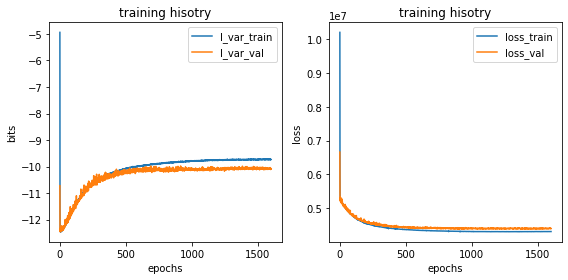

In [27]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values


I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, axs = plt.subplots(1,2,figsize=[8,4])

ax = axs[0]
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
#ax.set_xscale('log')
ax.set_title('training hisotry')

ax = axs[1]
ax.plot(model.history['loss'], label='loss_train')
ax.plot(model.history['val_loss'], label='loss_val')
# ax.set_xlim(100,300)
# ax.set_ylim(0.7*1e6,0.8*1e6)
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_title('training hisotry')
fig.tight_layout()

In [28]:
model.history['loss'][-1]/1e6

4.312122

In [29]:
phi = gpmap.x_to_phi(x_test)
theta = np.squeeze(gpmap.weights[1].numpy())


In [30]:
theta

array([[-0.18373556, -0.9829738 , -0.30100244, ..., -1.1457376 ,
        -1.5652492 , -0.88021713],
       [-0.5087956 , -1.0203733 , -0.71212804, ...,  0.18506305,
        -0.61429304, -0.54124254],
       [-0.47801173, -1.5099747 , -0.45547065, ..., -0.8223622 ,
        -1.6691691 , -0.7501193 ],
       ...,
       [ 0.9814333 , -0.71020937, -0.3366075 , ..., -0.08423173,
         1.1977233 , -0.651833  ],
       [-0.8817713 , -0.35553607,  0.3896115 , ..., -0.55654687,
        -0.57197964, -0.4886733 ],
       [ 0.5983372 ,  0.80854887, -0.22951373, ...,  0.3345992 ,
         0.17235366,  0.51304597]], dtype=float32)

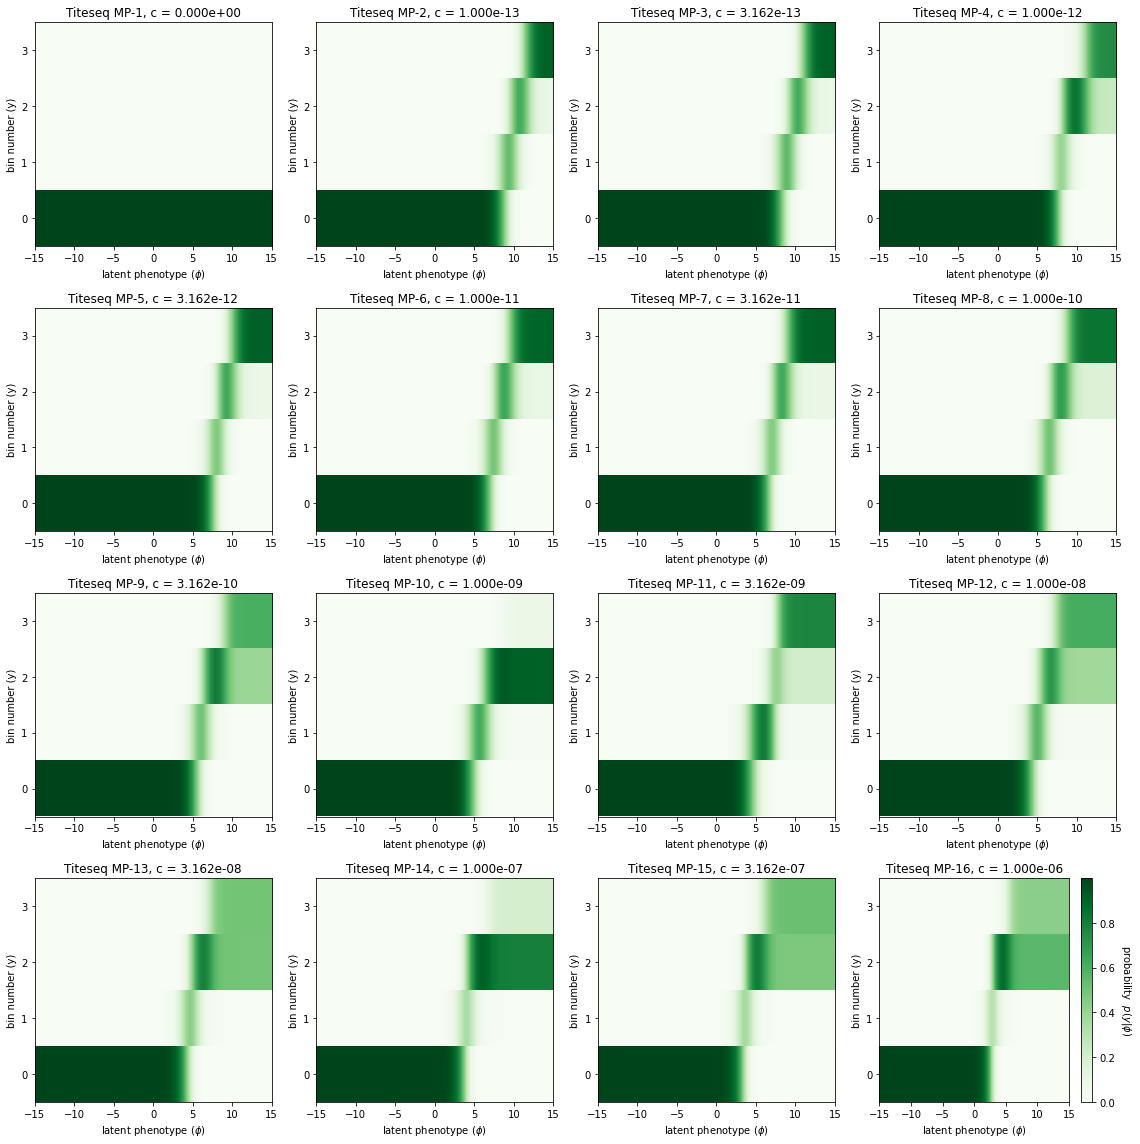

In [31]:
# Get G-P map parameters in matrix form


# Create grid in phi space
phi_lim = [-15, 15]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = mp_list[0].Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values



# Create figure with two panels
fig, axs = plt.subplots(4,4,figsize=[16,16])

mp_counter = 0
for i in range(4):
    for j in range(4):
        
        measurement_process = mp_list[mp_counter].p_of_y_given_phi(y_all, phi_grid)
        # Right panel: draw measurement process as heatmap
        ax = axs[i,j]

        im = ax.imshow(measurement_process,
                       cmap='Greens',
                       extent=phi_lim+y_lim,
                       vmin=0,
                       origin='lower',
                       interpolation='nearest',
                       aspect="auto")
        ax.set_yticks(y_all)
        ax.set_ylabel('bin number (y)')
        ax.set_xlabel('latent phenotype ($\phi$)')
        ax.set_title(f'Titeseq MP-{mp_counter+1}, c = {cs[mp_counter]:.3e}')
        mp_counter+=1
        
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")
fig.tight_layout()

fig.savefig(f'ace2rbd_Titeseq_measurment_prcoess_mu_pos_{(mu_pos):.3f}.png',dpi=300,bbox_inches='tight')


In [32]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')

bloom_bind_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    #temp_df['bind_lib1']
    #expr_lib1
    bloom_bind_df.loc[site-1] = temp_df['bind_avg'].values[0:20]

bloom_bind_df.head()


,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-0.03,-0.09,0.03,0.00,-0.10,-0.04,-0.02,-0.07,-0.01,-0.05,-0.02,0.00,-0.03,0.01,-0.02,-0.03,0.06,-0.04,-0.16,-0.06
1,0.00,-0.09,-0.02,0.08,-0.22,-0.08,0.04,0.00,-0.05,0.00,0.00,0.00,0.06,-0.02,0.00,-0.04,-0.03,0.00,-0.03,-0.03
2,-0.01,-0.14,-0.01,-0.15,-0.15,-0.07,-0.07,-0.06,-0.01,-0.01,-0.02,-0.06,0.03,0.02,0.00,-0.08,0.00,-0.05,-0.21,-0.07
3,-0.03,-0.11,0.07,0.01,-0.22,-0.03,-0.02,-0.20,-0.03,-0.20,-0.05,0.00,-0.18,0.01,0.00,-0.06,-0.04,-0.07,-0.24,-0.09
4,0.04,-0.11,0.00,0.06,-0.03,-0.08,-0.03,-0.02,-0.03,0.00,0.01,0.03,0.06,-0.02,-0.01,0.01,0.02,-0.08,-0.05,-0.02


In [33]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')
bloom_exp_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    temp_df['expr_lib1']
    bloom_exp_df.loc[site-1] = temp_df['expr_avg'].values[0:20]
    
bloom_exp_df.head()    

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-0.11,-1.26,-0.44,-0.31,-0.70,-0.25,-0.61,-0.85,-0.20,-0.75,-0.75,0.00,-0.21,-0.53,-0.44,-0.33,-0.34,-0.61,-1.12,-1.02
1,0.00,-0.12,0.03,0.01,-0.10,0.14,0.05,0.00,-0.06,-0.03,-0.02,0.05,-0.17,0.07,-0.04,-0.03,-0.04,0.02,-0.33,-0.07
2,-0.37,-0.93,-0.27,-0.31,-0.89,-0.41,-0.29,-1.03,-0.20,-0.55,-0.47,-0.35,-0.28,-0.35,-0.54,-0.04,0.00,-0.56,-0.63,-0.62
3,-0.12,-0.57,-0.04,-0.05,-0.97,-0.21,-0.12,-0.67,-0.02,-0.72,-0.40,0.00,-0.55,-0.08,-0.12,-0.19,-0.02,-0.47,-1.01,-0.61
4,-0.01,-0.38,-0.09,0.11,-0.16,-0.16,-0.10,-0.16,0.02,0.00,-0.15,-0.08,0.09,-0.05,-0.14,-0.08,-0.08,-0.10,-0.13,-0.12


In [34]:
theta_df = pd.DataFrame(theta,columns=alphabet)

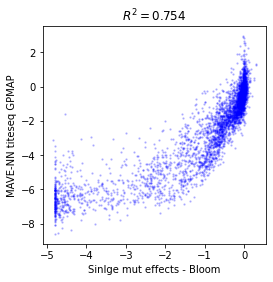

In [35]:
fig, axs = plt.subplots(1,1,figsize=[4,4])

# Left panel: draw logo using logomaker
ax = axs
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.fillna(0).values,theta_df.fillna(0).values,s=2,alpha=0.2,color='blue')
ax.set_xlabel('Sinlge mut effects - Bloom')
ax.set_ylabel('MAVE-NN titeseq GPMAP')
ax.set_title(f'$R^2 = {Rsq:.3f}$')
# ax.set_xticks(np.arange(0,201,5))
# ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
plt.show()

In [36]:
theta_lc = gpmap.get_theta(model,gauge='consensus')['theta_lc']
theta_lc_consensus_df = pd.DataFrame(theta_lc,columns=alphabet)

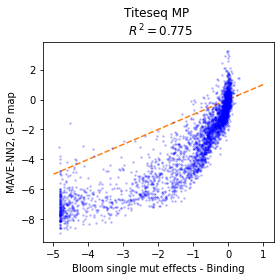

In [37]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(bloom_bind_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
plt.plot(lims,lims,'--',color='C1',zorder=-1)
plt.xlabel('Bloom single mut effects - Binding')
plt.title(f'Titeseq MP \n $R^2 = {Rsq:.3f}$')
plt.ylabel('MAVE-NN2, G-P map')
plt.tight_layout()
plt.savefig('mavenn_bloom_binding_comparison.png',dpi=200,bbox_inches='tight')

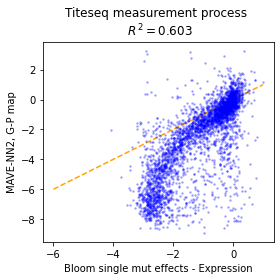

In [38]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(bloom_exp_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(bloom_exp_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.25,color='blue')

lims = [-6,1]
plt.plot(lims,lims,'--',color='orange',zorder=-1)
plt.xlabel('Bloom single mut effects - Expression')
plt.title(f'Titeseq measurement process \n $R^2 = {Rsq:.3f}$')
plt.ylabel('MAVE-NN2, G-P map')
plt.tight_layout()
plt.savefig('mavenn_bloom_expression_comparison.png',dpi=200,bbox_inches='tight')

In [1]:

# Create figure
fig, axs = plt.subplots(2,1, figsize=(15,10))

# Draw heatmap
ax = axs[0]

heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=theta_lc_consensus_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                cmap_size='2%',
                                #clim = [-5,0.5],
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive parameters: mavenn2 G-P map')
heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
#fig.tight_layout(w_pad=5)
#fig.savefig('ace2rbd_g-p_map_mpa_sortseq_only_heatmap.png',dpi=300,bbox_inches='tight')

bloom_exp_df
# Create figure
#fig, ax = plt.subplots(1,1, figsize=(15,5))

# Draw heatmap
ax = axs[1]

heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=bloom_bind_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                #clim = [-5,0.5],
                                cmap_size='2%',
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive effect: Bloom binding')

heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
fig.tight_layout(w_pad=5)
fig.savefig('ace2rbd_g-p_map_titeseq_heatmap_comparisons.png',dpi=300,bbox_inches='tight')

NameError: name 'plt' is not defined

In [40]:
theta_lc_consensus_dm_df = pd.read_csv('discrete_monotonic_ace2rbd_binding.csv')
theta_lc_consensus_da_df = pd.read_csv('discrete_agnostic_ace2rbd_binding.csv')

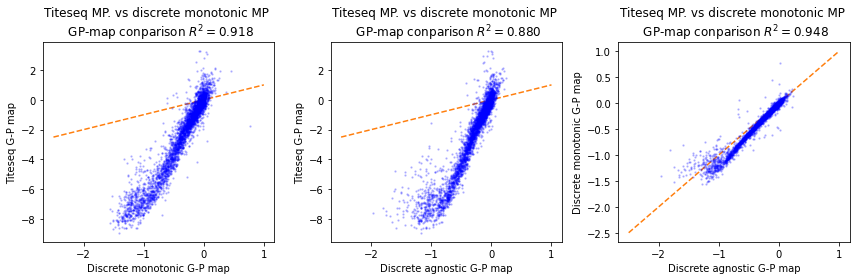

In [41]:
fig, axs = plt.subplots(1,3,figsize=(12,4))

ax = axs[0]
Rsq = np.corrcoef(theta_lc_consensus_dm_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(theta_lc_consensus_dm_df.values, theta_lc_consensus_df.values,s=2,alpha=0.2,color='blue')

lims = [-2.5,1]
ax.plot(lims,lims,'--',color='C1',zorder=-1)
ax.set_xlabel('Discrete monotonic G-P map')
ax.set_title(f'Titeseq MP. vs discrete monotonic MP \n GP-map conparison $R^2 = {Rsq:.3f}$')
ax.set_ylabel('Titeseq G-P map')


ax = axs[1]
Rsq = np.corrcoef(theta_lc_consensus_da_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(theta_lc_consensus_da_df.values, theta_lc_consensus_df.values,s=2,alpha=0.2,color='blue')

lims = [-2.5,1]
ax.plot(lims,lims,'--',color='C1',zorder=-1)
ax.set_xlabel('Discrete agnostic G-P map')
ax.set_title(f'Titeseq MP. vs discrete monotonic MP \n GP-map conparison $R^2 = {Rsq:.3f}$')
ax.set_ylabel('Titeseq G-P map')
fig.tight_layout()


ax = axs[2]
Rsq = np.corrcoef(theta_lc_consensus_da_df.fillna(0).values.ravel(), theta_lc_consensus_dm_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(theta_lc_consensus_da_df.values, theta_lc_consensus_dm_df.values,s=2,alpha=0.2,color='blue')

lims = [-2.5,1]
ax.plot(lims,lims,'--',color='C1',zorder=-1)
ax.set_xlabel('Discrete agnostic G-P map')
ax.set_title(f'Titeseq MP. vs discrete monotonic MP \n GP-map conparison $R^2 = {Rsq:.3f}$')
ax.set_ylabel('Discrete monotonic G-P map')
fig.tight_layout()
plt.savefig('Titeseq_discrete_monotonic_agnostic_binding_comparison.png',dpi=200,bbox_inches='tight')

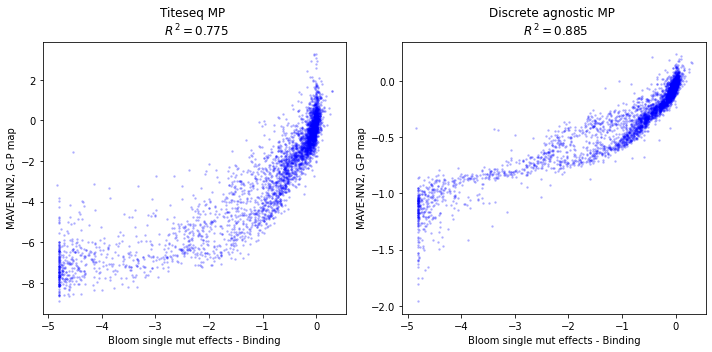

In [42]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

ax = axs[0]
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
ax.set_xlabel('Bloom single mut effects - Binding')
ax.set_title(f'Titeseq MP \n $R^2 = {Rsq:.3f}$')
ax.set_ylabel('MAVE-NN2, G-P map')



ax = axs[1]
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_da_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.values, theta_lc_consensus_da_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
ax.set_xlabel('Bloom single mut effects - Binding')
ax.set_title(f'Discrete agnostic MP \n $R^2 = {Rsq:.3f}$')
ax.set_ylabel('MAVE-NN2, G-P map')


fig.tight_layout()
#plt.savefig('mavenn_bloom_binding_comparison.png',dpi=200,bbox_inches='tight')

Get titration curves

In [43]:
# #phi = gpmap.x_to_phi(x_test)

# #a = mp_list[0].get_weights()[0][0]

# def mu_of_phi(c, 
#               a=a,
#               phi=phi,
#               mu_neg=mu_neg):

#     K_a_of_phi = 10**(phi)
#     B = 10**(mu_neg)
#     A = 10**(a)
    
#     mu_of_phi = np.log10(A*(c*K_a_of_phi)/(1+c*K_a_of_phi)+B)
    
#     return mu_of_phi


In [44]:
# plt.figure(figsize=(5,5))

# #cs_ = np.arange(0.01,30,0.01)
# cs_bloom = np.arange(10**(-13),10**(-3),10**(-6))

# for _ in np.random.choice(np.arange(0,len(phi)),size=10):
#     plt.plot(cs_bloom,mu_of_phi(c=10**(cs_bloom),phi=phi[_]),'o-')
#     #plt.plot(cs_bloom,mu_of_phi(c=cs_bloom,phi=phi[_]),'o-')
    
    
# plt.xlabel('log concentration - grid (inferred)',fontsize=12)
# #plt.xscale('log')
# #plt.yscale('log')
# plt.ylabel('$\mu(\phi)$',fontsize=15)
# #plt.ylim(0,4)

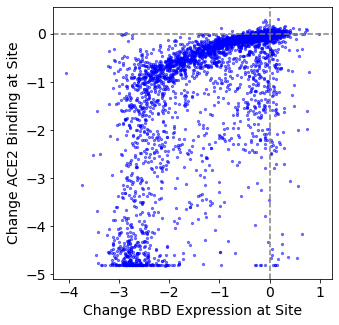

In [45]:
plt.figure(figsize=(5,5))
plt.scatter(bloom_exp_df.values.ravel(),bloom_bind_df.values.ravel(), color='blue',s=5,alpha=0.5)
plt.xlabel('Change RBD Expression at Site',fontsize=14)
plt.ylabel('Change ACE2 Binding at Site',fontsize=14)
plt.axvline(0,ls='--',color='gray')
plt.axhline(0,ls='--',color='gray')
plt.tick_params(labelsize=14)
plt.savefig('Bloom_binding_vs_expression.png',dpi=200,bbox_inches='tight')

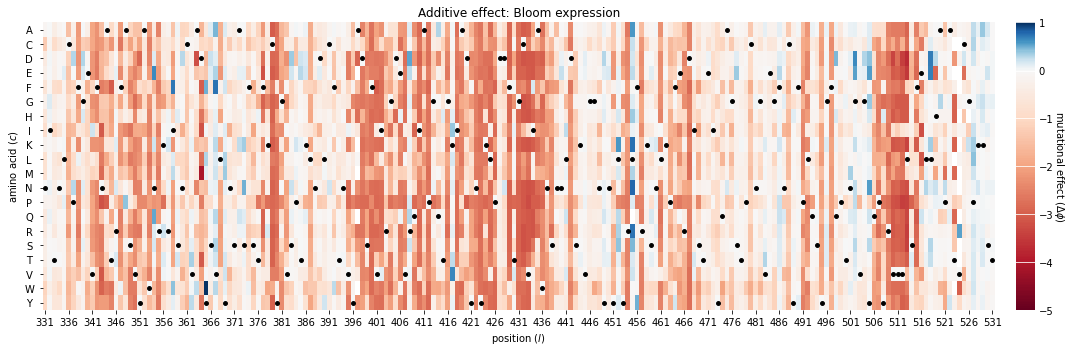

In [46]:

# Create figure
fig, ax = plt.subplots(1,1, figsize=(15,5))


heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=bloom_exp_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                clim = [-5,1],
                                cmap_size='2%',
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive effect: Bloom expression')

heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
fig.tight_layout(w_pad=5)
fig.savefig('ace2rbd_g-p_map_heatmap_bloom_expression.png',dpi=300,bbox_inches='tight')

### Compute $K_d$ values

In [47]:
#phi = gpmap.x_to_phi(x_test)

#a = mp_list[0].get_weights()[0][0]

def mu_of_phi(c, 
              a=a,
              phi=phi,
              mu_neg=mu_neg):

    K_a_of_phi = 10**(phi)
    B = 10**(mu_neg)
    A = 10**(a)
    
    mu_of_phi = np.log10(A*(c*K_a_of_phi)/(1+c*K_a_of_phi)+B)
    
    return mu_of_phi


In [48]:
def _x_to_mat(x, alphabet):
    return (np.array(list(x))[:, np.newaxis] == alphabet[np.newaxis, :]).astype(float)

In [49]:
WT_seq = model.x_stats['consensus_seq']

single_mutants = []

for idx,WT_char in enumerate(WT_seq):
    #print(idx)
    for mutant in model.alphabet:
#         if mutant==WT_seq[idx]:
#             continue
#         else:
        temp_WT_list = list(WT_seq)
        temp_WT_list[idx] = mutant
        single_mutant = ''.join(temp_WT_list)
        single_mutants.append(single_mutant)
            

In [50]:
phi_single_mutants = gpmap.x_to_phi(single_mutants)

In [51]:
mavenn2_Kd = pd.DataFrame(1/(10**phi_single_mutants.reshape(201,20)),columns=model.alphabet)

In [52]:
# fig, axs = plt.subplots(1,2,figsize=(10,5))


# #lims=[10**-12,10**-1]
# #ax.plot(lims,lims,'--',color='orange')

# #Rsq = np.corrcoef(10**bloom_bind_df.values.ravel(),10**(phi_single_mutants))[0,1]**2
# ax = axs[0]
# #ax.set_title(f'$R^2$ = {Rsq:.3f}')
# ax.scatter(10**bloom_bind_df.values.ravel(),
#            10**(phi_single_mutants),
#             color='blue',s=5,alpha=0.25)
# ax.set_xscale('log')
# ax.set_yscale('log')

# ax.set_xlabel('$K_d$ (Starr et al)',fontsize=14)
# ax.set_ylabel('$K_d$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)


# ax = axs[1]
# #ax.set_title(f'$R^2$ = {Rsq:.3f}')
# ax.scatter(10**bloom_exp_df.values.ravel(),
#            10**(phi_single_mutants),
#             color='blue',s=5,alpha=0.25)
# ax.set_xscale('log')
# ax.set_yscale('log')

# ax.set_xlabel('Expression (Starr et al)',fontsize=14)
# ax.set_ylabel('$K_d$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)

# # ax.set_xlim(lims)
# # ax.set_ylim(lims)
# fig.tight_layout()

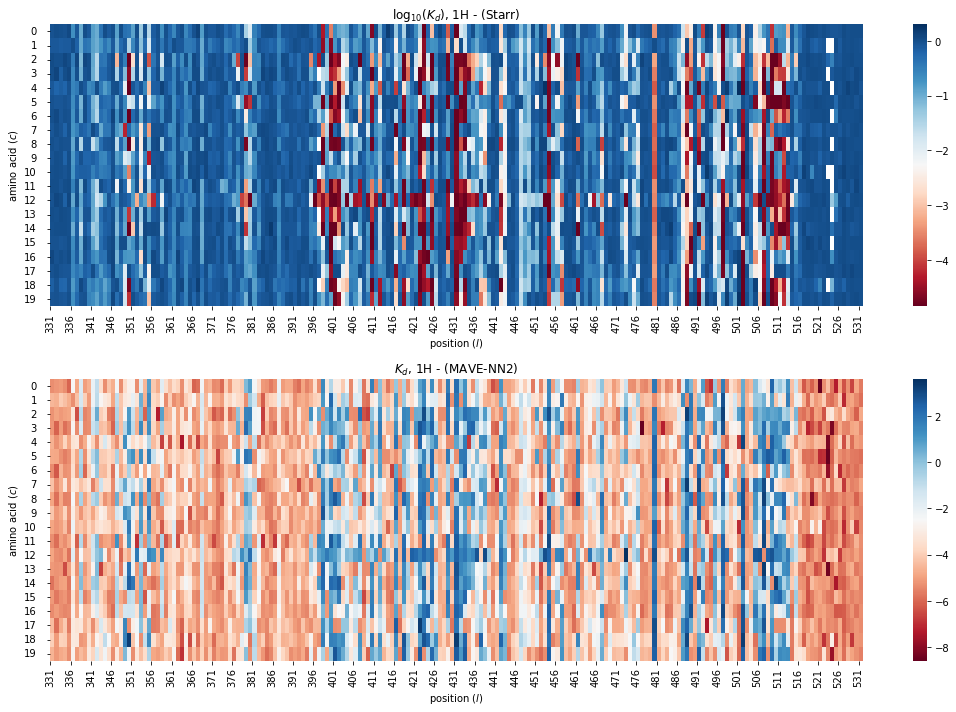

In [53]:
fig, axs = plt.subplots(2,1,figsize=(15,10))
from matplotlib.colors import LogNorm

from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vmin=-10**-9, vcenter=10**-6.5, vmax=10**-5)
#pcolormesh(your_data, cmap="coolwarm", norm=divnorm)

data = (bloom_bind_df.values.ravel())
log_norm = LogNorm(vmin=min(data), vmax=max(data))
ax = axs[0]
sns.heatmap((bloom_bind_df.values.T),
            ax=ax,
            cmap='RdBu',
            #norm=log_norm
            #norm=divnorm
            #norm=norm
           )

ax.set_xticks(np.arange(0,201,5))
ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
ax.tick_params(axis='y', which='major', pad=10)
ax.set_xlabel('position ($l$)')
ax.set_ylabel('amino acid ($c$)')
ax.set_title(f'$\log_{{10}}(K_d)$, 1H - (Starr)')
#ax.set_yticklabels(Adams_ordering,rotation=0)



ax = axs[1]
data = np.log10(mavenn2_Kd.values.ravel())
log_norm = LogNorm(vmin=min(data), vmax=max(data))

sns.heatmap(np.log10(mavenn2_Kd.values.T)+7,
            ax=ax,
            cmap='RdBu',
            #norm=log_norm
            #norm=divnorm
            #norm=norm
           )

ax.set_xticks(np.arange(0,201,5))
ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
ax.tick_params(axis='y', which='major', pad=10)
ax.set_xlabel('position ($l$)')
ax.set_ylabel('amino acid ($c$)')
ax.set_title(f'$K_d$, 1H - (MAVE-NN2)')
#ax.set_yticklabels(Adams_ordering,rotation=0)

fig.tight_layout()
# fig.savefig('pngs/Titeseq_MP/Adams_Kd_vs_Mavenn2_Kd_heatmaps.png',
#             facecolor='white', edgecolor='none',
#             dpi=200,bbox_inches='tight')


Text(0.5, 0, '$(K_d)$, MAVE-NN, ${{\\rm exp}_{10}(\\phi)}^{-1}$')

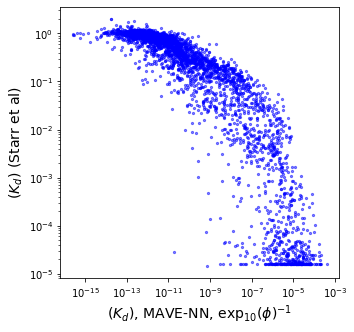

In [54]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(mavenn2_Kd.values.ravel(),10**bloom_bind_df.values.ravel()
            ,s=5,alpha=0.5,color='blue')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylabel('$\log_{10}(K_d)$ (Starr et al)',fontsize=14)
# ax.set_xlabel('$\log_{10}(K_d)$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)

ax.set_ylabel('$(K_d)$ (Starr et al)',fontsize=14)
ax.set_xlabel('$(K_d)$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)

In [55]:
# fig, ax = plt.subplots(figsize=(5,5))


# # lims=[10**-12,10**-1]
# # ax.plot(lims,lims,'--',color='orange',lw=2)

# Rsq = np.corrcoef(1/(10**((phi_single_mutants))),
#             10**(bloom_bind_df.values.ravel()))[0,1]**2

# #ax.set_title(f'$R^2$ = {Rsq:.3f}')
# ax.scatter(np.log10(1/10**((phi_single_mutants))),
#            (bloom_bind_df.values.ravel()),
#             color='blue',s=5,alpha=0.25)
# #ax.set_xscale('log')
# #ax.set_yscale('log')

# ax.set_ylabel('$K_d$ (Starr et al)',fontsize=14)
# ax.set_xlabel('$K_d$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)
# # ax.set_xlim(lims)
# # ax.set_ylim(lims)
# fig.tight_layout()
# # fig.savefig('pngs/__/__.png',
# #             facecolor='white', edgecolor='none',
# #             dpi=200,bbox_inches='tight')


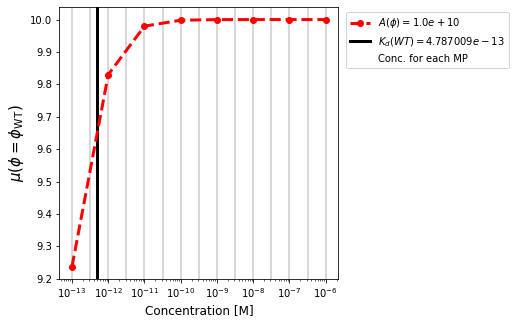

In [60]:
fig, ax = plt.subplots(figsize=(5,5))

phi_WT = gpmap.x_to_phi(WT_seq)
cs_ = np.arange(10**-13,10**-7,10**(-11))
cs_course = np.arange(10**-12,10**-1,10**(-7))
cs_fig_1  = np.array([10**(-13),10**(-12),10**(-11),10**(-10),10**(-9),10**(-8),10**(-7),10**(-6)])

#for a in as_list:
#ax.plot(cs_course,(mu_of_phi(c=cs_course,a=a,phi=phi_WT)),lw=3,zorder=10,label=f'$A(\phi) = {(10**a):.1e}$')    
ax.plot(cs_fig_1,(mu_of_phi(c=cs_fig_1,a=a,phi=phi_WT)),'ro--',lw=3,zorder=10,label=f'$A(\phi) = {(10**a):.1e}$')    

ax.set_xlabel('Concentration [M]',fontsize=12)
ax.set_ylabel('$\mu(\phi = \phi_{\\rm WT})$',fontsize=15)

Kd_WT = 1/(10**phi_WT)
ax.axvline(Kd_WT,color='black',lw=3,label=f'$K_d (WT) = {(Kd_WT):2e}$')
for c in cs:    
    ax.axvline(c,c='gray',zorder=-10,alpha=0.4)
    
ax.axvline(c,c='gray',label=f'Conc. for each MP',zorder=-10,alpha=0.0)    

leg = ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
for lh in leg.legendHandles: 
    lh.set_alpha(1)


ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_xlim(10**-14,)    
#ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

fig.savefig(f'pngs/mu_phi_WT_vs_conc_{mu_pos}_{mu_neg}_{sigma_pos}.png',dpi=300,bbox_inches='tight')


In [61]:
Kd_WT

4.787008530003624e-13

In [58]:
sigma_pos

2

In [99]:
cs

[0,
 1e-13,
 3.162277660168379e-13,
 1e-12,
 3.1622776601683794e-12,
 1e-11,
 3.1622776601683794e-11,
 1e-10,
 3.1622776601683795e-10,
 1e-09,
 3.1622776601683795e-09,
 1e-08,
 3.162277660168379e-08,
 1e-07,
 3.162277660168379e-07,
 1e-06]

In [112]:
mean_bin_list = []
for idx,conc_index in enumerate(np.arange(1,16+1,1)):
    
    #print(f"{conc_index:02d}")
    conc_string = f"{conc_index:02d}"
    df_conc = y[[f'TiteSeq_{conc_string}_bin1',
                 f'TiteSeq_{conc_string}_bin2',
                 f'TiteSeq_{conc_string}_bin3',
                 f'TiteSeq_{conc_string}_bin4']]
    
    n = df_conc.sum(axis=0)
    
    mean_bin = sum([i*n_i for i,n_i in enumerate(n,start=1)])/sum([n_i for n_i in n])
    
    #print(cs[idx],conc_string,mean_bin)
    mean_bin_list.append(mean_bin)

In [161]:
Bloom_Kds = 10**bloom_bind_df.values.ravel()

In [163]:
Bloom_Kds.shape

(4020,)

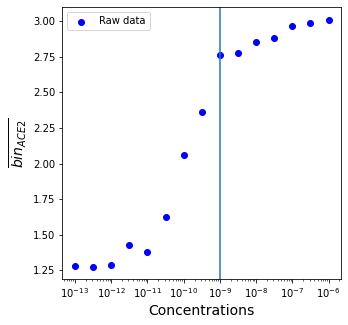

In [160]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(np.array(cs)[::-1],mean_bin_list,c='blue',label='Raw data')
ax.axvline(10**-9)
ax.set_xlabel('Concentrations',fontsize=14)
ax.set_ylabel('$\overline{bin_{ACE2}}$',fontsize=14)
ax.legend()
ax.set_xscale('log')

array([1.00000000e-06, 3.16227766e-07, 1.00000000e-07, 3.16227766e-08,
       1.00000000e-08, 3.16227766e-09, 1.00000000e-09, 3.16227766e-10,
       1.00000000e-10, 3.16227766e-11, 1.00000000e-11, 3.16227766e-12,
       1.00000000e-12, 3.16227766e-13, 1.00000000e-13, 0.00000000e+00])